In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/LAP/Subjects/AP1/labs

/content/drive/MyDrive/LAP/Subjects/AP1/labs


# PREPROCESSING

Functions to load and cleanup the data for training with Flair.



In [3]:
import csv
import re
import sys
import pandas as pd

# load data
def load_data(fnames):
    data = []
    for fname in fnames:
        data.append(pd.read_csv(fname, sep='\t', encoding='utf-8'))
    data = pd.concat(data)
    targets = set(data['Target'])
    return data, list(targets)

# pre-process tweets
def cleanup(tweet):
    """we remove urls, hashtags and user symbols"""
    tweet = re.sub(r"http\S+", "", tweet.replace("#", "").replace("@", "").replace('\n', ' ').replace('\t', ' '))
    return tweet

def format_label_to_flair(label):
    return "__label__" + label

# Loading and Pre-processing the datasets


We load and cleanup the data using the functions defined above.



## ASSIGNMENT 1

+ TODO: Write the format_label_to_flair(label) function above to obtain the label column in the format shown below.
+ TODO: Write the required code to load, cleanup and format the labels for both the training and test sets obtaining the output shown below.

In [4]:
# data path. trial data used as training too.
folder = "stance-semeval2016"
trial_file = f"../datasets/{folder}/semeval2016-task6-trialdata.utf-8.txt"
train_file = f"../datasets/{folder}/semeval2016-task6-trainingdata.utf-8.txt"
test_file = f"../datasets/{folder}/SemEval2016-Task6-subtaskA-testdata-gold.txt"

# TODO write your code here
def preprocess_data(fnames):
    data, targets = load_data(fnames)
    data["Clean_tweet"] = data["Tweet"].apply(cleanup)
    data["Stance"] = data["Stance"].apply(format_label_to_flair)
    return data, targets

training_data, targets = preprocess_data([trial_file, train_file])
testing_data, targets = preprocess_data([test_file])

display(training_data)

,ID,Target,Tweet,Stance,Clean_tweet
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",__label__AGAINST,"tedcruz And, HandOverTheServer she wiped clean..."
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,__label__FAVOR,Hillary is our best choice if we truly want to...
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,__label__AGAINST,TheView I think our country is ready for a fem...
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,__label__AGAINST,I just gave an unhealthy amount of my hard-ear...
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,__label__NONE,PortiaABoulger Thank you for adding me to your...
...,...,...,...,...,...
2809,2910,Legalization of Abortion,"There's a law protecting unborn eagles, but no...",__label__AGAINST,"There's a law protecting unborn eagles, but no..."
2810,2911,Legalization of Abortion,I am 1 in 3... I have had an abortion #Abortio...,__label__AGAINST,I am 1 in 3... I have had an abortion Abortion...
2811,2912,Legalization of Abortion,How dare you say my sexual preference is a cho...,__label__AGAINST,How dare you say my sexual preference is a cho...
2812,2913,Legalization of Abortion,"Equal rights for those 'born that way', no rig...",__label__AGAINST,"Equal rights for those 'born that way', no rig..."


## ASSIGNMENT 2

From the training_data and testing_data dataframes obtained in the previous step, perform the following steps:

+ TODO: Iterate over the targets to write a training and test set in the format required by Flair to train a text classifier:

```
__label__AGAINST first_tweet_in_dataframe
__label__NONE second_tweet_in_dataframe
__label__FAVOR third_tweet_in_dataframe
```
*NOTE: One tweet per line*

The result should be a training set and test set in files for each target. For example:



```
train.Feminist Movement.txt
test.Feminist Movement.txt
```

HINT: You just need to use the Stance and Clean_tweet columns from the training_data and test_data dataframes and write them to a csv with "\t" as separator.

https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_6_CORPUS.md#reading-a-text-classification-dataset


In [5]:
# TODO Write your code here
def save_targets(data, targets, pre):
    for target in targets:
        data_target = data[data["Target"]==target]
        fname = f"../resources/{folder}/{pre}.{target}.txt"
        data_target.to_csv(fname, sep='\t', columns=["Stance", "Clean_tweet"], index=False)

save_targets(training_data, targets, pre='train')
save_targets(testing_data, targets, pre='test')

# INSTALL FLAIR

In [6]:
!pip install flair==0.8

     |████████████████████████████████| 277 kB 5.3 MB/s 
     |████████████████████████████████| 3.5 MB 21.4 MB/s 
     |████████████████████████████████| 788 kB 48.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 981 kB 48.0 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 14.8 MB 35.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 6.8 MB 45.8 MB/s 
     |████████████████████████████████| 895 kB 51.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=0a0fae8c0075adce106defa91ec3bef66897f905539

# Load the training data created in ASSIGNMENT 2

In [7]:
from flair.data import Corpus                                                                                                                                                           
from flair.datasets import ClassificationCorpus
from flair.embeddings import WordEmbeddings, FlairEmbeddings, FastTextEmbeddings, DocumentRNNEmbeddings                                                             
from flair.models import TextClassifier                                                                                                                                                 
from flair.trainers import ModelTrainer

# 1. get the corpus
target = "Feminist Movement"
corpus_folder = f"../resources/{folder}/"
corpus: Corpus = ClassificationCorpus(corpus_folder,
                                      train_file=f'train.{target}.txt',
                                      #dev_file=f'train.{target}.txt',
                                      test_file=f'test.{target}.txt'
)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

2022-02-16 19:07:16,316 Reading data from ../resources/stance-semeval2016
2022-02-16 19:07:16,318 Train: ../resources/stance-semeval2016/train.Feminist Movement.txt
2022-02-16 19:07:16,331 Dev: None
2022-02-16 19:07:16,337 Test: ../resources/stance-semeval2016/test.Feminist Movement.txt
2022-02-16 19:07:16,389 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 883/883 [00:01<00:00, 503.83it/s]

2022-02-16 19:07:18,600 [b'FAVOR', b'AGAINST', b'NONE']


# INSTALL Word Embeddings and instantiate the TextClassifier

In [8]:
# 3. make a list of word embeddings
word_embeddings = [
                   WordEmbeddings('en-crawl'),
                   #FlairEmbeddings('news-forward'),
                   #FlairEmbeddings('news-backward'),
]

# 4. initialize document embedding by passing list of word embeddings                                                                                                                   
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)                                                                                                  
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   hidden_size=512,
                                                                   reproject_words=True,
                                                                   reproject_words_dimension=256,
                                                                   rnn_type='LSTM',
)
                                                                                                                                                                                         
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)
# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

2022-02-16 19:07:19,238 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp5frvevn9


100%|██████████| 1200000128/1200000128 [01:05<00:00, 18376460.44B/s]

2022-02-16 19:08:24,960 copying /tmp/tmp5frvevn9 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2022-02-16 19:08:29,297 removing temp file /tmp/tmp5frvevn9
2022-02-16 19:08:30,046 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmp9a54p6me


100%|██████████| 39323680/39323680 [00:02<00:00, 13236596.28B/s]

2022-02-16 19:08:33,402 copying /tmp/tmp9a54p6me to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2022-02-16 19:08:33,505 removing temp file /tmp/tmp9a54p6me


# Run the trainer for feminism target

In [9]:
# 7. start the training
trainer.train(f"../resources/{folder}/flair_{target}",
              train_with_dev=False,
              max_epochs=50)

2022-02-16 19:08:48,602 ----------------------------------------------------------------------------------------------------
2022-02-16 19:08:48,611 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-16 19:08:48,614 ----------------------------------------------------------------------------------------------------
2022-02-16 19:08:48,618 Corpus: "Corpus: 598 train + 66 dev + 285 test sentences"
2022-02-16 19:08:48,622 ----------------------------------------------------------------------------------------------------
2022-02-16 19:08

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:08:49,775 epoch 1 - iter 1/19 - loss 1.11264050 - samples/sec: 77.75 - lr: 0.100000
2022-02-16 19:08:49,873 epoch 1 - iter 2/19 - loss 1.09319001 - samples/sec: 346.44 - lr: 0.100000
2022-02-16 19:08:49,989 epoch 1 - iter 3/19 - loss 1.09458951 - samples/sec: 300.27 - lr: 0.100000
2022-02-16 19:08:50,107 epoch 1 - iter 4/19 - loss 1.09637159 - samples/sec: 281.02 - lr: 0.100000
2022-02-16 19:08:50,210 epoch 1 - iter 5/19 - loss 1.09796343 - samples/sec: 374.09 - lr: 0.100000
2022-02-16 19:08:50,334 epoch 1 - iter 6/19 - loss 1.09091008 - samples/sec: 264.35 - lr: 0.100000
2022-02-16 19:08:50,436 epoch 1 - iter 7/19 - loss 1.07861509 - samples/sec: 363.44 - lr: 0.100000
2022-02-16 19:08:50,532 epoch 1 - iter 8/19 - loss 1.07153738 - samples/sec: 345.40 - lr: 0.100000
2022-02-16 19:08:50,665 epoch 1 - iter 9/19 - loss 1.08065359 - samples/sec: 343.02 - lr: 0.100000
2022-02-16 19:08:50,764 epoch 1 - iter 10/19 - loss 1.08951925 - samples/sec: 340.51 - lr: 0.100000
2022-02-16

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:09:09,602 epoch 2 - iter 1/19 - loss 1.03745973 - samples/sec: 197.02 - lr: 0.100000
2022-02-16 19:09:09,719 epoch 2 - iter 2/19 - loss 1.20534033 - samples/sec: 289.90 - lr: 0.100000
2022-02-16 19:09:09,847 epoch 2 - iter 3/19 - loss 1.14768593 - samples/sec: 278.41 - lr: 0.100000
2022-02-16 19:09:10,854 epoch 2 - iter 4/19 - loss 1.12323478 - samples/sec: 440.35 - lr: 0.100000
2022-02-16 19:09:10,927 epoch 2 - iter 5/19 - loss 1.10132554 - samples/sec: 469.49 - lr: 0.100000
2022-02-16 19:09:11,012 epoch 2 - iter 6/19 - loss 1.08623743 - samples/sec: 413.88 - lr: 0.100000
2022-02-16 19:09:11,115 epoch 2 - iter 7/19 - loss 1.06407122 - samples/sec: 475.01 - lr: 0.100000
2022-02-16 19:09:11,179 epoch 2 - iter 8/19 - loss 1.05649654 - samples/sec: 547.56 - lr: 0.100000
2022-02-16 19:09:11,242 epoch 2 - iter 9/19 - loss 1.06662196 - samples/sec: 527.43 - lr: 0.100000
2022-02-16 19:09:11,319 epoch 2 - iter 10/19 - loss 1.06202506 - samples/sec: 428.81 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:09:14,522 epoch 3 - iter 1/19 - loss 1.03396440 - samples/sec: 179.65 - lr: 0.100000
2022-02-16 19:09:14,609 epoch 3 - iter 2/19 - loss 0.99638322 - samples/sec: 430.49 - lr: 0.100000
2022-02-16 19:09:14,723 epoch 3 - iter 3/19 - loss 0.99443352 - samples/sec: 311.30 - lr: 0.100000
2022-02-16 19:09:15,005 epoch 3 - iter 4/19 - loss 0.99020629 - samples/sec: 160.11 - lr: 0.100000
2022-02-16 19:09:15,236 epoch 3 - iter 5/19 - loss 0.98743252 - samples/sec: 144.88 - lr: 0.100000
2022-02-16 19:09:15,422 epoch 3 - iter 6/19 - loss 0.99995765 - samples/sec: 180.73 - lr: 0.100000
2022-02-16 19:09:15,565 epoch 3 - iter 7/19 - loss 1.01091762 - samples/sec: 275.56 - lr: 0.100000
2022-02-16 19:09:15,692 epoch 3 - iter 8/19 - loss 1.00430142 - samples/sec: 267.49 - lr: 0.100000
2022-02-16 19:09:15,832 epoch 3 - iter 9/19 - loss 1.01346050 - samples/sec: 241.15 - lr: 0.100000
2022-02-16 19:09:15,957 epoch 3 - iter 10/19 - loss 1.01716706 - samples/sec: 337.06 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:09:21,709 epoch 4 - iter 1/19 - loss 1.01758766 - samples/sec: 119.42 - lr: 0.100000
2022-02-16 19:09:21,917 epoch 4 - iter 2/19 - loss 0.99555206 - samples/sec: 165.93 - lr: 0.100000
2022-02-16 19:09:22,102 epoch 4 - iter 3/19 - loss 0.98813272 - samples/sec: 227.98 - lr: 0.100000
2022-02-16 19:09:22,278 epoch 4 - iter 4/19 - loss 0.98288642 - samples/sec: 183.93 - lr: 0.100000
2022-02-16 19:09:22,483 epoch 4 - iter 5/19 - loss 0.98374065 - samples/sec: 180.02 - lr: 0.100000
2022-02-16 19:09:22,638 epoch 4 - iter 6/19 - loss 0.98616657 - samples/sec: 214.83 - lr: 0.100000
2022-02-16 19:09:22,927 epoch 4 - iter 7/19 - loss 0.98711644 - samples/sec: 228.76 - lr: 0.100000
2022-02-16 19:09:23,052 epoch 4 - iter 8/19 - loss 1.00463127 - samples/sec: 276.12 - lr: 0.100000
2022-02-16 19:09:23,195 epoch 4 - iter 9/19 - loss 1.00415801 - samples/sec: 231.47 - lr: 0.100000
2022-02-16 19:09:23,321 epoch 4 - iter 10/19 - loss 1.00031556 - samples/sec: 279.88 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:09:28,268 epoch 5 - iter 1/19 - loss 1.01046336 - samples/sec: 115.98 - lr: 0.100000
2022-02-16 19:09:28,493 epoch 5 - iter 2/19 - loss 1.01066989 - samples/sec: 152.63 - lr: 0.100000
2022-02-16 19:09:28,732 epoch 5 - iter 3/19 - loss 0.96881640 - samples/sec: 144.57 - lr: 0.100000
2022-02-16 19:09:28,965 epoch 5 - iter 4/19 - loss 0.96953586 - samples/sec: 158.92 - lr: 0.100000
2022-02-16 19:09:29,259 epoch 5 - iter 5/19 - loss 0.98247271 - samples/sec: 117.87 - lr: 0.100000
2022-02-16 19:09:29,473 epoch 5 - iter 6/19 - loss 0.98752822 - samples/sec: 173.84 - lr: 0.100000
2022-02-16 19:09:29,676 epoch 5 - iter 7/19 - loss 0.98901489 - samples/sec: 194.39 - lr: 0.100000
2022-02-16 19:09:29,814 epoch 5 - iter 8/19 - loss 0.98006742 - samples/sec: 259.73 - lr: 0.100000
2022-02-16 19:09:29,952 epoch 5 - iter 9/19 - loss 0.98911743 - samples/sec: 314.15 - lr: 0.100000
2022-02-16 19:09:30,068 epoch 5 - iter 10/19 - loss 0.98780048 - samples/sec: 295.72 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:09:48,955 epoch 6 - iter 1/19 - loss 1.07454729 - samples/sec: 227.20 - lr: 0.100000
2022-02-16 19:09:49,063 epoch 6 - iter 2/19 - loss 1.04723060 - samples/sec: 334.26 - lr: 0.100000
2022-02-16 19:09:49,172 epoch 6 - iter 3/19 - loss 1.04402351 - samples/sec: 338.06 - lr: 0.100000
2022-02-16 19:09:49,274 epoch 6 - iter 4/19 - loss 1.06917229 - samples/sec: 328.49 - lr: 0.100000
2022-02-16 19:09:49,376 epoch 6 - iter 5/19 - loss 1.06397030 - samples/sec: 335.90 - lr: 0.100000
2022-02-16 19:09:49,505 epoch 6 - iter 6/19 - loss 1.04493775 - samples/sec: 308.81 - lr: 0.100000
2022-02-16 19:09:49,616 epoch 6 - iter 7/19 - loss 1.03320561 - samples/sec: 292.79 - lr: 0.100000
2022-02-16 19:09:49,709 epoch 6 - iter 8/19 - loss 1.03313005 - samples/sec: 544.60 - lr: 0.100000
2022-02-16 19:09:49,805 epoch 6 - iter 9/19 - loss 1.02521064 - samples/sec: 343.34 - lr: 0.100000
2022-02-16 19:09:49,888 epoch 6 - iter 10/19 - loss 1.01725134 - samples/sec: 399.50 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:10:08,972 epoch 7 - iter 1/19 - loss 0.99051869 - samples/sec: 151.12 - lr: 0.100000
2022-02-16 19:10:09,083 epoch 7 - iter 2/19 - loss 0.96955398 - samples/sec: 335.88 - lr: 0.100000
2022-02-16 19:10:09,190 epoch 7 - iter 3/19 - loss 0.96486646 - samples/sec: 349.08 - lr: 0.100000
2022-02-16 19:10:09,302 epoch 7 - iter 4/19 - loss 0.96458818 - samples/sec: 310.37 - lr: 0.100000
2022-02-16 19:10:09,400 epoch 7 - iter 5/19 - loss 0.95933369 - samples/sec: 393.24 - lr: 0.100000
2022-02-16 19:10:09,519 epoch 7 - iter 6/19 - loss 0.96192254 - samples/sec: 293.69 - lr: 0.100000
2022-02-16 19:10:09,608 epoch 7 - iter 7/19 - loss 0.97784888 - samples/sec: 371.93 - lr: 0.100000
2022-02-16 19:10:09,731 epoch 7 - iter 8/19 - loss 0.97353803 - samples/sec: 345.64 - lr: 0.100000
2022-02-16 19:10:09,833 epoch 7 - iter 9/19 - loss 0.97601643 - samples/sec: 376.52 - lr: 0.100000
2022-02-16 19:10:09,931 epoch 7 - iter 10/19 - loss 0.97728331 - samples/sec: 337.83 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:10:13,545 epoch 8 - iter 1/19 - loss 1.01914907 - samples/sec: 130.69 - lr: 0.100000
2022-02-16 19:10:13,665 epoch 8 - iter 2/19 - loss 1.02822775 - samples/sec: 303.49 - lr: 0.100000
2022-02-16 19:10:13,759 epoch 8 - iter 3/19 - loss 1.02476613 - samples/sec: 405.85 - lr: 0.100000
2022-02-16 19:10:13,879 epoch 8 - iter 4/19 - loss 1.00970834 - samples/sec: 324.85 - lr: 0.100000
2022-02-16 19:10:13,984 epoch 8 - iter 5/19 - loss 0.99443305 - samples/sec: 311.18 - lr: 0.100000
2022-02-16 19:10:14,104 epoch 8 - iter 6/19 - loss 0.99636394 - samples/sec: 438.94 - lr: 0.100000
2022-02-16 19:10:14,207 epoch 8 - iter 7/19 - loss 0.99620792 - samples/sec: 326.31 - lr: 0.100000
2022-02-16 19:10:14,292 epoch 8 - iter 8/19 - loss 0.99830990 - samples/sec: 392.20 - lr: 0.100000
2022-02-16 19:10:14,391 epoch 8 - iter 9/19 - loss 0.99674157 - samples/sec: 345.47 - lr: 0.100000
2022-02-16 19:10:14,488 epoch 8 - iter 10/19 - loss 0.98521292 - samples/sec: 347.90 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:10:20,637 epoch 9 - iter 1/19 - loss 0.99546641 - samples/sec: 86.23 - lr: 0.100000
2022-02-16 19:10:25,235 epoch 9 - iter 2/19 - loss 1.02869007 - samples/sec: 208.62 - lr: 0.100000
2022-02-16 19:10:25,462 epoch 9 - iter 3/19 - loss 1.04102645 - samples/sec: 152.82 - lr: 0.100000
2022-02-16 19:10:25,784 epoch 9 - iter 4/19 - loss 1.02927917 - samples/sec: 105.99 - lr: 0.100000
2022-02-16 19:10:26,354 epoch 9 - iter 5/19 - loss 1.02146013 - samples/sec: 59.34 - lr: 0.100000
2022-02-16 19:10:31,091 epoch 9 - iter 6/19 - loss 1.02720936 - samples/sec: 260.27 - lr: 0.100000
2022-02-16 19:10:31,207 epoch 9 - iter 7/19 - loss 1.01259191 - samples/sec: 335.38 - lr: 0.100000
2022-02-16 19:10:31,305 epoch 9 - iter 8/19 - loss 1.00802738 - samples/sec: 395.53 - lr: 0.100000
2022-02-16 19:10:31,398 epoch 9 - iter 9/19 - loss 0.99237299 - samples/sec: 396.64 - lr: 0.100000
2022-02-16 19:10:31,495 epoch 9 - iter 10/19 - loss 0.98570346 - samples/sec: 357.76 - lr: 0.100000
2022-02-16 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:10:50,977 epoch 10 - iter 1/19 - loss 0.93296933 - samples/sec: 167.45 - lr: 0.100000
2022-02-16 19:10:51,070 epoch 10 - iter 2/19 - loss 0.87374014 - samples/sec: 417.07 - lr: 0.100000
2022-02-16 19:10:51,149 epoch 10 - iter 3/19 - loss 0.94176575 - samples/sec: 451.19 - lr: 0.100000
2022-02-16 19:10:51,263 epoch 10 - iter 4/19 - loss 0.94671258 - samples/sec: 341.75 - lr: 0.100000
2022-02-16 19:10:51,337 epoch 10 - iter 5/19 - loss 0.97687991 - samples/sec: 478.14 - lr: 0.100000
2022-02-16 19:10:51,425 epoch 10 - iter 6/19 - loss 0.96457736 - samples/sec: 403.87 - lr: 0.100000
2022-02-16 19:10:51,498 epoch 10 - iter 7/19 - loss 0.97452944 - samples/sec: 458.29 - lr: 0.100000
2022-02-16 19:10:51,592 epoch 10 - iter 8/19 - loss 0.97686528 - samples/sec: 563.88 - lr: 0.100000
2022-02-16 19:10:51,660 epoch 10 - iter 9/19 - loss 0.97822726 - samples/sec: 487.22 - lr: 0.100000
2022-02-16 19:10:51,748 epoch 10 - iter 10/19 - loss 0.97368624 - samples/sec: 479.93 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:10,125 epoch 11 - iter 1/19 - loss 0.89202106 - samples/sec: 145.05 - lr: 0.100000
2022-02-16 19:11:10,214 epoch 11 - iter 2/19 - loss 0.92263100 - samples/sec: 431.01 - lr: 0.100000
2022-02-16 19:11:10,299 epoch 11 - iter 3/19 - loss 0.96687927 - samples/sec: 438.85 - lr: 0.100000
2022-02-16 19:11:10,396 epoch 11 - iter 4/19 - loss 0.96258129 - samples/sec: 422.84 - lr: 0.100000
2022-02-16 19:11:10,465 epoch 11 - iter 5/19 - loss 0.98250912 - samples/sec: 498.90 - lr: 0.100000
2022-02-16 19:11:10,547 epoch 11 - iter 6/19 - loss 0.97248899 - samples/sec: 501.70 - lr: 0.100000
2022-02-16 19:11:10,630 epoch 11 - iter 7/19 - loss 0.96204860 - samples/sec: 409.09 - lr: 0.100000
2022-02-16 19:11:10,701 epoch 11 - iter 8/19 - loss 0.95584661 - samples/sec: 541.95 - lr: 0.100000
2022-02-16 19:11:10,776 epoch 11 - iter 9/19 - loss 0.95946984 - samples/sec: 498.15 - lr: 0.100000
2022-02-16 19:11:10,855 epoch 11 - iter 10/19 - loss 0.95787508 - samples/sec: 495.19 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:14,411 epoch 12 - iter 1/19 - loss 0.96598184 - samples/sec: 173.36 - lr: 0.100000
2022-02-16 19:11:14,489 epoch 12 - iter 2/19 - loss 0.99658680 - samples/sec: 485.18 - lr: 0.100000
2022-02-16 19:11:14,585 epoch 12 - iter 3/19 - loss 0.98926836 - samples/sec: 427.64 - lr: 0.100000
2022-02-16 19:11:14,706 epoch 12 - iter 4/19 - loss 0.95509011 - samples/sec: 340.54 - lr: 0.100000
2022-02-16 19:11:14,783 epoch 12 - iter 5/19 - loss 0.94124217 - samples/sec: 442.19 - lr: 0.100000
2022-02-16 19:11:14,858 epoch 12 - iter 6/19 - loss 0.93147156 - samples/sec: 439.65 - lr: 0.100000
2022-02-16 19:11:14,935 epoch 12 - iter 7/19 - loss 0.92253854 - samples/sec: 462.65 - lr: 0.100000
2022-02-16 19:11:15,006 epoch 12 - iter 8/19 - loss 0.92669529 - samples/sec: 464.59 - lr: 0.100000
2022-02-16 19:11:15,095 epoch 12 - iter 9/19 - loss 0.92505758 - samples/sec: 457.91 - lr: 0.100000
2022-02-16 19:11:15,163 epoch 12 - iter 10/19 - loss 0.92244743 - samples/sec: 522.61 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:22,236 epoch 13 - iter 1/19 - loss 0.91894865 - samples/sec: 200.37 - lr: 0.100000
2022-02-16 19:11:22,404 epoch 13 - iter 2/19 - loss 0.94730395 - samples/sec: 203.29 - lr: 0.100000
2022-02-16 19:11:22,556 epoch 13 - iter 3/19 - loss 0.97763944 - samples/sec: 235.50 - lr: 0.100000
2022-02-16 19:11:22,731 epoch 13 - iter 4/19 - loss 0.96872289 - samples/sec: 190.80 - lr: 0.100000
2022-02-16 19:11:22,944 epoch 13 - iter 5/19 - loss 0.94816481 - samples/sec: 157.12 - lr: 0.100000
2022-02-16 19:11:23,168 epoch 13 - iter 6/19 - loss 0.95249937 - samples/sec: 145.75 - lr: 0.100000
2022-02-16 19:11:23,360 epoch 13 - iter 7/19 - loss 0.96762768 - samples/sec: 225.54 - lr: 0.100000
2022-02-16 19:11:23,488 epoch 13 - iter 8/19 - loss 0.96454033 - samples/sec: 267.46 - lr: 0.100000
2022-02-16 19:11:23,644 epoch 13 - iter 9/19 - loss 0.96804439 - samples/sec: 212.26 - lr: 0.100000
2022-02-16 19:11:23,803 epoch 13 - iter 10/19 - loss 0.95746620 - samples/sec: 213.17 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:29,392 epoch 14 - iter 1/19 - loss 1.00908327 - samples/sec: 324.35 - lr: 0.100000
2022-02-16 19:11:29,471 epoch 14 - iter 2/19 - loss 1.00835770 - samples/sec: 465.77 - lr: 0.100000
2022-02-16 19:11:29,561 epoch 14 - iter 3/19 - loss 0.96074021 - samples/sec: 428.38 - lr: 0.100000
2022-02-16 19:11:29,638 epoch 14 - iter 4/19 - loss 0.98836461 - samples/sec: 472.80 - lr: 0.100000
2022-02-16 19:11:29,721 epoch 14 - iter 5/19 - loss 0.96920279 - samples/sec: 440.44 - lr: 0.100000
2022-02-16 19:11:29,796 epoch 14 - iter 6/19 - loss 0.95275532 - samples/sec: 470.48 - lr: 0.100000
2022-02-16 19:11:29,906 epoch 14 - iter 7/19 - loss 0.95042799 - samples/sec: 475.46 - lr: 0.100000
2022-02-16 19:11:29,980 epoch 14 - iter 8/19 - loss 0.95054425 - samples/sec: 466.35 - lr: 0.100000
2022-02-16 19:11:30,050 epoch 14 - iter 9/19 - loss 0.95356017 - samples/sec: 491.07 - lr: 0.100000
2022-02-16 19:11:30,120 epoch 14 - iter 10/19 - loss 0.95920973 - samples/sec: 482.49 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:33,576 epoch 15 - iter 1/19 - loss 0.80608231 - samples/sec: 179.54 - lr: 0.050000
2022-02-16 19:11:33,670 epoch 15 - iter 2/19 - loss 0.84506398 - samples/sec: 461.08 - lr: 0.050000
2022-02-16 19:11:33,741 epoch 15 - iter 3/19 - loss 0.85433853 - samples/sec: 477.74 - lr: 0.050000
2022-02-16 19:11:33,819 epoch 15 - iter 4/19 - loss 0.88123047 - samples/sec: 440.55 - lr: 0.050000
2022-02-16 19:11:33,915 epoch 15 - iter 5/19 - loss 0.87904489 - samples/sec: 421.25 - lr: 0.050000
2022-02-16 19:11:33,997 epoch 15 - iter 6/19 - loss 0.89461514 - samples/sec: 474.09 - lr: 0.050000
2022-02-16 19:11:34,072 epoch 15 - iter 7/19 - loss 0.91050156 - samples/sec: 455.07 - lr: 0.050000
2022-02-16 19:11:34,152 epoch 15 - iter 8/19 - loss 0.92459286 - samples/sec: 521.47 - lr: 0.050000
2022-02-16 19:11:34,240 epoch 15 - iter 9/19 - loss 0.93063882 - samples/sec: 486.42 - lr: 0.050000
2022-02-16 19:11:34,320 epoch 15 - iter 10/19 - loss 0.91917890 - samples/sec: 506.86 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:39,175 epoch 16 - iter 1/19 - loss 0.94575232 - samples/sec: 116.66 - lr: 0.050000
2022-02-16 19:11:39,327 epoch 16 - iter 2/19 - loss 0.94830030 - samples/sec: 308.83 - lr: 0.050000
2022-02-16 19:11:39,411 epoch 16 - iter 3/19 - loss 0.88087561 - samples/sec: 405.37 - lr: 0.050000
2022-02-16 19:11:39,491 epoch 16 - iter 4/19 - loss 0.88163987 - samples/sec: 426.06 - lr: 0.050000
2022-02-16 19:11:39,589 epoch 16 - iter 5/19 - loss 0.89322531 - samples/sec: 432.37 - lr: 0.050000
2022-02-16 19:11:39,673 epoch 16 - iter 6/19 - loss 0.88758136 - samples/sec: 440.43 - lr: 0.050000
2022-02-16 19:11:39,750 epoch 16 - iter 7/19 - loss 0.88041449 - samples/sec: 445.28 - lr: 0.050000
2022-02-16 19:11:39,849 epoch 16 - iter 8/19 - loss 0.89239967 - samples/sec: 443.80 - lr: 0.050000
2022-02-16 19:11:39,920 epoch 16 - iter 9/19 - loss 0.90149422 - samples/sec: 468.31 - lr: 0.050000
2022-02-16 19:11:39,996 epoch 16 - iter 10/19 - loss 0.88668005 - samples/sec: 452.50 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:43,427 epoch 17 - iter 1/19 - loss 0.95295876 - samples/sec: 127.16 - lr: 0.050000
2022-02-16 19:11:43,542 epoch 17 - iter 2/19 - loss 0.90363821 - samples/sec: 424.82 - lr: 0.050000
2022-02-16 19:11:43,635 epoch 17 - iter 3/19 - loss 0.88336559 - samples/sec: 370.85 - lr: 0.050000
2022-02-16 19:11:43,721 epoch 17 - iter 4/19 - loss 0.87611468 - samples/sec: 443.31 - lr: 0.050000
2022-02-16 19:11:43,799 epoch 17 - iter 5/19 - loss 0.91077589 - samples/sec: 441.16 - lr: 0.050000
2022-02-16 19:11:43,878 epoch 17 - iter 6/19 - loss 0.91822921 - samples/sec: 422.98 - lr: 0.050000
2022-02-16 19:11:43,953 epoch 17 - iter 7/19 - loss 0.91547292 - samples/sec: 457.82 - lr: 0.050000
2022-02-16 19:11:44,046 epoch 17 - iter 8/19 - loss 0.91887218 - samples/sec: 448.12 - lr: 0.050000
2022-02-16 19:11:44,114 epoch 17 - iter 9/19 - loss 0.91774437 - samples/sec: 486.70 - lr: 0.050000
2022-02-16 19:11:44,186 epoch 17 - iter 10/19 - loss 0.92701696 - samples/sec: 456.40 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:47,594 epoch 18 - iter 1/19 - loss 0.91576493 - samples/sec: 135.22 - lr: 0.050000
2022-02-16 19:11:47,701 epoch 18 - iter 2/19 - loss 0.91129610 - samples/sec: 356.25 - lr: 0.050000
2022-02-16 19:11:47,787 epoch 18 - iter 3/19 - loss 0.89831775 - samples/sec: 461.28 - lr: 0.050000
2022-02-16 19:11:47,879 epoch 18 - iter 4/19 - loss 0.92347634 - samples/sec: 415.28 - lr: 0.050000
2022-02-16 19:11:47,951 epoch 18 - iter 5/19 - loss 0.91751053 - samples/sec: 466.02 - lr: 0.050000
2022-02-16 19:11:48,040 epoch 18 - iter 6/19 - loss 0.93572408 - samples/sec: 406.81 - lr: 0.050000
2022-02-16 19:11:48,116 epoch 18 - iter 7/19 - loss 0.92913460 - samples/sec: 442.92 - lr: 0.050000
2022-02-16 19:11:48,226 epoch 18 - iter 8/19 - loss 0.92987763 - samples/sec: 503.70 - lr: 0.050000
2022-02-16 19:11:48,297 epoch 18 - iter 9/19 - loss 0.91860476 - samples/sec: 482.68 - lr: 0.050000
2022-02-16 19:11:48,364 epoch 18 - iter 10/19 - loss 0.90386010 - samples/sec: 496.95 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:51,764 epoch 19 - iter 1/19 - loss 0.80472195 - samples/sec: 193.78 - lr: 0.025000
2022-02-16 19:11:51,869 epoch 19 - iter 2/19 - loss 0.85837263 - samples/sec: 423.00 - lr: 0.025000
2022-02-16 19:11:51,955 epoch 19 - iter 3/19 - loss 0.91360915 - samples/sec: 462.31 - lr: 0.025000
2022-02-16 19:11:52,047 epoch 19 - iter 4/19 - loss 0.84620860 - samples/sec: 396.13 - lr: 0.025000
2022-02-16 19:11:52,126 epoch 19 - iter 5/19 - loss 0.87722785 - samples/sec: 419.62 - lr: 0.025000
2022-02-16 19:11:52,212 epoch 19 - iter 6/19 - loss 0.89962818 - samples/sec: 465.48 - lr: 0.025000
2022-02-16 19:11:52,299 epoch 19 - iter 7/19 - loss 0.89279069 - samples/sec: 432.76 - lr: 0.025000
2022-02-16 19:11:52,375 epoch 19 - iter 8/19 - loss 0.89077892 - samples/sec: 491.08 - lr: 0.025000
2022-02-16 19:11:52,454 epoch 19 - iter 9/19 - loss 0.90391765 - samples/sec: 494.77 - lr: 0.025000
2022-02-16 19:11:52,531 epoch 19 - iter 10/19 - loss 0.90728751 - samples/sec: 466.00 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:11:56,036 epoch 20 - iter 1/19 - loss 0.93161386 - samples/sec: 256.77 - lr: 0.025000
2022-02-16 19:11:56,122 epoch 20 - iter 2/19 - loss 0.95565456 - samples/sec: 434.78 - lr: 0.025000
2022-02-16 19:11:56,205 epoch 20 - iter 3/19 - loss 0.94506711 - samples/sec: 472.55 - lr: 0.025000
2022-02-16 19:11:56,298 epoch 20 - iter 4/19 - loss 0.92423396 - samples/sec: 380.10 - lr: 0.025000
2022-02-16 19:11:56,376 epoch 20 - iter 5/19 - loss 0.90791181 - samples/sec: 424.62 - lr: 0.025000
2022-02-16 19:11:56,463 epoch 20 - iter 6/19 - loss 0.90862888 - samples/sec: 463.73 - lr: 0.025000
2022-02-16 19:11:56,550 epoch 20 - iter 7/19 - loss 0.91683577 - samples/sec: 423.04 - lr: 0.025000
2022-02-16 19:11:56,620 epoch 20 - iter 8/19 - loss 0.92528366 - samples/sec: 475.46 - lr: 0.025000
2022-02-16 19:11:56,708 epoch 20 - iter 9/19 - loss 0.91292046 - samples/sec: 460.59 - lr: 0.025000
2022-02-16 19:11:56,790 epoch 20 - iter 10/19 - loss 0.90663700 - samples/sec: 402.48 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:00,177 epoch 21 - iter 1/19 - loss 0.79240465 - samples/sec: 129.90 - lr: 0.025000
2022-02-16 19:12:00,275 epoch 21 - iter 2/19 - loss 0.86162940 - samples/sec: 429.13 - lr: 0.025000
2022-02-16 19:12:00,372 epoch 21 - iter 3/19 - loss 0.88204652 - samples/sec: 414.12 - lr: 0.025000
2022-02-16 19:12:00,462 epoch 21 - iter 4/19 - loss 0.87971553 - samples/sec: 370.05 - lr: 0.025000
2022-02-16 19:12:00,547 epoch 21 - iter 5/19 - loss 0.88657961 - samples/sec: 389.98 - lr: 0.025000
2022-02-16 19:12:00,628 epoch 21 - iter 6/19 - loss 0.90570883 - samples/sec: 477.27 - lr: 0.025000
2022-02-16 19:12:00,707 epoch 21 - iter 7/19 - loss 0.92671202 - samples/sec: 443.83 - lr: 0.025000
2022-02-16 19:12:00,778 epoch 21 - iter 8/19 - loss 0.91892748 - samples/sec: 515.81 - lr: 0.025000
2022-02-16 19:12:00,864 epoch 21 - iter 9/19 - loss 0.91646629 - samples/sec: 496.53 - lr: 0.025000
2022-02-16 19:12:00,954 epoch 21 - iter 10/19 - loss 0.91386140 - samples/sec: 503.86 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:04,287 epoch 22 - iter 1/19 - loss 0.76790953 - samples/sec: 139.98 - lr: 0.025000
2022-02-16 19:12:04,387 epoch 22 - iter 2/19 - loss 0.86687747 - samples/sec: 471.76 - lr: 0.025000
2022-02-16 19:12:04,485 epoch 22 - iter 3/19 - loss 0.92930983 - samples/sec: 398.26 - lr: 0.025000
2022-02-16 19:12:04,563 epoch 22 - iter 4/19 - loss 0.93185513 - samples/sec: 443.44 - lr: 0.025000
2022-02-16 19:12:04,642 epoch 22 - iter 5/19 - loss 0.95231224 - samples/sec: 427.51 - lr: 0.025000
2022-02-16 19:12:06,195 epoch 22 - iter 6/19 - loss 0.92909808 - samples/sec: 449.77 - lr: 0.025000
2022-02-16 19:12:06,265 epoch 22 - iter 7/19 - loss 0.91806128 - samples/sec: 490.92 - lr: 0.025000
2022-02-16 19:12:06,331 epoch 22 - iter 8/19 - loss 0.92280091 - samples/sec: 494.38 - lr: 0.025000
2022-02-16 19:12:06,399 epoch 22 - iter 9/19 - loss 0.91042714 - samples/sec: 484.21 - lr: 0.025000
2022-02-16 19:12:06,464 epoch 22 - iter 10/19 - loss 0.90400426 - samples/sec: 518.91 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:09,896 epoch 23 - iter 1/19 - loss 0.79585248 - samples/sec: 167.02 - lr: 0.012500
2022-02-16 19:12:09,995 epoch 23 - iter 2/19 - loss 0.83492243 - samples/sec: 413.75 - lr: 0.012500
2022-02-16 19:12:10,086 epoch 23 - iter 3/19 - loss 0.88430689 - samples/sec: 434.45 - lr: 0.012500
2022-02-16 19:12:10,182 epoch 23 - iter 4/19 - loss 0.88262358 - samples/sec: 353.52 - lr: 0.012500
2022-02-16 19:12:10,267 epoch 23 - iter 5/19 - loss 0.90074887 - samples/sec: 397.29 - lr: 0.012500
2022-02-16 19:12:10,358 epoch 23 - iter 6/19 - loss 0.89818305 - samples/sec: 433.55 - lr: 0.012500
2022-02-16 19:12:10,434 epoch 23 - iter 7/19 - loss 0.90727139 - samples/sec: 448.34 - lr: 0.012500
2022-02-16 19:12:10,514 epoch 23 - iter 8/19 - loss 0.89099770 - samples/sec: 504.46 - lr: 0.012500
2022-02-16 19:12:10,597 epoch 23 - iter 9/19 - loss 0.87998038 - samples/sec: 478.80 - lr: 0.012500
2022-02-16 19:12:10,677 epoch 23 - iter 10/19 - loss 0.87814583 - samples/sec: 488.23 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:14,168 epoch 24 - iter 1/19 - loss 0.85428190 - samples/sec: 373.89 - lr: 0.012500
2022-02-16 19:12:14,253 epoch 24 - iter 2/19 - loss 0.84945104 - samples/sec: 398.62 - lr: 0.012500
2022-02-16 19:12:14,332 epoch 24 - iter 3/19 - loss 0.85388480 - samples/sec: 434.43 - lr: 0.012500
2022-02-16 19:12:14,414 epoch 24 - iter 4/19 - loss 0.85728188 - samples/sec: 406.51 - lr: 0.012500
2022-02-16 19:12:14,506 epoch 24 - iter 5/19 - loss 0.87896196 - samples/sec: 368.33 - lr: 0.012500
2022-02-16 19:12:14,587 epoch 24 - iter 6/19 - loss 0.85307908 - samples/sec: 424.45 - lr: 0.012500
2022-02-16 19:12:14,705 epoch 24 - iter 7/19 - loss 0.85874822 - samples/sec: 400.22 - lr: 0.012500
2022-02-16 19:12:14,776 epoch 24 - iter 8/19 - loss 0.87123723 - samples/sec: 476.29 - lr: 0.012500
2022-02-16 19:12:14,874 epoch 24 - iter 9/19 - loss 0.88751422 - samples/sec: 488.78 - lr: 0.012500
2022-02-16 19:12:14,945 epoch 24 - iter 10/19 - loss 0.90022027 - samples/sec: 490.44 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:18,413 epoch 25 - iter 1/19 - loss 0.99143946 - samples/sec: 146.79 - lr: 0.012500
2022-02-16 19:12:18,512 epoch 25 - iter 2/19 - loss 0.94855359 - samples/sec: 406.53 - lr: 0.012500
2022-02-16 19:12:18,604 epoch 25 - iter 3/19 - loss 0.88033593 - samples/sec: 449.87 - lr: 0.012500
2022-02-16 19:12:18,697 epoch 25 - iter 4/19 - loss 0.90131393 - samples/sec: 358.57 - lr: 0.012500
2022-02-16 19:12:18,768 epoch 25 - iter 5/19 - loss 0.88947457 - samples/sec: 479.21 - lr: 0.012500
2022-02-16 19:12:18,852 epoch 25 - iter 6/19 - loss 0.90805629 - samples/sec: 440.61 - lr: 0.012500
2022-02-16 19:12:18,938 epoch 25 - iter 7/19 - loss 0.91959560 - samples/sec: 392.13 - lr: 0.012500
2022-02-16 19:12:19,019 epoch 25 - iter 8/19 - loss 0.91942864 - samples/sec: 516.69 - lr: 0.012500
2022-02-16 19:12:19,110 epoch 25 - iter 9/19 - loss 0.91913711 - samples/sec: 452.99 - lr: 0.012500
2022-02-16 19:12:19,187 epoch 25 - iter 10/19 - loss 0.91443413 - samples/sec: 432.10 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:22,700 epoch 26 - iter 1/19 - loss 0.84821153 - samples/sec: 178.65 - lr: 0.012500
2022-02-16 19:12:22,802 epoch 26 - iter 2/19 - loss 0.85649589 - samples/sec: 410.89 - lr: 0.012500
2022-02-16 19:12:22,877 epoch 26 - iter 3/19 - loss 0.84677289 - samples/sec: 459.10 - lr: 0.012500
2022-02-16 19:12:22,959 epoch 26 - iter 4/19 - loss 0.95821778 - samples/sec: 417.89 - lr: 0.012500
2022-02-16 19:12:23,055 epoch 26 - iter 5/19 - loss 0.93608062 - samples/sec: 379.94 - lr: 0.012500
2022-02-16 19:12:23,137 epoch 26 - iter 6/19 - loss 0.92684301 - samples/sec: 460.17 - lr: 0.012500
2022-02-16 19:12:23,219 epoch 26 - iter 7/19 - loss 0.92330577 - samples/sec: 437.18 - lr: 0.012500
2022-02-16 19:12:23,297 epoch 26 - iter 8/19 - loss 0.91655505 - samples/sec: 517.99 - lr: 0.012500
2022-02-16 19:12:23,365 epoch 26 - iter 9/19 - loss 0.92773632 - samples/sec: 482.11 - lr: 0.012500
2022-02-16 19:12:23,473 epoch 26 - iter 10/19 - loss 0.91369815 - samples/sec: 457.75 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:26,987 epoch 27 - iter 1/19 - loss 0.69161743 - samples/sec: 301.00 - lr: 0.006250
2022-02-16 19:12:27,068 epoch 27 - iter 2/19 - loss 0.83003590 - samples/sec: 421.19 - lr: 0.006250
2022-02-16 19:12:27,150 epoch 27 - iter 3/19 - loss 0.91397657 - samples/sec: 420.07 - lr: 0.006250
2022-02-16 19:12:27,233 epoch 27 - iter 4/19 - loss 0.96376072 - samples/sec: 401.05 - lr: 0.006250
2022-02-16 19:12:27,312 epoch 27 - iter 5/19 - loss 0.93388535 - samples/sec: 438.28 - lr: 0.006250
2022-02-16 19:12:27,408 epoch 27 - iter 6/19 - loss 0.91450063 - samples/sec: 443.77 - lr: 0.006250
2022-02-16 19:12:27,518 epoch 27 - iter 7/19 - loss 0.90871863 - samples/sec: 421.24 - lr: 0.006250
2022-02-16 19:12:27,586 epoch 27 - iter 8/19 - loss 0.89450098 - samples/sec: 485.94 - lr: 0.006250
2022-02-16 19:12:27,660 epoch 27 - iter 9/19 - loss 0.88743216 - samples/sec: 501.44 - lr: 0.006250
2022-02-16 19:12:27,734 epoch 27 - iter 10/19 - loss 0.88786709 - samples/sec: 448.02 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:31,221 epoch 28 - iter 1/19 - loss 0.85771120 - samples/sec: 181.43 - lr: 0.006250
2022-02-16 19:12:31,309 epoch 28 - iter 2/19 - loss 0.80959213 - samples/sec: 415.25 - lr: 0.006250
2022-02-16 19:12:31,402 epoch 28 - iter 3/19 - loss 0.85148354 - samples/sec: 424.09 - lr: 0.006250
2022-02-16 19:12:31,489 epoch 28 - iter 4/19 - loss 0.87131846 - samples/sec: 420.95 - lr: 0.006250
2022-02-16 19:12:31,598 epoch 28 - iter 5/19 - loss 0.86543220 - samples/sec: 391.86 - lr: 0.006250
2022-02-16 19:12:31,686 epoch 28 - iter 6/19 - loss 0.85598768 - samples/sec: 399.25 - lr: 0.006250
2022-02-16 19:12:31,766 epoch 28 - iter 7/19 - loss 0.87219008 - samples/sec: 424.85 - lr: 0.006250
2022-02-16 19:12:31,832 epoch 28 - iter 8/19 - loss 0.86217085 - samples/sec: 501.19 - lr: 0.006250
2022-02-16 19:12:31,910 epoch 28 - iter 9/19 - loss 0.87168027 - samples/sec: 508.65 - lr: 0.006250
2022-02-16 19:12:31,982 epoch 28 - iter 10/19 - loss 0.87339530 - samples/sec: 500.64 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:38,746 epoch 29 - iter 1/19 - loss 0.73285609 - samples/sec: 188.15 - lr: 0.006250
2022-02-16 19:12:38,833 epoch 29 - iter 2/19 - loss 0.77359131 - samples/sec: 389.26 - lr: 0.006250
2022-02-16 19:12:38,928 epoch 29 - iter 3/19 - loss 0.76577445 - samples/sec: 380.60 - lr: 0.006250
2022-02-16 19:12:39,039 epoch 29 - iter 4/19 - loss 0.86985800 - samples/sec: 349.22 - lr: 0.006250
2022-02-16 19:12:39,141 epoch 29 - iter 5/19 - loss 0.88260027 - samples/sec: 432.39 - lr: 0.006250
2022-02-16 19:12:39,223 epoch 29 - iter 6/19 - loss 0.85246552 - samples/sec: 403.37 - lr: 0.006250
2022-02-16 19:12:39,320 epoch 29 - iter 7/19 - loss 0.85589561 - samples/sec: 341.77 - lr: 0.006250
2022-02-16 19:12:39,393 epoch 29 - iter 8/19 - loss 0.85405504 - samples/sec: 453.85 - lr: 0.006250
2022-02-16 19:12:39,465 epoch 29 - iter 9/19 - loss 0.85907941 - samples/sec: 463.32 - lr: 0.006250
2022-02-16 19:12:39,552 epoch 29 - iter 10/19 - loss 0.86313010 - samples/sec: 489.59 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:42,926 epoch 30 - iter 1/19 - loss 0.86471194 - samples/sec: 120.74 - lr: 0.006250
2022-02-16 19:12:43,020 epoch 30 - iter 2/19 - loss 0.87649125 - samples/sec: 424.01 - lr: 0.006250
2022-02-16 19:12:43,140 epoch 30 - iter 3/19 - loss 0.87994413 - samples/sec: 422.03 - lr: 0.006250
2022-02-16 19:12:43,234 epoch 30 - iter 4/19 - loss 0.91814923 - samples/sec: 380.35 - lr: 0.006250
2022-02-16 19:12:43,321 epoch 30 - iter 5/19 - loss 0.90373322 - samples/sec: 417.09 - lr: 0.006250
2022-02-16 19:12:43,415 epoch 30 - iter 6/19 - loss 0.89497837 - samples/sec: 352.47 - lr: 0.006250
2022-02-16 19:12:43,492 epoch 30 - iter 7/19 - loss 0.88113391 - samples/sec: 464.73 - lr: 0.006250
2022-02-16 19:12:43,563 epoch 30 - iter 8/19 - loss 0.89655717 - samples/sec: 465.98 - lr: 0.006250
2022-02-16 19:12:43,636 epoch 30 - iter 9/19 - loss 0.90591578 - samples/sec: 510.11 - lr: 0.006250
2022-02-16 19:12:43,715 epoch 30 - iter 10/19 - loss 0.88792393 - samples/sec: 416.40 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:47,064 epoch 31 - iter 1/19 - loss 0.91149956 - samples/sec: 269.94 - lr: 0.003125
2022-02-16 19:12:47,154 epoch 31 - iter 2/19 - loss 0.91337523 - samples/sec: 403.19 - lr: 0.003125
2022-02-16 19:12:47,233 epoch 31 - iter 3/19 - loss 0.91550084 - samples/sec: 455.17 - lr: 0.003125
2022-02-16 19:12:47,319 epoch 31 - iter 4/19 - loss 0.92775366 - samples/sec: 386.48 - lr: 0.003125
2022-02-16 19:12:47,407 epoch 31 - iter 5/19 - loss 0.93223224 - samples/sec: 386.94 - lr: 0.003125
2022-02-16 19:12:47,488 epoch 31 - iter 6/19 - loss 0.91604686 - samples/sec: 429.58 - lr: 0.003125
2022-02-16 19:12:47,611 epoch 31 - iter 7/19 - loss 0.89331469 - samples/sec: 412.71 - lr: 0.003125
2022-02-16 19:12:47,694 epoch 31 - iter 8/19 - loss 0.89196771 - samples/sec: 399.66 - lr: 0.003125
2022-02-16 19:12:47,775 epoch 31 - iter 9/19 - loss 0.90559166 - samples/sec: 505.16 - lr: 0.003125
2022-02-16 19:12:47,852 epoch 31 - iter 10/19 - loss 0.89966268 - samples/sec: 448.00 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:51,234 epoch 32 - iter 1/19 - loss 0.92692465 - samples/sec: 153.30 - lr: 0.003125
2022-02-16 19:12:51,337 epoch 32 - iter 2/19 - loss 0.94319767 - samples/sec: 392.71 - lr: 0.003125
2022-02-16 19:12:51,418 epoch 32 - iter 3/19 - loss 0.88572772 - samples/sec: 436.78 - lr: 0.003125
2022-02-16 19:12:51,501 epoch 32 - iter 4/19 - loss 0.88622336 - samples/sec: 452.95 - lr: 0.003125
2022-02-16 19:12:51,588 epoch 32 - iter 5/19 - loss 0.84711074 - samples/sec: 424.46 - lr: 0.003125
2022-02-16 19:12:51,705 epoch 32 - iter 6/19 - loss 0.85678029 - samples/sec: 437.37 - lr: 0.003125
2022-02-16 19:12:51,781 epoch 32 - iter 7/19 - loss 0.85243063 - samples/sec: 436.34 - lr: 0.003125
2022-02-16 19:12:51,862 epoch 32 - iter 8/19 - loss 0.84494469 - samples/sec: 422.21 - lr: 0.003125
2022-02-16 19:12:51,939 epoch 32 - iter 9/19 - loss 0.84272552 - samples/sec: 452.06 - lr: 0.003125
2022-02-16 19:12:52,023 epoch 32 - iter 10/19 - loss 0.83322446 - samples/sec: 508.01 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:55,368 epoch 33 - iter 1/19 - loss 0.87398684 - samples/sec: 335.35 - lr: 0.003125
2022-02-16 19:12:55,459 epoch 33 - iter 2/19 - loss 0.90576655 - samples/sec: 388.77 - lr: 0.003125
2022-02-16 19:12:55,547 epoch 33 - iter 3/19 - loss 0.88016758 - samples/sec: 387.75 - lr: 0.003125
2022-02-16 19:12:55,631 epoch 33 - iter 4/19 - loss 0.88438436 - samples/sec: 412.62 - lr: 0.003125
2022-02-16 19:12:55,713 epoch 33 - iter 5/19 - loss 0.86524349 - samples/sec: 437.28 - lr: 0.003125
2022-02-16 19:12:55,801 epoch 33 - iter 6/19 - loss 0.86906781 - samples/sec: 429.67 - lr: 0.003125
2022-02-16 19:12:55,925 epoch 33 - iter 7/19 - loss 0.86327559 - samples/sec: 425.00 - lr: 0.003125
2022-02-16 19:12:55,998 epoch 33 - iter 8/19 - loss 0.87490549 - samples/sec: 477.59 - lr: 0.003125
2022-02-16 19:12:56,071 epoch 33 - iter 9/19 - loss 0.86534214 - samples/sec: 464.75 - lr: 0.003125
2022-02-16 19:12:56,153 epoch 33 - iter 10/19 - loss 0.88421959 - samples/sec: 396.57 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:12:59,492 epoch 34 - iter 1/19 - loss 0.96114576 - samples/sec: 161.48 - lr: 0.003125
2022-02-16 19:12:59,582 epoch 34 - iter 2/19 - loss 1.00331873 - samples/sec: 423.61 - lr: 0.003125
2022-02-16 19:12:59,674 epoch 34 - iter 3/19 - loss 0.91701841 - samples/sec: 401.24 - lr: 0.003125
2022-02-16 19:12:59,759 epoch 34 - iter 4/19 - loss 0.89213729 - samples/sec: 431.19 - lr: 0.003125
2022-02-16 19:12:59,836 epoch 34 - iter 5/19 - loss 0.90196099 - samples/sec: 497.33 - lr: 0.003125
2022-02-16 19:12:59,926 epoch 34 - iter 6/19 - loss 0.87242754 - samples/sec: 458.12 - lr: 0.003125
2022-02-16 19:13:00,012 epoch 34 - iter 7/19 - loss 0.88638806 - samples/sec: 481.57 - lr: 0.003125
2022-02-16 19:13:00,085 epoch 34 - iter 8/19 - loss 0.88922516 - samples/sec: 473.25 - lr: 0.003125
2022-02-16 19:13:00,184 epoch 34 - iter 9/19 - loss 0.89648333 - samples/sec: 413.52 - lr: 0.003125
2022-02-16 19:13:00,253 epoch 34 - iter 10/19 - loss 0.90674077 - samples/sec: 536.03 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:03,590 epoch 35 - iter 1/19 - loss 0.96715826 - samples/sec: 142.06 - lr: 0.001563
2022-02-16 19:13:03,703 epoch 35 - iter 2/19 - loss 0.92931366 - samples/sec: 396.95 - lr: 0.001563
2022-02-16 19:13:03,779 epoch 35 - iter 3/19 - loss 0.91518941 - samples/sec: 432.39 - lr: 0.001563
2022-02-16 19:13:03,857 epoch 35 - iter 4/19 - loss 0.91140652 - samples/sec: 474.77 - lr: 0.001563
2022-02-16 19:13:03,936 epoch 35 - iter 5/19 - loss 0.93370256 - samples/sec: 465.07 - lr: 0.001563
2022-02-16 19:13:04,021 epoch 35 - iter 6/19 - loss 0.92931575 - samples/sec: 416.27 - lr: 0.001563
2022-02-16 19:13:04,097 epoch 35 - iter 7/19 - loss 0.90659847 - samples/sec: 449.12 - lr: 0.001563
2022-02-16 19:13:04,196 epoch 35 - iter 8/19 - loss 0.90961834 - samples/sec: 528.90 - lr: 0.001563
2022-02-16 19:13:04,270 epoch 35 - iter 9/19 - loss 0.89710779 - samples/sec: 445.57 - lr: 0.001563
2022-02-16 19:13:04,350 epoch 35 - iter 10/19 - loss 0.88712029 - samples/sec: 413.52 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:09,157 epoch 36 - iter 1/19 - loss 0.72449648 - samples/sec: 154.68 - lr: 0.001563
2022-02-16 19:13:09,268 epoch 36 - iter 2/19 - loss 0.87571496 - samples/sec: 387.20 - lr: 0.001563
2022-02-16 19:13:09,379 epoch 36 - iter 3/19 - loss 0.92120882 - samples/sec: 402.43 - lr: 0.001563
2022-02-16 19:13:09,471 epoch 36 - iter 4/19 - loss 0.90097582 - samples/sec: 366.18 - lr: 0.001563
2022-02-16 19:13:09,563 epoch 36 - iter 5/19 - loss 0.89897950 - samples/sec: 354.90 - lr: 0.001563
2022-02-16 19:13:09,647 epoch 36 - iter 6/19 - loss 0.88595541 - samples/sec: 430.38 - lr: 0.001563
2022-02-16 19:13:09,726 epoch 36 - iter 7/19 - loss 0.87665411 - samples/sec: 421.09 - lr: 0.001563
2022-02-16 19:13:09,796 epoch 36 - iter 8/19 - loss 0.90330429 - samples/sec: 469.08 - lr: 0.001563
2022-02-16 19:13:09,880 epoch 36 - iter 9/19 - loss 0.89123344 - samples/sec: 458.23 - lr: 0.001563
2022-02-16 19:13:09,952 epoch 36 - iter 10/19 - loss 0.90233656 - samples/sec: 465.87 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:13,517 epoch 37 - iter 1/19 - loss 1.00721860 - samples/sec: 149.43 - lr: 0.001563
2022-02-16 19:13:13,609 epoch 37 - iter 2/19 - loss 0.90456057 - samples/sec: 431.80 - lr: 0.001563
2022-02-16 19:13:13,688 epoch 37 - iter 3/19 - loss 0.93735882 - samples/sec: 432.99 - lr: 0.001563
2022-02-16 19:13:13,815 epoch 37 - iter 4/19 - loss 0.91716208 - samples/sec: 399.99 - lr: 0.001563
2022-02-16 19:13:13,896 epoch 37 - iter 5/19 - loss 0.92144245 - samples/sec: 406.14 - lr: 0.001563
2022-02-16 19:13:13,977 epoch 37 - iter 6/19 - loss 0.91680532 - samples/sec: 409.55 - lr: 0.001563
2022-02-16 19:13:14,054 epoch 37 - iter 7/19 - loss 0.92603972 - samples/sec: 435.01 - lr: 0.001563
2022-02-16 19:13:14,130 epoch 37 - iter 8/19 - loss 0.91605839 - samples/sec: 533.72 - lr: 0.001563
2022-02-16 19:13:14,206 epoch 37 - iter 9/19 - loss 0.91633885 - samples/sec: 451.90 - lr: 0.001563
2022-02-16 19:13:14,281 epoch 37 - iter 10/19 - loss 0.90989968 - samples/sec: 453.32 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:17,709 epoch 38 - iter 1/19 - loss 0.67495656 - samples/sec: 131.55 - lr: 0.001563
2022-02-16 19:13:17,840 epoch 38 - iter 2/19 - loss 0.79326457 - samples/sec: 396.03 - lr: 0.001563
2022-02-16 19:13:17,928 epoch 38 - iter 3/19 - loss 0.83927558 - samples/sec: 410.71 - lr: 0.001563
2022-02-16 19:13:18,021 epoch 38 - iter 4/19 - loss 0.82610662 - samples/sec: 394.25 - lr: 0.001563
2022-02-16 19:13:18,103 epoch 38 - iter 5/19 - loss 0.84206556 - samples/sec: 407.75 - lr: 0.001563
2022-02-16 19:13:18,187 epoch 38 - iter 6/19 - loss 0.84097792 - samples/sec: 398.86 - lr: 0.001563
2022-02-16 19:13:18,264 epoch 38 - iter 7/19 - loss 0.83373800 - samples/sec: 434.99 - lr: 0.001563
2022-02-16 19:13:18,336 epoch 38 - iter 8/19 - loss 0.83455899 - samples/sec: 498.11 - lr: 0.001563
2022-02-16 19:13:18,423 epoch 38 - iter 9/19 - loss 0.84021066 - samples/sec: 434.81 - lr: 0.001563
2022-02-16 19:13:18,490 epoch 38 - iter 10/19 - loss 0.85342001 - samples/sec: 514.06 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:21,932 epoch 39 - iter 1/19 - loss 0.80494291 - samples/sec: 119.12 - lr: 0.000781
2022-02-16 19:13:22,038 epoch 39 - iter 2/19 - loss 0.85641024 - samples/sec: 409.36 - lr: 0.000781
2022-02-16 19:13:22,158 epoch 39 - iter 3/19 - loss 0.88336207 - samples/sec: 420.99 - lr: 0.000781
2022-02-16 19:13:22,240 epoch 39 - iter 4/19 - loss 0.88790418 - samples/sec: 407.05 - lr: 0.000781
2022-02-16 19:13:22,331 epoch 39 - iter 5/19 - loss 0.88991811 - samples/sec: 376.72 - lr: 0.000781
2022-02-16 19:13:22,417 epoch 39 - iter 6/19 - loss 0.86505003 - samples/sec: 398.08 - lr: 0.000781
2022-02-16 19:13:22,504 epoch 39 - iter 7/19 - loss 0.86288526 - samples/sec: 381.88 - lr: 0.000781
2022-02-16 19:13:22,576 epoch 39 - iter 8/19 - loss 0.84789450 - samples/sec: 455.23 - lr: 0.000781
2022-02-16 19:13:22,657 epoch 39 - iter 9/19 - loss 0.83665250 - samples/sec: 443.71 - lr: 0.000781
2022-02-16 19:13:22,725 epoch 39 - iter 10/19 - loss 0.85017962 - samples/sec: 485.96 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:26,137 epoch 40 - iter 1/19 - loss 0.93567431 - samples/sec: 169.81 - lr: 0.000781
2022-02-16 19:13:26,227 epoch 40 - iter 2/19 - loss 0.89760327 - samples/sec: 448.46 - lr: 0.000781
2022-02-16 19:13:26,306 epoch 40 - iter 3/19 - loss 0.91300746 - samples/sec: 436.16 - lr: 0.000781
2022-02-16 19:13:26,410 epoch 40 - iter 4/19 - loss 0.87922451 - samples/sec: 435.74 - lr: 0.000781
2022-02-16 19:13:26,491 epoch 40 - iter 5/19 - loss 0.87480016 - samples/sec: 408.04 - lr: 0.000781
2022-02-16 19:13:26,586 epoch 40 - iter 6/19 - loss 0.88160599 - samples/sec: 469.66 - lr: 0.000781
2022-02-16 19:13:26,660 epoch 40 - iter 7/19 - loss 0.88903062 - samples/sec: 501.02 - lr: 0.000781
2022-02-16 19:13:26,769 epoch 40 - iter 8/19 - loss 0.88072202 - samples/sec: 511.68 - lr: 0.000781
2022-02-16 19:13:26,842 epoch 40 - iter 9/19 - loss 0.87205223 - samples/sec: 466.31 - lr: 0.000781
2022-02-16 19:13:26,907 epoch 40 - iter 10/19 - loss 0.86955072 - samples/sec: 514.32 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:30,315 epoch 41 - iter 1/19 - loss 0.82023627 - samples/sec: 148.33 - lr: 0.000781
2022-02-16 19:13:30,398 epoch 41 - iter 2/19 - loss 0.77387831 - samples/sec: 466.89 - lr: 0.000781
2022-02-16 19:13:30,500 epoch 41 - iter 3/19 - loss 0.84266474 - samples/sec: 410.73 - lr: 0.000781
2022-02-16 19:13:30,580 epoch 41 - iter 4/19 - loss 0.84206639 - samples/sec: 433.42 - lr: 0.000781
2022-02-16 19:13:30,679 epoch 41 - iter 5/19 - loss 0.86446060 - samples/sec: 376.11 - lr: 0.000781
2022-02-16 19:13:30,774 epoch 41 - iter 6/19 - loss 0.86344551 - samples/sec: 426.78 - lr: 0.000781
2022-02-16 19:13:30,852 epoch 41 - iter 7/19 - loss 0.85675223 - samples/sec: 448.43 - lr: 0.000781
2022-02-16 19:13:30,924 epoch 41 - iter 8/19 - loss 0.88121375 - samples/sec: 461.67 - lr: 0.000781
2022-02-16 19:13:31,007 epoch 41 - iter 9/19 - loss 0.87179606 - samples/sec: 507.89 - lr: 0.000781
2022-02-16 19:13:31,086 epoch 41 - iter 10/19 - loss 0.87263519 - samples/sec: 540.30 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:34,523 epoch 42 - iter 1/19 - loss 0.97010517 - samples/sec: 220.22 - lr: 0.000781
2022-02-16 19:13:34,608 epoch 42 - iter 2/19 - loss 0.85601711 - samples/sec: 400.10 - lr: 0.000781
2022-02-16 19:13:34,700 epoch 42 - iter 3/19 - loss 0.91712789 - samples/sec: 426.56 - lr: 0.000781
2022-02-16 19:13:36,276 epoch 42 - iter 4/19 - loss 0.92797717 - samples/sec: 407.27 - lr: 0.000781
2022-02-16 19:13:36,359 epoch 42 - iter 5/19 - loss 0.90805711 - samples/sec: 415.84 - lr: 0.000781
2022-02-16 19:13:36,442 epoch 42 - iter 6/19 - loss 0.86949670 - samples/sec: 395.84 - lr: 0.000781
2022-02-16 19:13:36,513 epoch 42 - iter 7/19 - loss 0.86940596 - samples/sec: 522.63 - lr: 0.000781
2022-02-16 19:13:36,580 epoch 42 - iter 8/19 - loss 0.86181972 - samples/sec: 504.41 - lr: 0.000781
2022-02-16 19:13:36,650 epoch 42 - iter 9/19 - loss 0.86979685 - samples/sec: 470.80 - lr: 0.000781
2022-02-16 19:13:36,722 epoch 42 - iter 10/19 - loss 0.88029323 - samples/sec: 484.50 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:40,117 epoch 43 - iter 1/19 - loss 1.00513983 - samples/sec: 139.15 - lr: 0.000391
2022-02-16 19:13:40,235 epoch 43 - iter 2/19 - loss 0.93912753 - samples/sec: 346.07 - lr: 0.000391
2022-02-16 19:13:40,353 epoch 43 - iter 3/19 - loss 0.90920250 - samples/sec: 415.58 - lr: 0.000391
2022-02-16 19:13:40,431 epoch 43 - iter 4/19 - loss 0.90820745 - samples/sec: 429.86 - lr: 0.000391
2022-02-16 19:13:40,518 epoch 43 - iter 5/19 - loss 0.88838279 - samples/sec: 378.18 - lr: 0.000391
2022-02-16 19:13:40,612 epoch 43 - iter 6/19 - loss 0.86857271 - samples/sec: 349.06 - lr: 0.000391
2022-02-16 19:13:40,695 epoch 43 - iter 7/19 - loss 0.86183533 - samples/sec: 402.18 - lr: 0.000391
2022-02-16 19:13:40,775 epoch 43 - iter 8/19 - loss 0.86653187 - samples/sec: 426.00 - lr: 0.000391
2022-02-16 19:13:40,865 epoch 43 - iter 9/19 - loss 0.86969534 - samples/sec: 481.44 - lr: 0.000391
2022-02-16 19:13:40,937 epoch 43 - iter 10/19 - loss 0.87046533 - samples/sec: 457.98 - lr: 0.000391

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:44,425 epoch 44 - iter 1/19 - loss 0.86586535 - samples/sec: 168.02 - lr: 0.000391
2022-02-16 19:13:44,517 epoch 44 - iter 2/19 - loss 0.88728639 - samples/sec: 419.93 - lr: 0.000391
2022-02-16 19:13:44,604 epoch 44 - iter 3/19 - loss 0.84667887 - samples/sec: 427.88 - lr: 0.000391
2022-02-16 19:13:44,718 epoch 44 - iter 4/19 - loss 0.83998466 - samples/sec: 444.38 - lr: 0.000391
2022-02-16 19:13:44,793 epoch 44 - iter 5/19 - loss 0.86901207 - samples/sec: 448.95 - lr: 0.000391
2022-02-16 19:13:44,893 epoch 44 - iter 6/19 - loss 0.86076674 - samples/sec: 428.58 - lr: 0.000391
2022-02-16 19:13:44,971 epoch 44 - iter 7/19 - loss 0.84399319 - samples/sec: 453.24 - lr: 0.000391
2022-02-16 19:13:45,046 epoch 44 - iter 8/19 - loss 0.83339895 - samples/sec: 438.99 - lr: 0.000391
2022-02-16 19:13:45,114 epoch 44 - iter 9/19 - loss 0.84154818 - samples/sec: 512.26 - lr: 0.000391
2022-02-16 19:13:45,192 epoch 44 - iter 10/19 - loss 0.84898888 - samples/sec: 419.07 - lr: 0.000391

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:48,744 epoch 45 - iter 1/19 - loss 0.95946974 - samples/sec: 169.25 - lr: 0.000391
2022-02-16 19:13:48,833 epoch 45 - iter 2/19 - loss 0.84633166 - samples/sec: 384.26 - lr: 0.000391
2022-02-16 19:13:48,925 epoch 45 - iter 3/19 - loss 0.86567577 - samples/sec: 422.20 - lr: 0.000391
2022-02-16 19:13:49,054 epoch 45 - iter 4/19 - loss 0.84791005 - samples/sec: 356.47 - lr: 0.000391
2022-02-16 19:13:49,141 epoch 45 - iter 5/19 - loss 0.84883416 - samples/sec: 428.67 - lr: 0.000391
2022-02-16 19:13:49,233 epoch 45 - iter 6/19 - loss 0.86441330 - samples/sec: 438.31 - lr: 0.000391
2022-02-16 19:13:49,317 epoch 45 - iter 7/19 - loss 0.87741442 - samples/sec: 396.75 - lr: 0.000391
2022-02-16 19:13:49,392 epoch 45 - iter 8/19 - loss 0.87779822 - samples/sec: 448.74 - lr: 0.000391
2022-02-16 19:13:49,467 epoch 45 - iter 9/19 - loss 0.88857126 - samples/sec: 436.46 - lr: 0.000391
2022-02-16 19:13:49,548 epoch 45 - iter 10/19 - loss 0.89022788 - samples/sec: 426.93 - lr: 0.000391

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:53,022 epoch 46 - iter 1/19 - loss 0.87569839 - samples/sec: 173.50 - lr: 0.000391
2022-02-16 19:13:53,112 epoch 46 - iter 2/19 - loss 0.85679260 - samples/sec: 428.68 - lr: 0.000391
2022-02-16 19:13:53,199 epoch 46 - iter 3/19 - loss 0.83376739 - samples/sec: 439.45 - lr: 0.000391
2022-02-16 19:13:53,297 epoch 46 - iter 4/19 - loss 0.83134401 - samples/sec: 362.01 - lr: 0.000391
2022-02-16 19:13:53,395 epoch 46 - iter 5/19 - loss 0.84132947 - samples/sec: 431.98 - lr: 0.000391
2022-02-16 19:13:53,473 epoch 46 - iter 6/19 - loss 0.85833893 - samples/sec: 482.00 - lr: 0.000391
2022-02-16 19:13:53,554 epoch 46 - iter 7/19 - loss 0.86970209 - samples/sec: 456.27 - lr: 0.000391
2022-02-16 19:13:53,625 epoch 46 - iter 8/19 - loss 0.88640658 - samples/sec: 489.44 - lr: 0.000391
2022-02-16 19:13:53,717 epoch 46 - iter 9/19 - loss 0.87880684 - samples/sec: 415.58 - lr: 0.000391
2022-02-16 19:13:53,788 epoch 46 - iter 10/19 - loss 0.88797395 - samples/sec: 514.11 - lr: 0.000391

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:13:57,332 epoch 47 - iter 1/19 - loss 0.84630889 - samples/sec: 161.80 - lr: 0.000195
2022-02-16 19:13:57,426 epoch 47 - iter 2/19 - loss 0.78961492 - samples/sec: 449.03 - lr: 0.000195
2022-02-16 19:13:57,509 epoch 47 - iter 3/19 - loss 0.86341218 - samples/sec: 417.34 - lr: 0.000195
2022-02-16 19:13:57,606 epoch 47 - iter 4/19 - loss 0.86482909 - samples/sec: 412.17 - lr: 0.000195
2022-02-16 19:13:57,696 epoch 47 - iter 5/19 - loss 0.87752542 - samples/sec: 365.73 - lr: 0.000195
2022-02-16 19:13:57,773 epoch 47 - iter 6/19 - loss 0.87076814 - samples/sec: 506.92 - lr: 0.000195
2022-02-16 19:13:57,856 epoch 47 - iter 7/19 - loss 0.86265875 - samples/sec: 431.91 - lr: 0.000195
2022-02-16 19:13:57,942 epoch 47 - iter 8/19 - loss 0.86551040 - samples/sec: 473.32 - lr: 0.000195
2022-02-16 19:13:58,034 epoch 47 - iter 9/19 - loss 0.87820455 - samples/sec: 487.36 - lr: 0.000195
2022-02-16 19:13:58,107 epoch 47 - iter 10/19 - loss 0.86102570 - samples/sec: 481.02 - lr: 0.000195

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:14:01,639 epoch 48 - iter 1/19 - loss 0.89317119 - samples/sec: 148.18 - lr: 0.000195
2022-02-16 19:14:01,740 epoch 48 - iter 2/19 - loss 0.94181913 - samples/sec: 381.25 - lr: 0.000195
2022-02-16 19:14:01,836 epoch 48 - iter 3/19 - loss 0.89321369 - samples/sec: 412.98 - lr: 0.000195
2022-02-16 19:14:01,920 epoch 48 - iter 4/19 - loss 0.90333374 - samples/sec: 400.27 - lr: 0.000195
2022-02-16 19:14:02,010 epoch 48 - iter 5/19 - loss 0.90477128 - samples/sec: 420.65 - lr: 0.000195
2022-02-16 19:14:02,139 epoch 48 - iter 6/19 - loss 0.86795191 - samples/sec: 375.05 - lr: 0.000195
2022-02-16 19:14:02,219 epoch 48 - iter 7/19 - loss 0.86465029 - samples/sec: 413.07 - lr: 0.000195
2022-02-16 19:14:02,292 epoch 48 - iter 8/19 - loss 0.87102628 - samples/sec: 474.00 - lr: 0.000195
2022-02-16 19:14:02,388 epoch 48 - iter 9/19 - loss 0.86720153 - samples/sec: 452.05 - lr: 0.000195
2022-02-16 19:14:02,457 epoch 48 - iter 10/19 - loss 0.87610383 - samples/sec: 482.81 - lr: 0.000195

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:14:06,178 epoch 49 - iter 1/19 - loss 0.71967369 - samples/sec: 76.00 - lr: 0.000195
2022-02-16 19:14:12,067 epoch 49 - iter 2/19 - loss 0.81442463 - samples/sec: 494.96 - lr: 0.000195
2022-02-16 19:14:12,145 epoch 49 - iter 3/19 - loss 0.82264382 - samples/sec: 455.73 - lr: 0.000195
2022-02-16 19:14:12,260 epoch 49 - iter 4/19 - loss 0.86125898 - samples/sec: 389.51 - lr: 0.000195
2022-02-16 19:14:12,340 epoch 49 - iter 5/19 - loss 0.87439892 - samples/sec: 449.90 - lr: 0.000195
2022-02-16 19:14:12,417 epoch 49 - iter 6/19 - loss 0.86550457 - samples/sec: 439.94 - lr: 0.000195
2022-02-16 19:14:12,502 epoch 49 - iter 7/19 - loss 0.87802273 - samples/sec: 429.29 - lr: 0.000195
2022-02-16 19:14:12,567 epoch 49 - iter 8/19 - loss 0.87626994 - samples/sec: 527.31 - lr: 0.000195
2022-02-16 19:14:12,634 epoch 49 - iter 9/19 - loss 0.88767852 - samples/sec: 495.98 - lr: 0.000195
2022-02-16 19:14:12,714 epoch 49 - iter 10/19 - loss 0.87548319 - samples/sec: 544.65 - lr: 0.000195


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:14:15,964 epoch 50 - iter 1/19 - loss 0.95640355 - samples/sec: 208.26 - lr: 0.000195
2022-02-16 19:14:16,063 epoch 50 - iter 2/19 - loss 0.92737287 - samples/sec: 407.84 - lr: 0.000195
2022-02-16 19:14:16,177 epoch 50 - iter 3/19 - loss 0.93550877 - samples/sec: 411.85 - lr: 0.000195
2022-02-16 19:14:16,263 epoch 50 - iter 4/19 - loss 0.93403618 - samples/sec: 385.30 - lr: 0.000195
2022-02-16 19:14:16,346 epoch 50 - iter 5/19 - loss 0.93278006 - samples/sec: 411.05 - lr: 0.000195
2022-02-16 19:14:16,427 epoch 50 - iter 6/19 - loss 0.92798705 - samples/sec: 419.35 - lr: 0.000195
2022-02-16 19:14:16,506 epoch 50 - iter 7/19 - loss 0.90564691 - samples/sec: 426.36 - lr: 0.000195
2022-02-16 19:14:16,585 epoch 50 - iter 8/19 - loss 0.89948051 - samples/sec: 421.41 - lr: 0.000195
2022-02-16 19:14:16,658 epoch 50 - iter 9/19 - loss 0.90582909 - samples/sec: 475.21 - lr: 0.000195
2022-02-16 19:14:16,729 epoch 50 - iter 10/19 - loss 0.89863155 - samples/sec: 462.42 - lr: 0.000195

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:14:50,510 	0.6491
2022-02-16 19:14:50,517 
Results:
- F-score (micro) 0.6491
- F-score (macro) 0.3265
- Accuracy 0.6491

By class:
              precision    recall  f1-score   support

       FAVOR     0.5385    0.1207    0.1972        58
     AGAINST     0.6544    0.9727    0.7824       183
        NONE     0.0000    0.0000    0.0000        44

   micro avg     0.6491    0.6491    0.6491       285
   macro avg     0.3976    0.3645    0.3265       285
weighted avg     0.5298    0.6491    0.5425       285
 samples avg     0.6491    0.6491    0.6491       285

2022-02-16 19:14:50,528 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.8625979423522949,
  0.8878387808799744,
  0.9137055277824402,
  0.9216321706771851,
  0.9424606561660767,
  0.9258679747581482,
  0.9380063414573669,
  0.8849154710769653,
  0.8967999219894409,
  0.8867483139038086,
  0.888887345790863,
  0.9009777903556824,
  0.9561647176742554,
  0.876319408416748,
  0.908562421798706,
  0.9388964176177979,
  0.9433361887931824,
  0.9197553992271423,
  0.9180063009262085,
  0.9345412254333496,
  0.9248957633972168,
  0.9041862487792969,
  0.9185274839401245,
  0.9254951477050781,
  0.9159201979637146,
  0.9282150268554688,
  0.921781063079834,
  0.9181589484214783,
  0.919507622718811,
  0.9146279096603394,
  0.9167970418930054,
  0.9186007380485535,
  0.9212898015975952,
  0.9196454882621765,
  0.9206643104553223,
  0.9201185703277588,
  0.920545220375061,
  0.9205406904220581,
  0.9204387068748474,
  0.9207660555839539,
  0.9206703901290894,
  0.921105146408081,
  0.9215011596679688,
  0.9212721586227417,
  0.921224296092987

# ASSIGNMENT 3 (BONUS)

+ TODO: Train the TextClassifier for the other 4 targets in the SemEval training data using the data files you have created in ASSIGNMENT 2.
+ TODO: Write in a table in this notebook the results obtained for the 5 targets. HINT: check the table in Lab2.

## Atheism

In [10]:
# 1. get the corpus
target = "Atheism"
corpus_folder = f"../resources/{folder}/"
corpus: Corpus = ClassificationCorpus(corpus_folder,
                                      train_file=f'train.{target}.txt',
                                      #dev_file=f'train.{target}.txt',
                                      test_file=f'test.{target}.txt'
)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()
                                                                                                                                                                                         
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train(f"../resources/{folder}/flair_{target}",
              train_with_dev=False,
              max_epochs=50)

2022-02-16 19:14:50,644 Reading data from ../resources/stance-semeval2016
2022-02-16 19:14:50,648 Train: ../resources/stance-semeval2016/train.Atheism.txt
2022-02-16 19:14:50,652 Dev: None
2022-02-16 19:14:50,657 Test: ../resources/stance-semeval2016/test.Atheism.txt
2022-02-16 19:14:50,704 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 682/682 [00:02<00:00, 332.63it/s]

2022-02-16 19:14:54,793 [b'AGAINST', b'FAVOR', b'NONE']


2022-02-16 19:14:55,027 ----------------------------------------------------------------------------------------------------
2022-02-16 19:14:55,036 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-16 19:14:55,042 ----------------------------------------------------------------------------------------------------
2022-02-16 19:14:55,049 Corpus: "Corpus: 462 train + 51 dev + 220 test sentences"
2022-02-16 19:14:55,052 ----------------------------------------------------------------------------------------------------
2022-02-16 19:14

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:14:56,691 epoch 1 - iter 1/15 - loss 1.12493169 - samples/sec: 129.17 - lr: 0.100000
2022-02-16 19:14:56,807 epoch 1 - iter 2/15 - loss 1.10452259 - samples/sec: 322.91 - lr: 0.100000
2022-02-16 19:14:56,919 epoch 1 - iter 3/15 - loss 1.08813214 - samples/sec: 321.80 - lr: 0.100000
2022-02-16 19:14:57,028 epoch 1 - iter 4/15 - loss 1.06790766 - samples/sec: 352.32 - lr: 0.100000
2022-02-16 19:14:57,122 epoch 1 - iter 5/15 - loss 1.06124623 - samples/sec: 350.59 - lr: 0.100000
2022-02-16 19:14:57,227 epoch 1 - iter 6/15 - loss 1.05662022 - samples/sec: 396.47 - lr: 0.100000
2022-02-16 19:14:57,320 epoch 1 - iter 7/15 - loss 1.08040994 - samples/sec: 363.76 - lr: 0.100000
2022-02-16 19:14:57,410 epoch 1 - iter 8/15 - loss 1.08285087 - samples/sec: 378.19 - lr: 0.100000
2022-02-16 19:14:57,523 epoch 1 - iter 9/15 - loss 1.07678555 - samples/sec: 325.44 - lr: 0.100000
2022-02-16 19:14:57,617 epoch 1 - iter 10/15 - loss 1.07601697 - samples/sec: 397.06 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:15:17,392 epoch 2 - iter 1/15 - loss 0.93447071 - samples/sec: 144.70 - lr: 0.100000
2022-02-16 19:15:17,495 epoch 2 - iter 2/15 - loss 0.95694119 - samples/sec: 372.57 - lr: 0.100000
2022-02-16 19:15:17,588 epoch 2 - iter 3/15 - loss 1.00656446 - samples/sec: 424.48 - lr: 0.100000
2022-02-16 19:15:17,718 epoch 2 - iter 4/15 - loss 0.99019280 - samples/sec: 433.11 - lr: 0.100000
2022-02-16 19:15:17,791 epoch 2 - iter 5/15 - loss 0.99417486 - samples/sec: 466.07 - lr: 0.100000
2022-02-16 19:15:17,881 epoch 2 - iter 6/15 - loss 0.97779026 - samples/sec: 368.43 - lr: 0.100000
2022-02-16 19:15:17,958 epoch 2 - iter 7/15 - loss 0.95940753 - samples/sec: 430.48 - lr: 0.100000
2022-02-16 19:15:18,029 epoch 2 - iter 8/15 - loss 0.95632499 - samples/sec: 462.28 - lr: 0.100000
2022-02-16 19:15:18,105 epoch 2 - iter 9/15 - loss 0.95950435 - samples/sec: 431.15 - lr: 0.100000
2022-02-16 19:15:18,184 epoch 2 - iter 10/15 - loss 0.94495155 - samples/sec: 478.31 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:15:37,912 epoch 3 - iter 1/15 - loss 1.03213215 - samples/sec: 218.87 - lr: 0.100000
2022-02-16 19:15:37,998 epoch 3 - iter 2/15 - loss 0.94680893 - samples/sec: 389.94 - lr: 0.100000
2022-02-16 19:15:38,083 epoch 3 - iter 3/15 - loss 0.95664789 - samples/sec: 437.81 - lr: 0.100000
2022-02-16 19:15:38,169 epoch 3 - iter 4/15 - loss 0.94460128 - samples/sec: 444.28 - lr: 0.100000
2022-02-16 19:15:38,248 epoch 3 - iter 5/15 - loss 0.95582296 - samples/sec: 472.40 - lr: 0.100000
2022-02-16 19:15:38,331 epoch 3 - iter 6/15 - loss 0.95602857 - samples/sec: 457.80 - lr: 0.100000
2022-02-16 19:15:38,407 epoch 3 - iter 7/15 - loss 0.95207030 - samples/sec: 493.53 - lr: 0.100000
2022-02-16 19:15:38,478 epoch 3 - iter 8/15 - loss 0.95246248 - samples/sec: 532.12 - lr: 0.100000
2022-02-16 19:15:38,588 epoch 3 - iter 9/15 - loss 0.96423082 - samples/sec: 325.52 - lr: 0.100000
2022-02-16 19:15:38,657 epoch 3 - iter 10/15 - loss 0.95329711 - samples/sec: 515.11 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:15:42,911 epoch 4 - iter 1/15 - loss 0.94901556 - samples/sec: 132.88 - lr: 0.100000
2022-02-16 19:15:43,005 epoch 4 - iter 2/15 - loss 0.88348350 - samples/sec: 398.38 - lr: 0.100000
2022-02-16 19:15:43,131 epoch 4 - iter 3/15 - loss 0.93062772 - samples/sec: 455.19 - lr: 0.100000
2022-02-16 19:15:43,209 epoch 4 - iter 4/15 - loss 0.93685542 - samples/sec: 426.33 - lr: 0.100000
2022-02-16 19:15:43,275 epoch 4 - iter 5/15 - loss 0.94409169 - samples/sec: 500.52 - lr: 0.100000
2022-02-16 19:15:43,359 epoch 4 - iter 6/15 - loss 0.93915706 - samples/sec: 446.59 - lr: 0.100000
2022-02-16 19:15:43,438 epoch 4 - iter 7/15 - loss 0.92997764 - samples/sec: 413.38 - lr: 0.100000
2022-02-16 19:15:43,516 epoch 4 - iter 8/15 - loss 0.93582496 - samples/sec: 452.65 - lr: 0.100000
2022-02-16 19:15:43,590 epoch 4 - iter 9/15 - loss 0.94813708 - samples/sec: 512.28 - lr: 0.100000
2022-02-16 19:15:43,658 epoch 4 - iter 10/15 - loss 0.95239490 - samples/sec: 488.14 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:16:10,313 epoch 5 - iter 1/15 - loss 0.80387735 - samples/sec: 149.44 - lr: 0.100000
2022-02-16 19:16:10,417 epoch 5 - iter 2/15 - loss 0.89575240 - samples/sec: 374.49 - lr: 0.100000
2022-02-16 19:16:10,500 epoch 5 - iter 3/15 - loss 0.85486088 - samples/sec: 399.45 - lr: 0.100000
2022-02-16 19:16:10,593 epoch 5 - iter 4/15 - loss 0.87380338 - samples/sec: 410.73 - lr: 0.100000
2022-02-16 19:16:10,694 epoch 5 - iter 5/15 - loss 0.88795755 - samples/sec: 454.56 - lr: 0.100000
2022-02-16 19:16:10,769 epoch 5 - iter 6/15 - loss 0.87604366 - samples/sec: 480.26 - lr: 0.100000
2022-02-16 19:16:10,846 epoch 5 - iter 7/15 - loss 0.91764593 - samples/sec: 434.13 - lr: 0.100000
2022-02-16 19:16:10,920 epoch 5 - iter 8/15 - loss 0.89889114 - samples/sec: 446.69 - lr: 0.100000
2022-02-16 19:16:11,012 epoch 5 - iter 9/15 - loss 0.89190906 - samples/sec: 357.79 - lr: 0.100000
2022-02-16 19:16:11,085 epoch 5 - iter 10/15 - loss 0.90952716 - samples/sec: 485.19 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:16:14,734 epoch 6 - iter 1/15 - loss 0.93877995 - samples/sec: 123.84 - lr: 0.100000
2022-02-16 19:16:14,841 epoch 6 - iter 2/15 - loss 0.89808005 - samples/sec: 346.30 - lr: 0.100000
2022-02-16 19:16:14,928 epoch 6 - iter 3/15 - loss 0.85292945 - samples/sec: 421.25 - lr: 0.100000
2022-02-16 19:16:15,013 epoch 6 - iter 4/15 - loss 0.87026684 - samples/sec: 478.09 - lr: 0.100000
2022-02-16 19:16:15,092 epoch 6 - iter 5/15 - loss 0.89010315 - samples/sec: 414.82 - lr: 0.100000
2022-02-16 19:16:15,176 epoch 6 - iter 6/15 - loss 0.89549120 - samples/sec: 508.92 - lr: 0.100000
2022-02-16 19:16:15,254 epoch 6 - iter 7/15 - loss 0.90243014 - samples/sec: 423.26 - lr: 0.100000
2022-02-16 19:16:15,327 epoch 6 - iter 8/15 - loss 0.91981468 - samples/sec: 450.70 - lr: 0.100000
2022-02-16 19:16:15,437 epoch 6 - iter 9/15 - loss 0.92498741 - samples/sec: 472.36 - lr: 0.100000
2022-02-16 19:16:15,514 epoch 6 - iter 10/15 - loss 0.92546626 - samples/sec: 425.50 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:16:35,217 epoch 7 - iter 1/15 - loss 0.78362328 - samples/sec: 135.85 - lr: 0.100000
2022-02-16 19:16:35,323 epoch 7 - iter 2/15 - loss 0.88723058 - samples/sec: 361.58 - lr: 0.100000
2022-02-16 19:16:35,414 epoch 7 - iter 3/15 - loss 0.91305373 - samples/sec: 436.01 - lr: 0.100000
2022-02-16 19:16:35,496 epoch 7 - iter 4/15 - loss 0.91542614 - samples/sec: 458.84 - lr: 0.100000
2022-02-16 19:16:35,587 epoch 7 - iter 5/15 - loss 0.92975154 - samples/sec: 431.55 - lr: 0.100000
2022-02-16 19:16:35,660 epoch 7 - iter 6/15 - loss 0.93345163 - samples/sec: 481.80 - lr: 0.100000
2022-02-16 19:16:35,737 epoch 7 - iter 7/15 - loss 0.93178856 - samples/sec: 452.86 - lr: 0.100000
2022-02-16 19:16:35,820 epoch 7 - iter 8/15 - loss 0.90148842 - samples/sec: 431.90 - lr: 0.100000
2022-02-16 19:16:35,902 epoch 7 - iter 9/15 - loss 0.90702348 - samples/sec: 476.04 - lr: 0.100000
2022-02-16 19:16:35,989 epoch 7 - iter 10/15 - loss 0.93029134 - samples/sec: 501.30 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:16:54,878 epoch 8 - iter 1/15 - loss 1.01711917 - samples/sec: 133.93 - lr: 0.100000
2022-02-16 19:16:55,010 epoch 8 - iter 2/15 - loss 0.99830687 - samples/sec: 351.01 - lr: 0.100000
2022-02-16 19:16:55,107 epoch 8 - iter 3/15 - loss 0.97199136 - samples/sec: 418.51 - lr: 0.100000
2022-02-16 19:16:55,180 epoch 8 - iter 4/15 - loss 0.93966903 - samples/sec: 472.81 - lr: 0.100000
2022-02-16 19:16:55,251 epoch 8 - iter 5/15 - loss 0.92578063 - samples/sec: 460.39 - lr: 0.100000
2022-02-16 19:16:55,321 epoch 8 - iter 6/15 - loss 0.93030546 - samples/sec: 469.99 - lr: 0.100000
2022-02-16 19:16:55,397 epoch 8 - iter 7/15 - loss 0.92640206 - samples/sec: 431.92 - lr: 0.100000
2022-02-16 19:16:55,483 epoch 8 - iter 8/15 - loss 0.90888817 - samples/sec: 465.95 - lr: 0.100000
2022-02-16 19:16:55,561 epoch 8 - iter 9/15 - loss 0.88739518 - samples/sec: 461.56 - lr: 0.100000
2022-02-16 19:16:55,637 epoch 8 - iter 10/15 - loss 0.89706845 - samples/sec: 452.76 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:17:13,972 epoch 9 - iter 1/15 - loss 0.92741507 - samples/sec: 152.21 - lr: 0.100000
2022-02-16 19:17:14,065 epoch 9 - iter 2/15 - loss 0.87034813 - samples/sec: 407.10 - lr: 0.100000
2022-02-16 19:17:14,155 epoch 9 - iter 3/15 - loss 0.85857717 - samples/sec: 452.26 - lr: 0.100000
2022-02-16 19:17:14,237 epoch 9 - iter 4/15 - loss 0.89231427 - samples/sec: 403.06 - lr: 0.100000
2022-02-16 19:17:14,325 epoch 9 - iter 5/15 - loss 0.86700972 - samples/sec: 429.34 - lr: 0.100000
2022-02-16 19:17:14,408 epoch 9 - iter 6/15 - loss 0.86150353 - samples/sec: 452.30 - lr: 0.100000
2022-02-16 19:17:14,480 epoch 9 - iter 7/15 - loss 0.83657988 - samples/sec: 509.56 - lr: 0.100000
2022-02-16 19:17:14,561 epoch 9 - iter 8/15 - loss 0.83849770 - samples/sec: 467.73 - lr: 0.100000
2022-02-16 19:17:14,653 epoch 9 - iter 9/15 - loss 0.84077825 - samples/sec: 412.01 - lr: 0.100000
2022-02-16 19:17:14,726 epoch 9 - iter 10/15 - loss 0.83312742 - samples/sec: 454.71 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:17:32,880 epoch 10 - iter 1/15 - loss 0.75337338 - samples/sec: 222.94 - lr: 0.100000
2022-02-16 19:17:32,982 epoch 10 - iter 2/15 - loss 0.86275649 - samples/sec: 399.48 - lr: 0.100000
2022-02-16 19:17:33,061 epoch 10 - iter 3/15 - loss 0.85025684 - samples/sec: 425.85 - lr: 0.100000
2022-02-16 19:17:33,147 epoch 10 - iter 4/15 - loss 0.82511421 - samples/sec: 381.91 - lr: 0.100000
2022-02-16 19:17:33,225 epoch 10 - iter 5/15 - loss 0.82733090 - samples/sec: 490.92 - lr: 0.100000
2022-02-16 19:17:33,332 epoch 10 - iter 6/15 - loss 0.84033946 - samples/sec: 420.33 - lr: 0.100000
2022-02-16 19:17:33,401 epoch 10 - iter 7/15 - loss 0.82934690 - samples/sec: 486.24 - lr: 0.100000
2022-02-16 19:17:33,487 epoch 10 - iter 8/15 - loss 0.83361906 - samples/sec: 468.75 - lr: 0.100000
2022-02-16 19:17:33,570 epoch 10 - iter 9/15 - loss 0.83063237 - samples/sec: 469.04 - lr: 0.100000
2022-02-16 19:17:33,649 epoch 10 - iter 10/15 - loss 0.82194344 - samples/sec: 440.20 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:17:52,771 epoch 11 - iter 1/15 - loss 0.74096775 - samples/sec: 162.38 - lr: 0.100000
2022-02-16 19:17:52,867 epoch 11 - iter 2/15 - loss 0.74569362 - samples/sec: 393.85 - lr: 0.100000
2022-02-16 19:17:52,958 epoch 11 - iter 3/15 - loss 0.71464499 - samples/sec: 441.05 - lr: 0.100000
2022-02-16 19:17:53,037 epoch 11 - iter 4/15 - loss 0.74297425 - samples/sec: 422.57 - lr: 0.100000
2022-02-16 19:17:53,127 epoch 11 - iter 5/15 - loss 0.71485641 - samples/sec: 381.98 - lr: 0.100000
2022-02-16 19:17:53,211 epoch 11 - iter 6/15 - loss 0.72672314 - samples/sec: 509.24 - lr: 0.100000
2022-02-16 19:17:53,305 epoch 11 - iter 7/15 - loss 0.75031767 - samples/sec: 430.59 - lr: 0.100000
2022-02-16 19:17:53,383 epoch 11 - iter 8/15 - loss 0.76686041 - samples/sec: 451.10 - lr: 0.100000
2022-02-16 19:17:53,458 epoch 11 - iter 9/15 - loss 0.77842906 - samples/sec: 442.57 - lr: 0.100000
2022-02-16 19:17:53,531 epoch 11 - iter 10/15 - loss 0.78907992 - samples/sec: 462.74 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:18:12,224 epoch 12 - iter 1/15 - loss 0.65602869 - samples/sec: 221.58 - lr: 0.100000
2022-02-16 19:18:12,323 epoch 12 - iter 2/15 - loss 0.68692160 - samples/sec: 398.00 - lr: 0.100000
2022-02-16 19:18:12,418 epoch 12 - iter 3/15 - loss 0.71073689 - samples/sec: 397.55 - lr: 0.100000
2022-02-16 19:18:12,497 epoch 12 - iter 4/15 - loss 0.71548212 - samples/sec: 417.29 - lr: 0.100000
2022-02-16 19:18:12,568 epoch 12 - iter 5/15 - loss 0.73559352 - samples/sec: 520.95 - lr: 0.100000
2022-02-16 19:18:12,658 epoch 12 - iter 6/15 - loss 0.75601082 - samples/sec: 498.29 - lr: 0.100000
2022-02-16 19:18:12,741 epoch 12 - iter 7/15 - loss 0.75926965 - samples/sec: 434.28 - lr: 0.100000
2022-02-16 19:18:12,821 epoch 12 - iter 8/15 - loss 0.78057025 - samples/sec: 412.95 - lr: 0.100000
2022-02-16 19:18:12,908 epoch 12 - iter 9/15 - loss 0.77380056 - samples/sec: 483.50 - lr: 0.100000
2022-02-16 19:18:12,975 epoch 12 - iter 10/15 - loss 0.77039639 - samples/sec: 526.79 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:18:31,709 epoch 13 - iter 1/15 - loss 0.77168167 - samples/sec: 195.85 - lr: 0.100000
2022-02-16 19:18:31,813 epoch 13 - iter 2/15 - loss 0.66810489 - samples/sec: 388.64 - lr: 0.100000
2022-02-16 19:18:31,893 epoch 13 - iter 3/15 - loss 0.66918880 - samples/sec: 422.67 - lr: 0.100000
2022-02-16 19:18:31,974 epoch 13 - iter 4/15 - loss 0.68081063 - samples/sec: 402.97 - lr: 0.100000
2022-02-16 19:18:32,049 epoch 13 - iter 5/15 - loss 0.71662091 - samples/sec: 439.77 - lr: 0.100000
2022-02-16 19:18:33,722 epoch 13 - iter 6/15 - loss 0.69941076 - samples/sec: 341.28 - lr: 0.100000
2022-02-16 19:18:33,799 epoch 13 - iter 7/15 - loss 0.68674852 - samples/sec: 541.73 - lr: 0.100000
2022-02-16 19:18:33,866 epoch 13 - iter 8/15 - loss 0.69922468 - samples/sec: 514.73 - lr: 0.100000
2022-02-16 19:18:33,939 epoch 13 - iter 9/15 - loss 0.70128418 - samples/sec: 483.74 - lr: 0.100000
2022-02-16 19:18:34,018 epoch 13 - iter 10/15 - loss 0.68953091 - samples/sec: 423.79 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:18:53,002 epoch 14 - iter 1/15 - loss 0.72008187 - samples/sec: 280.78 - lr: 0.100000
2022-02-16 19:18:53,100 epoch 14 - iter 2/15 - loss 0.66094428 - samples/sec: 339.46 - lr: 0.100000
2022-02-16 19:18:53,183 epoch 14 - iter 3/15 - loss 0.65537387 - samples/sec: 419.72 - lr: 0.100000
2022-02-16 19:18:53,269 epoch 14 - iter 4/15 - loss 0.67097798 - samples/sec: 432.32 - lr: 0.100000
2022-02-16 19:18:53,340 epoch 14 - iter 5/15 - loss 0.65651653 - samples/sec: 467.61 - lr: 0.100000
2022-02-16 19:18:53,460 epoch 14 - iter 6/15 - loss 0.66561173 - samples/sec: 400.61 - lr: 0.100000
2022-02-16 19:18:53,553 epoch 14 - iter 7/15 - loss 0.65129596 - samples/sec: 355.39 - lr: 0.100000
2022-02-16 19:18:53,628 epoch 14 - iter 8/15 - loss 0.65142407 - samples/sec: 472.28 - lr: 0.100000
2022-02-16 19:18:53,718 epoch 14 - iter 9/15 - loss 0.67140597 - samples/sec: 445.76 - lr: 0.100000
2022-02-16 19:18:53,791 epoch 14 - iter 10/15 - loss 0.74031450 - samples/sec: 453.99 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:18:57,527 epoch 15 - iter 1/15 - loss 0.88921982 - samples/sec: 142.07 - lr: 0.100000
2022-02-16 19:18:57,627 epoch 15 - iter 2/15 - loss 0.79974580 - samples/sec: 393.70 - lr: 0.100000
2022-02-16 19:18:57,752 epoch 15 - iter 3/15 - loss 0.78877829 - samples/sec: 400.26 - lr: 0.100000
2022-02-16 19:18:57,827 epoch 15 - iter 4/15 - loss 0.72881630 - samples/sec: 448.48 - lr: 0.100000
2022-02-16 19:18:57,908 epoch 15 - iter 5/15 - loss 0.73197436 - samples/sec: 408.82 - lr: 0.100000
2022-02-16 19:18:57,996 epoch 15 - iter 6/15 - loss 0.71665857 - samples/sec: 447.26 - lr: 0.100000
2022-02-16 19:18:58,079 epoch 15 - iter 7/15 - loss 0.68549321 - samples/sec: 399.75 - lr: 0.100000
2022-02-16 19:18:58,153 epoch 15 - iter 8/15 - loss 0.70515659 - samples/sec: 451.54 - lr: 0.100000
2022-02-16 19:18:58,241 epoch 15 - iter 9/15 - loss 0.73387991 - samples/sec: 493.36 - lr: 0.100000
2022-02-16 19:18:58,322 epoch 15 - iter 10/15 - loss 0.75815972 - samples/sec: 409.38 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:04,500 epoch 16 - iter 1/15 - loss 0.66125679 - samples/sec: 76.94 - lr: 0.100000
2022-02-16 19:19:04,746 epoch 16 - iter 2/15 - loss 0.68966582 - samples/sec: 158.37 - lr: 0.100000
2022-02-16 19:19:04,908 epoch 16 - iter 3/15 - loss 0.68128771 - samples/sec: 233.45 - lr: 0.100000
2022-02-16 19:19:05,147 epoch 16 - iter 4/15 - loss 0.65182950 - samples/sec: 193.02 - lr: 0.100000
2022-02-16 19:19:05,318 epoch 16 - iter 5/15 - loss 0.67029939 - samples/sec: 199.53 - lr: 0.100000
2022-02-16 19:19:05,478 epoch 16 - iter 6/15 - loss 0.64032030 - samples/sec: 212.19 - lr: 0.100000
2022-02-16 19:19:05,634 epoch 16 - iter 7/15 - loss 0.65962089 - samples/sec: 239.29 - lr: 0.100000
2022-02-16 19:19:05,748 epoch 16 - iter 8/15 - loss 0.68160756 - samples/sec: 301.98 - lr: 0.100000
2022-02-16 19:19:05,868 epoch 16 - iter 9/15 - loss 0.69668167 - samples/sec: 282.69 - lr: 0.100000
2022-02-16 19:19:06,004 epoch 16 - iter 10/15 - loss 0.70166377 - samples/sec: 305.96 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:11,919 epoch 17 - iter 1/15 - loss 0.58063245 - samples/sec: 109.78 - lr: 0.100000
2022-02-16 19:19:12,133 epoch 17 - iter 2/15 - loss 0.62612012 - samples/sec: 181.94 - lr: 0.100000
2022-02-16 19:19:12,350 epoch 17 - iter 3/15 - loss 0.67251513 - samples/sec: 154.95 - lr: 0.100000
2022-02-16 19:19:12,562 epoch 17 - iter 4/15 - loss 0.66891879 - samples/sec: 302.44 - lr: 0.100000
2022-02-16 19:19:12,672 epoch 17 - iter 5/15 - loss 0.64152040 - samples/sec: 306.25 - lr: 0.100000
2022-02-16 19:19:12,792 epoch 17 - iter 6/15 - loss 0.67561328 - samples/sec: 275.62 - lr: 0.100000
2022-02-16 19:19:12,894 epoch 17 - iter 7/15 - loss 0.67780461 - samples/sec: 325.69 - lr: 0.100000
2022-02-16 19:19:12,965 epoch 17 - iter 8/15 - loss 0.66887160 - samples/sec: 495.53 - lr: 0.100000
2022-02-16 19:19:13,051 epoch 17 - iter 9/15 - loss 0.65213955 - samples/sec: 387.12 - lr: 0.100000
2022-02-16 19:19:13,132 epoch 17 - iter 10/15 - loss 0.64299213 - samples/sec: 469.36 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:16,764 epoch 18 - iter 1/15 - loss 0.57970297 - samples/sec: 114.36 - lr: 0.050000
2022-02-16 19:19:16,881 epoch 18 - iter 2/15 - loss 0.57648924 - samples/sec: 386.45 - lr: 0.050000
2022-02-16 19:19:16,962 epoch 18 - iter 3/15 - loss 0.52065777 - samples/sec: 412.89 - lr: 0.050000
2022-02-16 19:19:17,033 epoch 18 - iter 4/15 - loss 0.57861843 - samples/sec: 484.69 - lr: 0.050000
2022-02-16 19:19:17,105 epoch 18 - iter 5/15 - loss 0.59453793 - samples/sec: 483.75 - lr: 0.050000
2022-02-16 19:19:17,193 epoch 18 - iter 6/15 - loss 0.60598354 - samples/sec: 462.20 - lr: 0.050000
2022-02-16 19:19:17,268 epoch 18 - iter 7/15 - loss 0.60598544 - samples/sec: 455.58 - lr: 0.050000
2022-02-16 19:19:17,350 epoch 18 - iter 8/15 - loss 0.62732652 - samples/sec: 405.45 - lr: 0.050000
2022-02-16 19:19:17,437 epoch 18 - iter 9/15 - loss 0.61660798 - samples/sec: 511.15 - lr: 0.050000
2022-02-16 19:19:17,508 epoch 18 - iter 10/15 - loss 0.62684038 - samples/sec: 491.56 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:21,186 epoch 19 - iter 1/15 - loss 0.82288432 - samples/sec: 138.83 - lr: 0.050000
2022-02-16 19:19:21,282 epoch 19 - iter 2/15 - loss 0.70705101 - samples/sec: 421.02 - lr: 0.050000
2022-02-16 19:19:21,366 epoch 19 - iter 3/15 - loss 0.67689983 - samples/sec: 439.64 - lr: 0.050000
2022-02-16 19:19:21,442 epoch 19 - iter 4/15 - loss 0.68338585 - samples/sec: 457.52 - lr: 0.050000
2022-02-16 19:19:21,525 epoch 19 - iter 5/15 - loss 0.67441880 - samples/sec: 481.81 - lr: 0.050000
2022-02-16 19:19:21,612 epoch 19 - iter 6/15 - loss 0.66587891 - samples/sec: 445.54 - lr: 0.050000
2022-02-16 19:19:21,683 epoch 19 - iter 7/15 - loss 0.63776651 - samples/sec: 466.12 - lr: 0.050000
2022-02-16 19:19:21,784 epoch 19 - iter 8/15 - loss 0.61210370 - samples/sec: 473.84 - lr: 0.050000
2022-02-16 19:19:21,854 epoch 19 - iter 9/15 - loss 0.61498979 - samples/sec: 472.83 - lr: 0.050000
2022-02-16 19:19:21,924 epoch 19 - iter 10/15 - loss 0.59966575 - samples/sec: 472.51 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:25,503 epoch 20 - iter 1/15 - loss 0.56735909 - samples/sec: 143.12 - lr: 0.050000
2022-02-16 19:19:25,600 epoch 20 - iter 2/15 - loss 0.60169336 - samples/sec: 381.21 - lr: 0.050000
2022-02-16 19:19:25,679 epoch 20 - iter 3/15 - loss 0.62953277 - samples/sec: 457.07 - lr: 0.050000
2022-02-16 19:19:25,798 epoch 20 - iter 4/15 - loss 0.59342629 - samples/sec: 483.82 - lr: 0.050000
2022-02-16 19:19:25,874 epoch 20 - iter 5/15 - loss 0.56259911 - samples/sec: 434.37 - lr: 0.050000
2022-02-16 19:19:25,950 epoch 20 - iter 6/15 - loss 0.53143701 - samples/sec: 437.41 - lr: 0.050000
2022-02-16 19:19:26,020 epoch 20 - iter 7/15 - loss 0.52225490 - samples/sec: 488.40 - lr: 0.050000
2022-02-16 19:19:26,093 epoch 20 - iter 8/15 - loss 0.52504851 - samples/sec: 450.16 - lr: 0.050000
2022-02-16 19:19:26,158 epoch 20 - iter 9/15 - loss 0.51106332 - samples/sec: 507.38 - lr: 0.050000
2022-02-16 19:19:26,228 epoch 20 - iter 10/15 - loss 0.53432980 - samples/sec: 509.67 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:44,398 epoch 21 - iter 1/15 - loss 0.37602472 - samples/sec: 128.91 - lr: 0.050000
2022-02-16 19:19:44,509 epoch 21 - iter 2/15 - loss 0.54376689 - samples/sec: 364.27 - lr: 0.050000
2022-02-16 19:19:44,599 epoch 21 - iter 3/15 - loss 0.58512570 - samples/sec: 409.82 - lr: 0.050000
2022-02-16 19:19:44,679 epoch 21 - iter 4/15 - loss 0.56553410 - samples/sec: 482.58 - lr: 0.050000
2022-02-16 19:19:44,770 epoch 21 - iter 5/15 - loss 0.53390696 - samples/sec: 453.16 - lr: 0.050000
2022-02-16 19:19:46,388 epoch 21 - iter 6/15 - loss 0.53495684 - samples/sec: 482.05 - lr: 0.050000
2022-02-16 19:19:46,457 epoch 21 - iter 7/15 - loss 0.52463957 - samples/sec: 507.09 - lr: 0.050000
2022-02-16 19:19:46,523 epoch 21 - iter 8/15 - loss 0.55175869 - samples/sec: 511.44 - lr: 0.050000
2022-02-16 19:19:46,585 epoch 21 - iter 9/15 - loss 0.54143745 - samples/sec: 549.95 - lr: 0.050000
2022-02-16 19:19:46,659 epoch 21 - iter 10/15 - loss 0.55558238 - samples/sec: 447.08 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:19:51,205 epoch 22 - iter 1/15 - loss 0.47540790 - samples/sec: 87.09 - lr: 0.050000
2022-02-16 19:19:51,386 epoch 22 - iter 2/15 - loss 0.55543503 - samples/sec: 196.09 - lr: 0.050000
2022-02-16 19:19:51,611 epoch 22 - iter 3/15 - loss 0.57854166 - samples/sec: 169.09 - lr: 0.050000
2022-02-16 19:19:51,817 epoch 22 - iter 4/15 - loss 0.55267888 - samples/sec: 170.46 - lr: 0.050000
2022-02-16 19:19:52,004 epoch 22 - iter 5/15 - loss 0.55924705 - samples/sec: 189.71 - lr: 0.050000
2022-02-16 19:19:52,204 epoch 22 - iter 6/15 - loss 0.56489686 - samples/sec: 202.74 - lr: 0.050000
2022-02-16 19:19:52,387 epoch 22 - iter 7/15 - loss 0.57214289 - samples/sec: 184.58 - lr: 0.050000
2022-02-16 19:19:52,551 epoch 22 - iter 8/15 - loss 0.56440083 - samples/sec: 218.46 - lr: 0.050000
2022-02-16 19:19:52,812 epoch 22 - iter 9/15 - loss 0.57025768 - samples/sec: 145.20 - lr: 0.050000
2022-02-16 19:19:53,034 epoch 22 - iter 10/15 - loss 0.56079668 - samples/sec: 180.20 - lr: 0.050000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:13,662 epoch 23 - iter 1/15 - loss 0.58669013 - samples/sec: 183.95 - lr: 0.050000
2022-02-16 19:20:13,761 epoch 23 - iter 2/15 - loss 0.59581894 - samples/sec: 370.06 - lr: 0.050000
2022-02-16 19:20:13,867 epoch 23 - iter 3/15 - loss 0.56976994 - samples/sec: 441.43 - lr: 0.050000
2022-02-16 19:20:13,948 epoch 23 - iter 4/15 - loss 0.53540613 - samples/sec: 416.65 - lr: 0.050000
2022-02-16 19:20:14,024 epoch 23 - iter 5/15 - loss 0.60200819 - samples/sec: 443.55 - lr: 0.050000
2022-02-16 19:20:14,117 epoch 23 - iter 6/15 - loss 0.60217042 - samples/sec: 468.14 - lr: 0.050000
2022-02-16 19:20:14,196 epoch 23 - iter 7/15 - loss 0.58986453 - samples/sec: 462.52 - lr: 0.050000
2022-02-16 19:20:14,292 epoch 23 - iter 8/15 - loss 0.60408870 - samples/sec: 358.00 - lr: 0.050000
2022-02-16 19:20:14,377 epoch 23 - iter 9/15 - loss 0.60140266 - samples/sec: 503.59 - lr: 0.050000
2022-02-16 19:20:14,454 epoch 23 - iter 10/15 - loss 0.57263669 - samples/sec: 455.65 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:18,244 epoch 24 - iter 1/15 - loss 0.91120350 - samples/sec: 162.41 - lr: 0.050000
2022-02-16 19:20:18,349 epoch 24 - iter 2/15 - loss 0.80495781 - samples/sec: 373.76 - lr: 0.050000
2022-02-16 19:20:18,438 epoch 24 - iter 3/15 - loss 0.69575668 - samples/sec: 422.73 - lr: 0.050000
2022-02-16 19:20:18,525 epoch 24 - iter 4/15 - loss 0.68832504 - samples/sec: 444.48 - lr: 0.050000
2022-02-16 19:20:18,617 epoch 24 - iter 5/15 - loss 0.64178320 - samples/sec: 395.64 - lr: 0.050000
2022-02-16 19:20:18,732 epoch 24 - iter 6/15 - loss 0.63809090 - samples/sec: 469.61 - lr: 0.050000
2022-02-16 19:20:18,803 epoch 24 - iter 7/15 - loss 0.64830661 - samples/sec: 469.32 - lr: 0.050000
2022-02-16 19:20:18,872 epoch 24 - iter 8/15 - loss 0.65248280 - samples/sec: 501.65 - lr: 0.050000
2022-02-16 19:20:18,949 epoch 24 - iter 9/15 - loss 0.63188641 - samples/sec: 422.45 - lr: 0.050000
2022-02-16 19:20:19,038 epoch 24 - iter 10/15 - loss 0.63221987 - samples/sec: 370.05 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:23,796 epoch 25 - iter 1/15 - loss 0.37592739 - samples/sec: 118.04 - lr: 0.050000
2022-02-16 19:20:23,909 epoch 25 - iter 2/15 - loss 0.49355617 - samples/sec: 297.85 - lr: 0.050000
2022-02-16 19:20:24,091 epoch 25 - iter 3/15 - loss 0.49609609 - samples/sec: 211.13 - lr: 0.050000
2022-02-16 19:20:24,245 epoch 25 - iter 4/15 - loss 0.52597170 - samples/sec: 233.79 - lr: 0.050000
2022-02-16 19:20:24,368 epoch 25 - iter 5/15 - loss 0.52822890 - samples/sec: 321.99 - lr: 0.050000
2022-02-16 19:20:24,482 epoch 25 - iter 6/15 - loss 0.51986792 - samples/sec: 342.78 - lr: 0.050000
2022-02-16 19:20:24,629 epoch 25 - iter 7/15 - loss 0.52791079 - samples/sec: 348.25 - lr: 0.050000
2022-02-16 19:20:24,730 epoch 25 - iter 8/15 - loss 0.53093776 - samples/sec: 337.47 - lr: 0.050000
2022-02-16 19:20:24,842 epoch 25 - iter 9/15 - loss 0.53240537 - samples/sec: 303.00 - lr: 0.050000
2022-02-16 19:20:24,967 epoch 25 - iter 10/15 - loss 0.52603509 - samples/sec: 276.42 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:45,256 epoch 26 - iter 1/15 - loss 0.35579377 - samples/sec: 140.59 - lr: 0.050000
2022-02-16 19:20:45,357 epoch 26 - iter 2/15 - loss 0.37273356 - samples/sec: 374.83 - lr: 0.050000
2022-02-16 19:20:45,448 epoch 26 - iter 3/15 - loss 0.38407752 - samples/sec: 425.90 - lr: 0.050000
2022-02-16 19:20:45,577 epoch 26 - iter 4/15 - loss 0.46571592 - samples/sec: 462.85 - lr: 0.050000
2022-02-16 19:20:45,671 epoch 26 - iter 5/15 - loss 0.49245182 - samples/sec: 461.61 - lr: 0.050000
2022-02-16 19:20:45,764 epoch 26 - iter 6/15 - loss 0.47892218 - samples/sec: 401.48 - lr: 0.050000
2022-02-16 19:20:45,847 epoch 26 - iter 7/15 - loss 0.47291461 - samples/sec: 403.16 - lr: 0.050000
2022-02-16 19:20:45,933 epoch 26 - iter 8/15 - loss 0.48345646 - samples/sec: 448.27 - lr: 0.050000
2022-02-16 19:20:46,014 epoch 26 - iter 9/15 - loss 0.48710409 - samples/sec: 419.03 - lr: 0.050000
2022-02-16 19:20:46,099 epoch 26 - iter 10/15 - loss 0.48064033 - samples/sec: 489.84 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:49,970 epoch 27 - iter 1/15 - loss 0.61458570 - samples/sec: 148.31 - lr: 0.050000
2022-02-16 19:20:50,070 epoch 27 - iter 2/15 - loss 0.50070871 - samples/sec: 393.23 - lr: 0.050000
2022-02-16 19:20:50,177 epoch 27 - iter 3/15 - loss 0.51960471 - samples/sec: 346.95 - lr: 0.050000
2022-02-16 19:20:50,263 epoch 27 - iter 4/15 - loss 0.54974227 - samples/sec: 477.84 - lr: 0.050000
2022-02-16 19:20:50,346 epoch 27 - iter 5/15 - loss 0.50473713 - samples/sec: 468.16 - lr: 0.050000
2022-02-16 19:20:50,437 epoch 27 - iter 6/15 - loss 0.50027914 - samples/sec: 476.40 - lr: 0.050000
2022-02-16 19:20:50,537 epoch 27 - iter 7/15 - loss 0.51498495 - samples/sec: 362.62 - lr: 0.050000
2022-02-16 19:20:50,609 epoch 27 - iter 8/15 - loss 0.50946185 - samples/sec: 511.96 - lr: 0.050000
2022-02-16 19:20:50,693 epoch 27 - iter 9/15 - loss 0.49429580 - samples/sec: 444.45 - lr: 0.050000
2022-02-16 19:20:50,938 epoch 27 - iter 10/15 - loss 0.50178410 - samples/sec: 158.78 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:20:56,473 epoch 28 - iter 1/15 - loss 0.58854437 - samples/sec: 163.73 - lr: 0.050000
2022-02-16 19:20:56,613 epoch 28 - iter 2/15 - loss 0.53224963 - samples/sec: 333.95 - lr: 0.050000
2022-02-16 19:20:56,712 epoch 28 - iter 3/15 - loss 0.49102480 - samples/sec: 334.77 - lr: 0.050000
2022-02-16 19:20:56,838 epoch 28 - iter 4/15 - loss 0.45989252 - samples/sec: 350.29 - lr: 0.050000
2022-02-16 19:20:56,934 epoch 28 - iter 5/15 - loss 0.48746718 - samples/sec: 354.61 - lr: 0.050000
2022-02-16 19:20:57,076 epoch 28 - iter 6/15 - loss 0.52536311 - samples/sec: 236.80 - lr: 0.050000
2022-02-16 19:20:57,182 epoch 28 - iter 7/15 - loss 0.50469924 - samples/sec: 352.62 - lr: 0.050000
2022-02-16 19:20:57,348 epoch 28 - iter 8/15 - loss 0.48287715 - samples/sec: 244.52 - lr: 0.050000
2022-02-16 19:20:57,436 epoch 28 - iter 9/15 - loss 0.46970016 - samples/sec: 398.29 - lr: 0.050000
2022-02-16 19:20:57,578 epoch 28 - iter 10/15 - loss 0.45126095 - samples/sec: 232.35 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:03,324 epoch 29 - iter 1/15 - loss 0.61637127 - samples/sec: 114.04 - lr: 0.050000
2022-02-16 19:21:03,461 epoch 29 - iter 2/15 - loss 0.45246427 - samples/sec: 245.96 - lr: 0.050000
2022-02-16 19:21:03,625 epoch 29 - iter 3/15 - loss 0.43279587 - samples/sec: 201.50 - lr: 0.050000
2022-02-16 19:21:03,754 epoch 29 - iter 4/15 - loss 0.40059987 - samples/sec: 283.38 - lr: 0.050000
2022-02-16 19:21:03,906 epoch 29 - iter 5/15 - loss 0.42672738 - samples/sec: 219.47 - lr: 0.050000
2022-02-16 19:21:04,100 epoch 29 - iter 6/15 - loss 0.42044700 - samples/sec: 259.63 - lr: 0.050000
2022-02-16 19:21:04,197 epoch 29 - iter 7/15 - loss 0.46334254 - samples/sec: 344.44 - lr: 0.050000
2022-02-16 19:21:04,277 epoch 29 - iter 8/15 - loss 0.51039137 - samples/sec: 418.40 - lr: 0.050000
2022-02-16 19:21:04,373 epoch 29 - iter 9/15 - loss 0.51199444 - samples/sec: 351.92 - lr: 0.050000
2022-02-16 19:21:04,495 epoch 29 - iter 10/15 - loss 0.50936366 - samples/sec: 364.20 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:09,535 epoch 30 - iter 1/15 - loss 0.42793944 - samples/sec: 72.46 - lr: 0.025000
2022-02-16 19:21:09,675 epoch 30 - iter 2/15 - loss 0.37022036 - samples/sec: 336.58 - lr: 0.025000
2022-02-16 19:21:09,766 epoch 30 - iter 3/15 - loss 0.37693999 - samples/sec: 425.31 - lr: 0.025000
2022-02-16 19:21:09,844 epoch 30 - iter 4/15 - loss 0.41363065 - samples/sec: 471.56 - lr: 0.025000
2022-02-16 19:21:09,923 epoch 30 - iter 5/15 - loss 0.40595540 - samples/sec: 421.61 - lr: 0.025000
2022-02-16 19:21:11,589 epoch 30 - iter 6/15 - loss 0.44788947 - samples/sec: 463.22 - lr: 0.025000
2022-02-16 19:21:11,660 epoch 30 - iter 7/15 - loss 0.45212086 - samples/sec: 467.34 - lr: 0.025000
2022-02-16 19:21:11,737 epoch 30 - iter 8/15 - loss 0.47681851 - samples/sec: 529.22 - lr: 0.025000
2022-02-16 19:21:11,825 epoch 30 - iter 9/15 - loss 0.47858357 - samples/sec: 482.52 - lr: 0.025000
2022-02-16 19:21:11,892 epoch 30 - iter 10/15 - loss 0.45961490 - samples/sec: 508.52 - lr: 0.025000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:15,575 epoch 31 - iter 1/15 - loss 0.37815925 - samples/sec: 127.91 - lr: 0.025000
2022-02-16 19:21:15,689 epoch 31 - iter 2/15 - loss 0.45599563 - samples/sec: 351.48 - lr: 0.025000
2022-02-16 19:21:15,792 epoch 31 - iter 3/15 - loss 0.47396295 - samples/sec: 353.75 - lr: 0.025000
2022-02-16 19:21:15,880 epoch 31 - iter 4/15 - loss 0.49128497 - samples/sec: 436.52 - lr: 0.025000
2022-02-16 19:21:15,972 epoch 31 - iter 5/15 - loss 0.47969930 - samples/sec: 445.54 - lr: 0.025000
2022-02-16 19:21:16,064 epoch 31 - iter 6/15 - loss 0.47148173 - samples/sec: 453.48 - lr: 0.025000
2022-02-16 19:21:16,143 epoch 31 - iter 7/15 - loss 0.45650896 - samples/sec: 419.56 - lr: 0.025000
2022-02-16 19:21:16,238 epoch 31 - iter 8/15 - loss 0.46669856 - samples/sec: 389.73 - lr: 0.025000
2022-02-16 19:21:16,322 epoch 31 - iter 9/15 - loss 0.45337955 - samples/sec: 393.92 - lr: 0.025000
2022-02-16 19:21:16,396 epoch 31 - iter 10/15 - loss 0.46258661 - samples/sec: 484.90 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:20,089 epoch 32 - iter 1/15 - loss 0.51449072 - samples/sec: 111.21 - lr: 0.025000
2022-02-16 19:21:20,222 epoch 32 - iter 2/15 - loss 0.51677665 - samples/sec: 379.76 - lr: 0.025000
2022-02-16 19:21:20,323 epoch 32 - iter 3/15 - loss 0.46073218 - samples/sec: 342.31 - lr: 0.025000
2022-02-16 19:21:20,405 epoch 32 - iter 4/15 - loss 0.43169256 - samples/sec: 404.73 - lr: 0.025000
2022-02-16 19:21:20,478 epoch 32 - iter 5/15 - loss 0.42786885 - samples/sec: 461.05 - lr: 0.025000
2022-02-16 19:21:20,570 epoch 32 - iter 6/15 - loss 0.45013768 - samples/sec: 426.23 - lr: 0.025000
2022-02-16 19:21:20,645 epoch 32 - iter 7/15 - loss 0.45549928 - samples/sec: 444.77 - lr: 0.025000
2022-02-16 19:21:20,734 epoch 32 - iter 8/15 - loss 0.46557528 - samples/sec: 503.13 - lr: 0.025000
2022-02-16 19:21:20,812 epoch 32 - iter 9/15 - loss 0.44392448 - samples/sec: 451.02 - lr: 0.025000
2022-02-16 19:21:20,892 epoch 32 - iter 10/15 - loss 0.44293633 - samples/sec: 408.70 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:24,595 epoch 33 - iter 1/15 - loss 0.40270811 - samples/sec: 196.57 - lr: 0.025000
2022-02-16 19:21:24,696 epoch 33 - iter 2/15 - loss 0.49558648 - samples/sec: 333.85 - lr: 0.025000
2022-02-16 19:21:24,773 epoch 33 - iter 3/15 - loss 0.48713472 - samples/sec: 432.48 - lr: 0.025000
2022-02-16 19:21:24,855 epoch 33 - iter 4/15 - loss 0.48088481 - samples/sec: 485.63 - lr: 0.025000
2022-02-16 19:21:24,937 epoch 33 - iter 5/15 - loss 0.45567899 - samples/sec: 406.58 - lr: 0.025000
2022-02-16 19:21:25,023 epoch 33 - iter 6/15 - loss 0.46459544 - samples/sec: 476.64 - lr: 0.025000
2022-02-16 19:21:25,124 epoch 33 - iter 7/15 - loss 0.45387664 - samples/sec: 443.63 - lr: 0.025000
2022-02-16 19:21:25,215 epoch 33 - iter 8/15 - loss 0.44565697 - samples/sec: 366.26 - lr: 0.025000
2022-02-16 19:21:25,302 epoch 33 - iter 9/15 - loss 0.44354073 - samples/sec: 389.86 - lr: 0.025000
2022-02-16 19:21:25,375 epoch 33 - iter 10/15 - loss 0.43556138 - samples/sec: 467.11 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:29,067 epoch 34 - iter 1/15 - loss 0.51604909 - samples/sec: 121.02 - lr: 0.012500
2022-02-16 19:21:29,171 epoch 34 - iter 2/15 - loss 0.40925762 - samples/sec: 362.68 - lr: 0.012500
2022-02-16 19:21:29,310 epoch 34 - iter 3/15 - loss 0.41321417 - samples/sec: 388.39 - lr: 0.012500
2022-02-16 19:21:29,389 epoch 34 - iter 4/15 - loss 0.39389431 - samples/sec: 437.65 - lr: 0.012500
2022-02-16 19:21:29,475 epoch 34 - iter 5/15 - loss 0.37768062 - samples/sec: 382.36 - lr: 0.012500
2022-02-16 19:21:29,569 epoch 34 - iter 6/15 - loss 0.38019333 - samples/sec: 363.79 - lr: 0.012500
2022-02-16 19:21:29,649 epoch 34 - iter 7/15 - loss 0.37277517 - samples/sec: 414.32 - lr: 0.012500
2022-02-16 19:21:29,727 epoch 34 - iter 8/15 - loss 0.38157759 - samples/sec: 424.87 - lr: 0.012500
2022-02-16 19:21:29,811 epoch 34 - iter 9/15 - loss 0.38874820 - samples/sec: 420.45 - lr: 0.012500
2022-02-16 19:21:29,887 epoch 34 - iter 10/15 - loss 0.41213389 - samples/sec: 440.16 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:33,593 epoch 35 - iter 1/15 - loss 0.37818256 - samples/sec: 140.20 - lr: 0.012500
2022-02-16 19:21:33,700 epoch 35 - iter 2/15 - loss 0.41256629 - samples/sec: 315.67 - lr: 0.012500
2022-02-16 19:21:33,810 epoch 35 - iter 3/15 - loss 0.39901016 - samples/sec: 334.38 - lr: 0.012500
2022-02-16 19:21:33,906 epoch 35 - iter 4/15 - loss 0.38814390 - samples/sec: 431.47 - lr: 0.012500
2022-02-16 19:21:33,993 epoch 35 - iter 5/15 - loss 0.37542222 - samples/sec: 383.78 - lr: 0.012500
2022-02-16 19:21:34,086 epoch 35 - iter 6/15 - loss 0.38787328 - samples/sec: 479.74 - lr: 0.012500
2022-02-16 19:21:34,162 epoch 35 - iter 7/15 - loss 0.38111046 - samples/sec: 468.23 - lr: 0.012500
2022-02-16 19:21:34,241 epoch 35 - iter 8/15 - loss 0.38155959 - samples/sec: 419.21 - lr: 0.012500
2022-02-16 19:21:34,334 epoch 35 - iter 9/15 - loss 0.39037585 - samples/sec: 461.59 - lr: 0.012500
2022-02-16 19:21:34,404 epoch 35 - iter 10/15 - loss 0.37103076 - samples/sec: 492.54 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:38,025 epoch 36 - iter 1/15 - loss 0.42812458 - samples/sec: 113.38 - lr: 0.012500
2022-02-16 19:21:38,130 epoch 36 - iter 2/15 - loss 0.46615310 - samples/sec: 402.30 - lr: 0.012500
2022-02-16 19:21:38,230 epoch 36 - iter 3/15 - loss 0.45198455 - samples/sec: 418.01 - lr: 0.012500
2022-02-16 19:21:38,309 epoch 36 - iter 4/15 - loss 0.43879031 - samples/sec: 426.82 - lr: 0.012500
2022-02-16 19:21:38,385 epoch 36 - iter 5/15 - loss 0.42236207 - samples/sec: 444.99 - lr: 0.012500
2022-02-16 19:21:38,476 epoch 36 - iter 6/15 - loss 0.42572619 - samples/sec: 480.66 - lr: 0.012500
2022-02-16 19:21:38,559 epoch 36 - iter 7/15 - loss 0.41131543 - samples/sec: 415.74 - lr: 0.012500
2022-02-16 19:21:38,634 epoch 36 - iter 8/15 - loss 0.41665742 - samples/sec: 490.95 - lr: 0.012500
2022-02-16 19:21:38,718 epoch 36 - iter 9/15 - loss 0.41116729 - samples/sec: 491.71 - lr: 0.012500
2022-02-16 19:21:38,805 epoch 36 - iter 10/15 - loss 0.39637526 - samples/sec: 440.65 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:42,440 epoch 37 - iter 1/15 - loss 0.34506270 - samples/sec: 154.42 - lr: 0.012500
2022-02-16 19:21:42,529 epoch 37 - iter 2/15 - loss 0.42778872 - samples/sec: 430.64 - lr: 0.012500
2022-02-16 19:21:42,628 epoch 37 - iter 3/15 - loss 0.42861363 - samples/sec: 441.62 - lr: 0.012500
2022-02-16 19:21:42,709 epoch 37 - iter 4/15 - loss 0.44731247 - samples/sec: 411.04 - lr: 0.012500
2022-02-16 19:21:42,789 epoch 37 - iter 5/15 - loss 0.41337720 - samples/sec: 484.79 - lr: 0.012500
2022-02-16 19:21:42,875 epoch 37 - iter 6/15 - loss 0.38199551 - samples/sec: 493.36 - lr: 0.012500
2022-02-16 19:21:42,948 epoch 37 - iter 7/15 - loss 0.38198223 - samples/sec: 454.71 - lr: 0.012500
2022-02-16 19:21:43,018 epoch 37 - iter 8/15 - loss 0.38453771 - samples/sec: 486.81 - lr: 0.012500
2022-02-16 19:21:43,097 epoch 37 - iter 9/15 - loss 0.38060845 - samples/sec: 496.56 - lr: 0.012500
2022-02-16 19:21:43,168 epoch 37 - iter 10/15 - loss 0.39196518 - samples/sec: 471.31 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:46,728 epoch 38 - iter 1/15 - loss 0.42581108 - samples/sec: 146.61 - lr: 0.006250
2022-02-16 19:21:46,837 epoch 38 - iter 2/15 - loss 0.57710053 - samples/sec: 351.45 - lr: 0.006250
2022-02-16 19:21:46,923 epoch 38 - iter 3/15 - loss 0.52072508 - samples/sec: 421.79 - lr: 0.006250
2022-02-16 19:21:47,024 epoch 38 - iter 4/15 - loss 0.56614608 - samples/sec: 467.06 - lr: 0.006250
2022-02-16 19:21:47,103 epoch 38 - iter 5/15 - loss 0.52481933 - samples/sec: 420.40 - lr: 0.006250
2022-02-16 19:21:47,190 epoch 38 - iter 6/15 - loss 0.48691401 - samples/sec: 517.17 - lr: 0.006250
2022-02-16 19:21:47,263 epoch 38 - iter 7/15 - loss 0.46997283 - samples/sec: 472.71 - lr: 0.006250
2022-02-16 19:21:47,341 epoch 38 - iter 8/15 - loss 0.44010752 - samples/sec: 446.88 - lr: 0.006250
2022-02-16 19:21:47,415 epoch 38 - iter 9/15 - loss 0.44627863 - samples/sec: 449.60 - lr: 0.006250
2022-02-16 19:21:47,497 epoch 38 - iter 10/15 - loss 0.43393003 - samples/sec: 409.58 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:52,619 epoch 39 - iter 1/15 - loss 0.51487100 - samples/sec: 114.72 - lr: 0.006250
2022-02-16 19:21:52,744 epoch 39 - iter 2/15 - loss 0.53370506 - samples/sec: 352.38 - lr: 0.006250
2022-02-16 19:21:52,858 epoch 39 - iter 3/15 - loss 0.48409564 - samples/sec: 404.43 - lr: 0.006250
2022-02-16 19:21:52,949 epoch 39 - iter 4/15 - loss 0.50172428 - samples/sec: 455.29 - lr: 0.006250
2022-02-16 19:21:53,030 epoch 39 - iter 5/15 - loss 0.52226135 - samples/sec: 411.32 - lr: 0.006250
2022-02-16 19:21:53,100 epoch 39 - iter 6/15 - loss 0.49171937 - samples/sec: 489.30 - lr: 0.006250
2022-02-16 19:21:53,177 epoch 39 - iter 7/15 - loss 0.47289338 - samples/sec: 459.34 - lr: 0.006250
2022-02-16 19:21:53,257 epoch 39 - iter 8/15 - loss 0.45274274 - samples/sec: 417.62 - lr: 0.006250
2022-02-16 19:21:53,337 epoch 39 - iter 9/15 - loss 0.42826588 - samples/sec: 435.12 - lr: 0.006250
2022-02-16 19:21:53,427 epoch 39 - iter 10/15 - loss 0.41140392 - samples/sec: 437.08 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:21:56,988 epoch 40 - iter 1/15 - loss 0.38951084 - samples/sec: 117.95 - lr: 0.006250
2022-02-16 19:21:57,093 epoch 40 - iter 2/15 - loss 0.39238721 - samples/sec: 401.31 - lr: 0.006250
2022-02-16 19:21:57,188 epoch 40 - iter 3/15 - loss 0.32785386 - samples/sec: 416.05 - lr: 0.006250
2022-02-16 19:21:57,278 epoch 40 - iter 4/15 - loss 0.35104128 - samples/sec: 374.42 - lr: 0.006250
2022-02-16 19:21:57,352 epoch 40 - iter 5/15 - loss 0.38931166 - samples/sec: 444.79 - lr: 0.006250
2022-02-16 19:21:57,425 epoch 40 - iter 6/15 - loss 0.40172876 - samples/sec: 485.42 - lr: 0.006250
2022-02-16 19:21:57,511 epoch 40 - iter 7/15 - loss 0.40678089 - samples/sec: 397.86 - lr: 0.006250
2022-02-16 19:21:57,598 epoch 40 - iter 8/15 - loss 0.40017387 - samples/sec: 487.11 - lr: 0.006250
2022-02-16 19:21:57,682 epoch 40 - iter 9/15 - loss 0.41474545 - samples/sec: 458.46 - lr: 0.006250
2022-02-16 19:21:57,768 epoch 40 - iter 10/15 - loss 0.41935203 - samples/sec: 442.52 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:01,346 epoch 41 - iter 1/15 - loss 0.20444553 - samples/sec: 201.88 - lr: 0.006250
2022-02-16 19:22:01,441 epoch 41 - iter 2/15 - loss 0.24488077 - samples/sec: 381.63 - lr: 0.006250
2022-02-16 19:22:01,536 epoch 41 - iter 3/15 - loss 0.33286711 - samples/sec: 417.90 - lr: 0.006250
2022-02-16 19:22:01,615 epoch 41 - iter 4/15 - loss 0.33649018 - samples/sec: 437.19 - lr: 0.006250
2022-02-16 19:22:01,697 epoch 41 - iter 5/15 - loss 0.32789758 - samples/sec: 404.54 - lr: 0.006250
2022-02-16 19:22:01,797 epoch 41 - iter 6/15 - loss 0.31537053 - samples/sec: 457.50 - lr: 0.006250
2022-02-16 19:22:01,876 epoch 41 - iter 7/15 - loss 0.32708880 - samples/sec: 440.36 - lr: 0.006250
2022-02-16 19:22:01,961 epoch 41 - iter 8/15 - loss 0.34150905 - samples/sec: 516.73 - lr: 0.006250
2022-02-16 19:22:02,033 epoch 41 - iter 9/15 - loss 0.35093921 - samples/sec: 464.52 - lr: 0.006250
2022-02-16 19:22:02,106 epoch 41 - iter 10/15 - loss 0.35076129 - samples/sec: 475.58 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:05,896 epoch 42 - iter 1/15 - loss 0.46286729 - samples/sec: 187.30 - lr: 0.003125
2022-02-16 19:22:05,983 epoch 42 - iter 2/15 - loss 0.43187107 - samples/sec: 401.81 - lr: 0.003125
2022-02-16 19:22:06,068 epoch 42 - iter 3/15 - loss 0.41339385 - samples/sec: 401.36 - lr: 0.003125
2022-02-16 19:22:06,157 epoch 42 - iter 4/15 - loss 0.42466261 - samples/sec: 446.20 - lr: 0.003125
2022-02-16 19:22:06,229 epoch 42 - iter 5/15 - loss 0.43041041 - samples/sec: 468.28 - lr: 0.003125
2022-02-16 19:22:06,328 epoch 42 - iter 6/15 - loss 0.46768712 - samples/sec: 456.32 - lr: 0.003125
2022-02-16 19:22:06,410 epoch 42 - iter 7/15 - loss 0.45370070 - samples/sec: 400.54 - lr: 0.003125
2022-02-16 19:22:06,494 epoch 42 - iter 8/15 - loss 0.42987067 - samples/sec: 464.51 - lr: 0.003125
2022-02-16 19:22:06,573 epoch 42 - iter 9/15 - loss 0.41598789 - samples/sec: 437.39 - lr: 0.003125
2022-02-16 19:22:06,664 epoch 42 - iter 10/15 - loss 0.40091602 - samples/sec: 460.43 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:10,336 epoch 43 - iter 1/15 - loss 0.24405922 - samples/sec: 134.90 - lr: 0.003125
2022-02-16 19:22:10,434 epoch 43 - iter 2/15 - loss 0.24728317 - samples/sec: 400.72 - lr: 0.003125
2022-02-16 19:22:10,548 epoch 43 - iter 3/15 - loss 0.32178819 - samples/sec: 368.39 - lr: 0.003125
2022-02-16 19:22:10,640 epoch 43 - iter 4/15 - loss 0.33765015 - samples/sec: 373.32 - lr: 0.003125
2022-02-16 19:22:10,716 epoch 43 - iter 5/15 - loss 0.34162066 - samples/sec: 439.31 - lr: 0.003125
2022-02-16 19:22:10,806 epoch 43 - iter 6/15 - loss 0.34013296 - samples/sec: 462.30 - lr: 0.003125
2022-02-16 19:22:10,887 epoch 43 - iter 7/15 - loss 0.35076148 - samples/sec: 408.35 - lr: 0.003125
2022-02-16 19:22:10,959 epoch 43 - iter 8/15 - loss 0.35242363 - samples/sec: 470.69 - lr: 0.003125
2022-02-16 19:22:11,040 epoch 43 - iter 9/15 - loss 0.37937781 - samples/sec: 535.93 - lr: 0.003125
2022-02-16 19:22:11,117 epoch 43 - iter 10/15 - loss 0.36993582 - samples/sec: 426.52 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:14,795 epoch 44 - iter 1/15 - loss 0.19185300 - samples/sec: 170.74 - lr: 0.003125
2022-02-16 19:22:14,886 epoch 44 - iter 2/15 - loss 0.31082847 - samples/sec: 404.89 - lr: 0.003125
2022-02-16 19:22:14,969 epoch 44 - iter 3/15 - loss 0.31465768 - samples/sec: 409.78 - lr: 0.003125
2022-02-16 19:22:15,062 epoch 44 - iter 4/15 - loss 0.31147274 - samples/sec: 427.39 - lr: 0.003125
2022-02-16 19:22:15,143 epoch 44 - iter 5/15 - loss 0.33796237 - samples/sec: 452.87 - lr: 0.003125
2022-02-16 19:22:15,235 epoch 44 - iter 6/15 - loss 0.33828792 - samples/sec: 489.63 - lr: 0.003125
2022-02-16 19:22:15,319 epoch 44 - iter 7/15 - loss 0.34141039 - samples/sec: 407.16 - lr: 0.003125
2022-02-16 19:22:15,415 epoch 44 - iter 8/15 - loss 0.32690732 - samples/sec: 400.55 - lr: 0.003125
2022-02-16 19:22:15,496 epoch 44 - iter 9/15 - loss 0.32903711 - samples/sec: 407.64 - lr: 0.003125
2022-02-16 19:22:15,590 epoch 44 - iter 10/15 - loss 0.32966315 - samples/sec: 363.03 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:19,193 epoch 45 - iter 1/15 - loss 0.29423437 - samples/sec: 124.37 - lr: 0.003125
2022-02-16 19:22:19,329 epoch 45 - iter 2/15 - loss 0.36172929 - samples/sec: 392.25 - lr: 0.003125
2022-02-16 19:22:19,424 epoch 45 - iter 3/15 - loss 0.36978698 - samples/sec: 382.12 - lr: 0.003125
2022-02-16 19:22:19,507 epoch 45 - iter 4/15 - loss 0.35668334 - samples/sec: 418.64 - lr: 0.003125
2022-02-16 19:22:19,586 epoch 45 - iter 5/15 - loss 0.33906587 - samples/sec: 419.94 - lr: 0.003125
2022-02-16 19:22:19,660 epoch 45 - iter 6/15 - loss 0.33717548 - samples/sec: 447.51 - lr: 0.003125
2022-02-16 19:22:19,746 epoch 45 - iter 7/15 - loss 0.33320925 - samples/sec: 389.47 - lr: 0.003125
2022-02-16 19:22:19,840 epoch 45 - iter 8/15 - loss 0.34181400 - samples/sec: 463.58 - lr: 0.003125
2022-02-16 19:22:19,920 epoch 45 - iter 9/15 - loss 0.34727410 - samples/sec: 409.09 - lr: 0.003125
2022-02-16 19:22:19,995 epoch 45 - iter 10/15 - loss 0.34937390 - samples/sec: 464.84 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:23,662 epoch 46 - iter 1/15 - loss 0.33045805 - samples/sec: 134.42 - lr: 0.001563
2022-02-16 19:22:23,763 epoch 46 - iter 2/15 - loss 0.41488527 - samples/sec: 366.67 - lr: 0.001563
2022-02-16 19:22:23,847 epoch 46 - iter 3/15 - loss 0.39801386 - samples/sec: 448.31 - lr: 0.001563
2022-02-16 19:22:23,969 epoch 46 - iter 4/15 - loss 0.39422640 - samples/sec: 471.74 - lr: 0.001563
2022-02-16 19:22:24,040 epoch 46 - iter 5/15 - loss 0.39272526 - samples/sec: 465.20 - lr: 0.001563
2022-02-16 19:22:24,115 epoch 46 - iter 6/15 - loss 0.40743054 - samples/sec: 438.81 - lr: 0.001563
2022-02-16 19:22:24,207 epoch 46 - iter 7/15 - loss 0.40697939 - samples/sec: 422.06 - lr: 0.001563
2022-02-16 19:22:24,277 epoch 46 - iter 8/15 - loss 0.40198764 - samples/sec: 478.13 - lr: 0.001563
2022-02-16 19:22:24,354 epoch 46 - iter 9/15 - loss 0.41151738 - samples/sec: 424.41 - lr: 0.001563
2022-02-16 19:22:24,435 epoch 46 - iter 10/15 - loss 0.41188747 - samples/sec: 462.45 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:28,117 epoch 47 - iter 1/15 - loss 0.34432945 - samples/sec: 170.65 - lr: 0.001563
2022-02-16 19:22:28,229 epoch 47 - iter 2/15 - loss 0.28380121 - samples/sec: 346.89 - lr: 0.001563
2022-02-16 19:22:28,315 epoch 47 - iter 3/15 - loss 0.36113819 - samples/sec: 442.56 - lr: 0.001563
2022-02-16 19:22:28,408 epoch 47 - iter 4/15 - loss 0.35503184 - samples/sec: 400.16 - lr: 0.001563
2022-02-16 19:22:28,481 epoch 47 - iter 5/15 - loss 0.39123086 - samples/sec: 451.22 - lr: 0.001563
2022-02-16 19:22:28,580 epoch 47 - iter 6/15 - loss 0.42173079 - samples/sec: 465.86 - lr: 0.001563
2022-02-16 19:22:28,654 epoch 47 - iter 7/15 - loss 0.40707601 - samples/sec: 452.28 - lr: 0.001563
2022-02-16 19:22:28,730 epoch 47 - iter 8/15 - loss 0.39185464 - samples/sec: 454.09 - lr: 0.001563
2022-02-16 19:22:28,806 epoch 47 - iter 9/15 - loss 0.40377025 - samples/sec: 501.89 - lr: 0.001563
2022-02-16 19:22:28,887 epoch 47 - iter 10/15 - loss 0.38886229 - samples/sec: 451.45 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:34,134 epoch 48 - iter 1/15 - loss 0.31558922 - samples/sec: 130.68 - lr: 0.001563
2022-02-16 19:22:34,273 epoch 48 - iter 2/15 - loss 0.30599879 - samples/sec: 340.54 - lr: 0.001563
2022-02-16 19:22:34,368 epoch 48 - iter 3/15 - loss 0.31017066 - samples/sec: 350.91 - lr: 0.001563
2022-02-16 19:22:34,455 epoch 48 - iter 4/15 - loss 0.33141713 - samples/sec: 379.08 - lr: 0.001563
2022-02-16 19:22:34,546 epoch 48 - iter 5/15 - loss 0.31744506 - samples/sec: 358.25 - lr: 0.001563
2022-02-16 19:22:34,617 epoch 48 - iter 6/15 - loss 0.31097230 - samples/sec: 471.88 - lr: 0.001563
2022-02-16 19:22:34,701 epoch 48 - iter 7/15 - loss 0.30743911 - samples/sec: 389.92 - lr: 0.001563
2022-02-16 19:22:34,777 epoch 48 - iter 8/15 - loss 0.31361585 - samples/sec: 459.14 - lr: 0.001563
2022-02-16 19:22:34,865 epoch 48 - iter 9/15 - loss 0.30944395 - samples/sec: 468.74 - lr: 0.001563
2022-02-16 19:22:34,940 epoch 48 - iter 10/15 - loss 0.32694397 - samples/sec: 439.80 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:38,607 epoch 49 - iter 1/15 - loss 0.26766816 - samples/sec: 109.99 - lr: 0.001563
2022-02-16 19:22:38,772 epoch 49 - iter 2/15 - loss 0.32969475 - samples/sec: 314.15 - lr: 0.001563
2022-02-16 19:22:38,867 epoch 49 - iter 3/15 - loss 0.36929202 - samples/sec: 351.61 - lr: 0.001563
2022-02-16 19:22:38,946 epoch 49 - iter 4/15 - loss 0.33245981 - samples/sec: 418.10 - lr: 0.001563
2022-02-16 19:22:39,025 epoch 49 - iter 5/15 - loss 0.36858276 - samples/sec: 417.04 - lr: 0.001563
2022-02-16 19:22:39,108 epoch 49 - iter 6/15 - loss 0.35158875 - samples/sec: 393.68 - lr: 0.001563
2022-02-16 19:22:39,189 epoch 49 - iter 7/15 - loss 0.36613460 - samples/sec: 409.67 - lr: 0.001563
2022-02-16 19:22:39,274 epoch 49 - iter 8/15 - loss 0.38784183 - samples/sec: 440.24 - lr: 0.001563
2022-02-16 19:22:39,353 epoch 49 - iter 9/15 - loss 0.37579744 - samples/sec: 422.77 - lr: 0.001563
2022-02-16 19:22:39,426 epoch 49 - iter 10/15 - loss 0.37223200 - samples/sec: 462.85 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:22:43,189 epoch 50 - iter 1/15 - loss 0.22911128 - samples/sec: 206.27 - lr: 0.000781
2022-02-16 19:22:43,281 epoch 50 - iter 2/15 - loss 0.35067771 - samples/sec: 366.00 - lr: 0.000781
2022-02-16 19:22:43,360 epoch 50 - iter 3/15 - loss 0.30616658 - samples/sec: 425.76 - lr: 0.000781
2022-02-16 19:22:43,445 epoch 50 - iter 4/15 - loss 0.34535388 - samples/sec: 387.43 - lr: 0.000781
2022-02-16 19:22:43,539 epoch 50 - iter 5/15 - loss 0.33778912 - samples/sec: 377.92 - lr: 0.000781
2022-02-16 19:22:43,646 epoch 50 - iter 6/15 - loss 0.35727045 - samples/sec: 446.10 - lr: 0.000781
2022-02-16 19:22:43,724 epoch 50 - iter 7/15 - loss 0.36893342 - samples/sec: 448.92 - lr: 0.000781
2022-02-16 19:22:43,796 epoch 50 - iter 8/15 - loss 0.37641493 - samples/sec: 458.42 - lr: 0.000781
2022-02-16 19:22:43,875 epoch 50 - iter 9/15 - loss 0.36976164 - samples/sec: 426.46 - lr: 0.000781
2022-02-16 19:22:43,974 epoch 50 - iter 10/15 - loss 0.36997218 - samples/sec: 405.06 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:23:16,431 	0.7636
2022-02-16 19:23:16,436 
Results:
- F-score (micro) 0.7636
- F-score (macro) 0.589
- Accuracy 0.7636

By class:
              precision    recall  f1-score   support

     AGAINST     0.8324    0.9000    0.8649       160
       FAVOR     0.4348    0.3125    0.3636        32
        NONE     0.5833    0.5000    0.5385        28

   micro avg     0.7636    0.7636    0.7636       220
   macro avg     0.6168    0.5708    0.5890       220
weighted avg     0.7428    0.7636    0.7504       220
 samples avg     0.7636    0.7636    0.7636       220

2022-02-16 19:23:16,444 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.9189904928207397,
  0.9083842039108276,
  0.908475399017334,
  0.9007077217102051,
  0.904578685760498,
  0.8976327180862427,
  0.8842301368713379,
  0.881767749786377,
  0.8722084760665894,
  0.8539954423904419,
  0.8295086622238159,
  0.8224823474884033,
  0.7886144518852234,
  0.79549241065979,
  0.7993073463439941,
  0.7935559749603271,
  0.8145319223403931,
  0.8191440105438232,
  0.8586483001708984,
  0.8303526639938354,
  0.9407271146774292,
  0.8102520704269409,
  0.9107190370559692,
  0.8059751391410828,
  0.7992699146270752,
  0.8760359287261963,
  0.9433382153511047,
  0.9417362809181213,
  0.908652126789093,
  0.8537856340408325,
  0.8678196668624878,
  0.8803818225860596,
  0.8539297580718994,
  0.8605692982673645,
  0.8843567371368408,
  0.8678994178771973,
  0.8789794445037842,
  0.8594459891319275,
  0.8673889636993408,
  0.8388673067092896,
  0.847277045249939,
  0.8482921719551086,
  0.8473740816116333,
  0.8586649894714355,
  0.844797074794769

## Climate Change is a Real Concern

In [11]:
# 1. get the corpus
target = "Climate Change is a Real Concern"
corpus_folder = f"../resources/{folder}/"
corpus: Corpus = ClassificationCorpus(corpus_folder,
                                      train_file=f'train.{target}.txt',
                                      #dev_file=f'train.{target}.txt',
                                      test_file=f'test.{target}.txt'
)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()
                                                                                                                                                                                         
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train(f"../resources/{folder}/flair_{target}",
              train_with_dev=False,
              max_epochs=50)

2022-02-16 19:23:16,569 Reading data from ../resources/stance-semeval2016
2022-02-16 19:23:16,577 Train: ../resources/stance-semeval2016/train.Climate Change is a Real Concern.txt
2022-02-16 19:23:16,579 Dev: None
2022-02-16 19:23:16,585 Test: ../resources/stance-semeval2016/test.Climate Change is a Real Concern.txt
2022-02-16 19:23:16,638 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 524/524 [00:02<00:00, 218.47it/s]

2022-02-16 19:23:21,851 [b'FAVOR', b'AGAINST', b'NONE']
2022-02-16 19:23:21,962 ----------------------------------------------------------------------------------------------------
2022-02-16 19:23:21,969 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-16 19:23:21,974 ----------------------------------------------------------------------------------------------------
2022-02-16 19:23:21,979 Corpus: "Corpus: 355 train + 40 dev + 169 test sentences"
2022-02-16 19:23:21,981 -------------------------------------------------------------

2022-02-16 19:23:22,041 Model training base path: "../resources/stance-semeval2016/flair_Climate Change is a Real Concern"
2022-02-16 19:23:22,049 ----------------------------------------------------------------------------------------------------
2022-02-16 19:23:22,058 Device: cuda:0
2022-02-16 19:23:22,061 ----------------------------------------------------------------------------------------------------
2022-02-16 19:23:22,067 Embeddings storage mode: cpu
2022-02-16 19:23:22,097 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:23:24,972 epoch 1 - iter 1/12 - loss 1.05846012 - samples/sec: 54.07 - lr: 0.100000
2022-02-16 19:23:25,227 epoch 1 - iter 2/12 - loss 1.06585115 - samples/sec: 136.35 - lr: 0.100000
2022-02-16 19:23:25,481 epoch 1 - iter 3/12 - loss 1.06375051 - samples/sec: 129.66 - lr: 0.100000
2022-02-16 19:23:25,859 epoch 1 - iter 4/12 - loss 1.05401567 - samples/sec: 90.38 - lr: 0.100000
2022-02-16 19:23:26,285 epoch 1 - iter 5/12 - loss 1.02787808 - samples/sec: 79.68 - lr: 0.100000
2022-02-16 19:23:26,489 epoch 1 - iter 6/12 - loss 1.00223629 - samples/sec: 208.71 - lr: 0.100000
2022-02-16 19:23:26,882 epoch 1 - iter 7/12 - loss 0.97426283 - samples/sec: 83.26 - lr: 0.100000
2022-02-16 19:23:27,167 epoch 1 - iter 8/12 - loss 0.95152295 - samples/sec: 116.86 - lr: 0.100000
2022-02-16 19:23:27,697 epoch 1 - iter 9/12 - loss 0.95432401 - samples/sec: 68.64 - lr: 0.100000
2022-02-16 19:23:27,814 epoch 1 - iter 10/12 - loss 0.96831404 - samples/sec: 294.55 - lr: 0.100000
2022-02-16 19:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:23:47,223 epoch 2 - iter 1/12 - loss 0.91481000 - samples/sec: 130.86 - lr: 0.100000
2022-02-16 19:23:47,333 epoch 2 - iter 2/12 - loss 0.94662479 - samples/sec: 421.52 - lr: 0.100000
2022-02-16 19:23:47,406 epoch 2 - iter 3/12 - loss 0.92755824 - samples/sec: 489.88 - lr: 0.100000
2022-02-16 19:23:47,487 epoch 2 - iter 4/12 - loss 0.90524541 - samples/sec: 429.17 - lr: 0.100000
2022-02-16 19:23:47,567 epoch 2 - iter 5/12 - loss 0.89255702 - samples/sec: 459.39 - lr: 0.100000
2022-02-16 19:23:47,661 epoch 2 - iter 6/12 - loss 0.88220889 - samples/sec: 506.98 - lr: 0.100000
2022-02-16 19:23:47,735 epoch 2 - iter 7/12 - loss 0.87300037 - samples/sec: 461.64 - lr: 0.100000
2022-02-16 19:23:47,803 epoch 2 - iter 8/12 - loss 0.85990121 - samples/sec: 486.77 - lr: 0.100000
2022-02-16 19:23:47,878 epoch 2 - iter 9/12 - loss 0.84242814 - samples/sec: 444.40 - lr: 0.100000
2022-02-16 19:23:47,949 epoch 2 - iter 10/12 - loss 0.83273631 - samples/sec: 463.14 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:23:52,484 epoch 3 - iter 1/12 - loss 0.92234439 - samples/sec: 96.44 - lr: 0.100000
2022-02-16 19:23:52,677 epoch 3 - iter 2/12 - loss 0.82500362 - samples/sec: 174.76 - lr: 0.100000
2022-02-16 19:23:52,974 epoch 3 - iter 3/12 - loss 0.84709450 - samples/sec: 139.57 - lr: 0.100000
2022-02-16 19:23:53,278 epoch 3 - iter 4/12 - loss 0.86123399 - samples/sec: 149.37 - lr: 0.100000
2022-02-16 19:23:53,410 epoch 3 - iter 5/12 - loss 0.87634579 - samples/sec: 287.72 - lr: 0.100000
2022-02-16 19:23:53,631 epoch 3 - iter 6/12 - loss 0.85919780 - samples/sec: 183.74 - lr: 0.100000
2022-02-16 19:23:53,820 epoch 3 - iter 7/12 - loss 0.85214599 - samples/sec: 175.69 - lr: 0.100000
2022-02-16 19:23:53,982 epoch 3 - iter 8/12 - loss 0.86487004 - samples/sec: 200.58 - lr: 0.100000
2022-02-16 19:23:54,135 epoch 3 - iter 9/12 - loss 0.85874663 - samples/sec: 222.30 - lr: 0.100000
2022-02-16 19:23:54,322 epoch 3 - iter 10/12 - loss 0.85195261 - samples/sec: 222.40 - lr: 0.100000
2022-02-16

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:01,087 epoch 4 - iter 1/12 - loss 1.08524680 - samples/sec: 106.13 - lr: 0.100000
2022-02-16 19:24:01,322 epoch 4 - iter 2/12 - loss 0.86959669 - samples/sec: 163.94 - lr: 0.100000
2022-02-16 19:24:01,523 epoch 4 - iter 3/12 - loss 0.87392056 - samples/sec: 215.54 - lr: 0.100000
2022-02-16 19:24:01,698 epoch 4 - iter 4/12 - loss 0.87364134 - samples/sec: 190.79 - lr: 0.100000
2022-02-16 19:24:01,879 epoch 4 - iter 5/12 - loss 0.86692809 - samples/sec: 182.72 - lr: 0.100000
2022-02-16 19:24:02,143 epoch 4 - iter 6/12 - loss 0.85939747 - samples/sec: 150.60 - lr: 0.100000
2022-02-16 19:24:02,299 epoch 4 - iter 7/12 - loss 0.83573077 - samples/sec: 212.79 - lr: 0.100000
2022-02-16 19:24:02,489 epoch 4 - iter 8/12 - loss 0.83941640 - samples/sec: 212.37 - lr: 0.100000
2022-02-16 19:24:02,637 epoch 4 - iter 9/12 - loss 0.83825511 - samples/sec: 229.02 - lr: 0.100000
2022-02-16 19:24:02,785 epoch 4 - iter 10/12 - loss 0.83799989 - samples/sec: 228.17 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:07,878 epoch 5 - iter 1/12 - loss 0.87925005 - samples/sec: 107.70 - lr: 0.100000
2022-02-16 19:24:16,082 epoch 5 - iter 2/12 - loss 0.84890714 - samples/sec: 298.37 - lr: 0.100000
2022-02-16 19:24:16,164 epoch 5 - iter 3/12 - loss 0.83297046 - samples/sec: 529.70 - lr: 0.100000
2022-02-16 19:24:16,234 epoch 5 - iter 4/12 - loss 0.82391366 - samples/sec: 546.20 - lr: 0.100000
2022-02-16 19:24:16,310 epoch 5 - iter 5/12 - loss 0.80197535 - samples/sec: 463.54 - lr: 0.100000
2022-02-16 19:24:16,386 epoch 5 - iter 6/12 - loss 0.79779472 - samples/sec: 499.83 - lr: 0.100000
2022-02-16 19:24:16,471 epoch 5 - iter 7/12 - loss 0.82315726 - samples/sec: 535.41 - lr: 0.100000
2022-02-16 19:24:16,535 epoch 5 - iter 8/12 - loss 0.80977053 - samples/sec: 514.36 - lr: 0.100000
2022-02-16 19:24:16,603 epoch 5 - iter 9/12 - loss 0.80713346 - samples/sec: 509.33 - lr: 0.100000
2022-02-16 19:24:16,666 epoch 5 - iter 10/12 - loss 0.80042238 - samples/sec: 524.26 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:19,752 epoch 6 - iter 1/12 - loss 0.90013576 - samples/sec: 123.09 - lr: 0.050000
2022-02-16 19:24:19,850 epoch 6 - iter 2/12 - loss 0.86801368 - samples/sec: 449.37 - lr: 0.050000
2022-02-16 19:24:19,946 epoch 6 - iter 3/12 - loss 0.88879613 - samples/sec: 433.41 - lr: 0.050000
2022-02-16 19:24:20,022 epoch 6 - iter 4/12 - loss 0.90484028 - samples/sec: 437.14 - lr: 0.050000
2022-02-16 19:24:20,096 epoch 6 - iter 5/12 - loss 0.85139363 - samples/sec: 472.59 - lr: 0.050000
2022-02-16 19:24:20,170 epoch 6 - iter 6/12 - loss 0.83037281 - samples/sec: 452.62 - lr: 0.050000
2022-02-16 19:24:20,239 epoch 6 - iter 7/12 - loss 0.81928616 - samples/sec: 490.05 - lr: 0.050000
2022-02-16 19:24:20,311 epoch 6 - iter 8/12 - loss 0.82399170 - samples/sec: 456.35 - lr: 0.050000
2022-02-16 19:24:20,394 epoch 6 - iter 9/12 - loss 0.80575792 - samples/sec: 472.05 - lr: 0.050000
2022-02-16 19:24:20,466 epoch 6 - iter 10/12 - loss 0.80001007 - samples/sec: 479.01 - lr: 0.050000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:23,432 epoch 7 - iter 1/12 - loss 0.73150015 - samples/sec: 131.21 - lr: 0.050000
2022-02-16 19:24:23,523 epoch 7 - iter 2/12 - loss 0.74205017 - samples/sec: 412.20 - lr: 0.050000
2022-02-16 19:24:23,600 epoch 7 - iter 3/12 - loss 0.74079398 - samples/sec: 538.79 - lr: 0.050000
2022-02-16 19:24:23,694 epoch 7 - iter 4/12 - loss 0.74473660 - samples/sec: 404.08 - lr: 0.050000
2022-02-16 19:24:23,785 epoch 7 - iter 5/12 - loss 0.74800024 - samples/sec: 476.32 - lr: 0.050000
2022-02-16 19:24:23,869 epoch 7 - iter 6/12 - loss 0.76233006 - samples/sec: 395.87 - lr: 0.050000
2022-02-16 19:24:23,944 epoch 7 - iter 7/12 - loss 0.75444141 - samples/sec: 445.80 - lr: 0.050000
2022-02-16 19:24:24,014 epoch 7 - iter 8/12 - loss 0.76498467 - samples/sec: 471.12 - lr: 0.050000
2022-02-16 19:24:24,085 epoch 7 - iter 9/12 - loss 0.75926370 - samples/sec: 499.28 - lr: 0.050000
2022-02-16 19:24:24,164 epoch 7 - iter 10/12 - loss 0.75612123 - samples/sec: 437.20 - lr: 0.050000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:27,184 epoch 8 - iter 1/12 - loss 0.66248465 - samples/sec: 139.53 - lr: 0.050000
2022-02-16 19:24:27,290 epoch 8 - iter 2/12 - loss 0.75908506 - samples/sec: 453.77 - lr: 0.050000
2022-02-16 19:24:27,372 epoch 8 - iter 3/12 - loss 0.75245041 - samples/sec: 468.36 - lr: 0.050000
2022-02-16 19:24:27,456 epoch 8 - iter 4/12 - loss 0.73959522 - samples/sec: 446.89 - lr: 0.050000
2022-02-16 19:24:27,535 epoch 8 - iter 5/12 - loss 0.74111902 - samples/sec: 480.31 - lr: 0.050000
2022-02-16 19:24:27,615 epoch 8 - iter 6/12 - loss 0.73347766 - samples/sec: 496.17 - lr: 0.050000
2022-02-16 19:24:27,687 epoch 8 - iter 7/12 - loss 0.73832690 - samples/sec: 489.86 - lr: 0.050000
2022-02-16 19:24:27,763 epoch 8 - iter 8/12 - loss 0.74348017 - samples/sec: 444.36 - lr: 0.050000
2022-02-16 19:24:27,834 epoch 8 - iter 9/12 - loss 0.76192867 - samples/sec: 515.74 - lr: 0.050000
2022-02-16 19:24:27,907 epoch 8 - iter 10/12 - loss 0.75377551 - samples/sec: 516.96 - lr: 0.050000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:30,851 epoch 9 - iter 1/12 - loss 0.78233129 - samples/sec: 222.54 - lr: 0.050000
2022-02-16 19:24:30,934 epoch 9 - iter 2/12 - loss 0.71138582 - samples/sec: 411.58 - lr: 0.050000
2022-02-16 19:24:31,004 epoch 9 - iter 3/12 - loss 0.72693229 - samples/sec: 495.98 - lr: 0.050000
2022-02-16 19:24:31,083 epoch 9 - iter 4/12 - loss 0.70030533 - samples/sec: 505.59 - lr: 0.050000
2022-02-16 19:24:31,160 epoch 9 - iter 5/12 - loss 0.71310802 - samples/sec: 428.62 - lr: 0.050000
2022-02-16 19:24:31,247 epoch 9 - iter 6/12 - loss 0.68685950 - samples/sec: 466.51 - lr: 0.050000
2022-02-16 19:24:31,324 epoch 9 - iter 7/12 - loss 0.73602340 - samples/sec: 504.05 - lr: 0.050000
2022-02-16 19:24:31,410 epoch 9 - iter 8/12 - loss 0.73847517 - samples/sec: 385.37 - lr: 0.050000
2022-02-16 19:24:31,480 epoch 9 - iter 9/12 - loss 0.73861159 - samples/sec: 515.49 - lr: 0.050000
2022-02-16 19:24:31,546 epoch 9 - iter 10/12 - loss 0.72827483 - samples/sec: 515.74 - lr: 0.050000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:34,406 epoch 10 - iter 1/12 - loss 0.97299004 - samples/sec: 135.94 - lr: 0.025000
2022-02-16 19:24:34,513 epoch 10 - iter 2/12 - loss 0.88693196 - samples/sec: 392.86 - lr: 0.025000
2022-02-16 19:24:34,589 epoch 10 - iter 3/12 - loss 0.81961540 - samples/sec: 438.56 - lr: 0.025000
2022-02-16 19:24:34,683 epoch 10 - iter 4/12 - loss 0.79832782 - samples/sec: 473.24 - lr: 0.025000
2022-02-16 19:24:34,758 epoch 10 - iter 5/12 - loss 0.77867490 - samples/sec: 440.25 - lr: 0.025000
2022-02-16 19:24:34,829 epoch 10 - iter 6/12 - loss 0.76319649 - samples/sec: 466.85 - lr: 0.025000
2022-02-16 19:24:34,914 epoch 10 - iter 7/12 - loss 0.75715805 - samples/sec: 386.39 - lr: 0.025000
2022-02-16 19:24:34,986 epoch 10 - iter 8/12 - loss 0.76063598 - samples/sec: 471.35 - lr: 0.025000
2022-02-16 19:24:35,058 epoch 10 - iter 9/12 - loss 0.75677725 - samples/sec: 518.53 - lr: 0.025000
2022-02-16 19:24:35,128 epoch 10 - iter 10/12 - loss 0.75786752 - samples/sec: 522.40 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:38,122 epoch 11 - iter 1/12 - loss 0.85268009 - samples/sec: 169.57 - lr: 0.025000
2022-02-16 19:24:38,208 epoch 11 - iter 2/12 - loss 0.80939651 - samples/sec: 499.85 - lr: 0.025000
2022-02-16 19:24:38,284 epoch 11 - iter 3/12 - loss 0.80635442 - samples/sec: 503.53 - lr: 0.025000
2022-02-16 19:24:38,353 epoch 11 - iter 4/12 - loss 0.78808561 - samples/sec: 535.57 - lr: 0.025000
2022-02-16 19:24:38,434 epoch 11 - iter 5/12 - loss 0.76838089 - samples/sec: 407.34 - lr: 0.025000
2022-02-16 19:24:38,505 epoch 11 - iter 6/12 - loss 0.74800792 - samples/sec: 566.41 - lr: 0.025000
2022-02-16 19:24:38,580 epoch 11 - iter 7/12 - loss 0.73511555 - samples/sec: 453.88 - lr: 0.025000
2022-02-16 19:24:38,651 epoch 11 - iter 8/12 - loss 0.71807566 - samples/sec: 511.35 - lr: 0.025000
2022-02-16 19:24:38,734 epoch 11 - iter 9/12 - loss 0.71708566 - samples/sec: 503.21 - lr: 0.025000
2022-02-16 19:24:38,804 epoch 11 - iter 10/12 - loss 0.72210106 - samples/sec: 479.74 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:41,894 epoch 12 - iter 1/12 - loss 0.78177953 - samples/sec: 348.73 - lr: 0.025000
2022-02-16 19:24:41,970 epoch 12 - iter 2/12 - loss 0.71825543 - samples/sec: 459.21 - lr: 0.025000
2022-02-16 19:24:42,033 epoch 12 - iter 3/12 - loss 0.70565935 - samples/sec: 535.03 - lr: 0.025000
2022-02-16 19:24:42,100 epoch 12 - iter 4/12 - loss 0.70111185 - samples/sec: 531.39 - lr: 0.025000
2022-02-16 19:24:42,171 epoch 12 - iter 5/12 - loss 0.71716572 - samples/sec: 459.86 - lr: 0.025000
2022-02-16 19:24:42,266 epoch 12 - iter 6/12 - loss 0.74254374 - samples/sec: 501.16 - lr: 0.025000
2022-02-16 19:24:42,336 epoch 12 - iter 7/12 - loss 0.71786309 - samples/sec: 498.54 - lr: 0.025000
2022-02-16 19:24:42,409 epoch 12 - iter 8/12 - loss 0.71971022 - samples/sec: 484.37 - lr: 0.025000
2022-02-16 19:24:42,488 epoch 12 - iter 9/12 - loss 0.73441588 - samples/sec: 413.45 - lr: 0.025000
2022-02-16 19:24:42,556 epoch 12 - iter 10/12 - loss 0.72941301 - samples/sec: 496.15 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:45,472 epoch 13 - iter 1/12 - loss 0.80506492 - samples/sec: 227.33 - lr: 0.025000
2022-02-16 19:24:45,561 epoch 13 - iter 2/12 - loss 0.73927566 - samples/sec: 460.17 - lr: 0.025000
2022-02-16 19:24:45,639 epoch 13 - iter 3/12 - loss 0.71094523 - samples/sec: 471.67 - lr: 0.025000
2022-02-16 19:24:45,713 epoch 13 - iter 4/12 - loss 0.71725981 - samples/sec: 451.99 - lr: 0.025000
2022-02-16 19:24:45,786 epoch 13 - iter 5/12 - loss 0.71872958 - samples/sec: 459.38 - lr: 0.025000
2022-02-16 19:24:45,874 epoch 13 - iter 6/12 - loss 0.73398158 - samples/sec: 496.91 - lr: 0.025000
2022-02-16 19:24:45,939 epoch 13 - iter 7/12 - loss 0.72517564 - samples/sec: 519.20 - lr: 0.025000
2022-02-16 19:24:46,011 epoch 13 - iter 8/12 - loss 0.72505390 - samples/sec: 521.73 - lr: 0.025000
2022-02-16 19:24:46,084 epoch 13 - iter 9/12 - loss 0.71688708 - samples/sec: 466.30 - lr: 0.025000
2022-02-16 19:24:46,156 epoch 13 - iter 10/12 - loss 0.72092906 - samples/sec: 502.88 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:24:49,095 epoch 14 - iter 1/12 - loss 0.74659485 - samples/sec: 269.93 - lr: 0.012500
2022-02-16 19:24:49,172 epoch 14 - iter 2/12 - loss 0.72138387 - samples/sec: 442.03 - lr: 0.012500
2022-02-16 19:24:49,257 epoch 14 - iter 3/12 - loss 0.75391956 - samples/sec: 512.72 - lr: 0.012500
2022-02-16 19:24:49,359 epoch 14 - iter 4/12 - loss 0.74914126 - samples/sec: 322.58 - lr: 0.012500
2022-02-16 19:24:49,431 epoch 14 - iter 5/12 - loss 0.74240593 - samples/sec: 461.01 - lr: 0.012500
2022-02-16 19:24:49,518 epoch 14 - iter 6/12 - loss 0.71682930 - samples/sec: 506.19 - lr: 0.012500
2022-02-16 19:24:49,587 epoch 14 - iter 7/12 - loss 0.71016926 - samples/sec: 503.74 - lr: 0.012500
2022-02-16 19:24:49,665 epoch 14 - iter 8/12 - loss 0.70013165 - samples/sec: 495.22 - lr: 0.012500
2022-02-16 19:24:49,740 epoch 14 - iter 9/12 - loss 0.70689314 - samples/sec: 441.15 - lr: 0.012500
2022-02-16 19:24:49,813 epoch 14 - iter 10/12 - loss 0.69938030 - samples/sec: 452.09 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:09,249 epoch 15 - iter 1/12 - loss 0.62494785 - samples/sec: 171.86 - lr: 0.012500
2022-02-16 19:25:09,327 epoch 15 - iter 2/12 - loss 0.73003685 - samples/sec: 502.42 - lr: 0.012500
2022-02-16 19:25:09,413 epoch 15 - iter 3/12 - loss 0.74767504 - samples/sec: 528.29 - lr: 0.012500
2022-02-16 19:25:09,505 epoch 15 - iter 4/12 - loss 0.72070611 - samples/sec: 457.42 - lr: 0.012500
2022-02-16 19:25:09,579 epoch 15 - iter 5/12 - loss 0.70721679 - samples/sec: 498.02 - lr: 0.012500
2022-02-16 19:25:09,648 epoch 15 - iter 6/12 - loss 0.70200231 - samples/sec: 477.90 - lr: 0.012500
2022-02-16 19:25:09,716 epoch 15 - iter 7/12 - loss 0.70293915 - samples/sec: 485.87 - lr: 0.012500
2022-02-16 19:25:09,785 epoch 15 - iter 8/12 - loss 0.69269604 - samples/sec: 481.69 - lr: 0.012500
2022-02-16 19:25:09,862 epoch 15 - iter 9/12 - loss 0.69565439 - samples/sec: 539.27 - lr: 0.012500
2022-02-16 19:25:09,942 epoch 15 - iter 10/12 - loss 0.69807349 - samples/sec: 453.78 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:13,644 epoch 16 - iter 1/12 - loss 0.85196608 - samples/sec: 158.17 - lr: 0.012500
2022-02-16 19:25:13,725 epoch 16 - iter 2/12 - loss 0.81303498 - samples/sec: 476.63 - lr: 0.012500
2022-02-16 19:25:13,802 epoch 16 - iter 3/12 - loss 0.78414192 - samples/sec: 483.75 - lr: 0.012500
2022-02-16 19:25:13,902 epoch 16 - iter 4/12 - loss 0.73555920 - samples/sec: 515.78 - lr: 0.012500
2022-02-16 19:25:13,973 epoch 16 - iter 5/12 - loss 0.72218059 - samples/sec: 488.33 - lr: 0.012500
2022-02-16 19:25:14,041 epoch 16 - iter 6/12 - loss 0.69836900 - samples/sec: 490.00 - lr: 0.012500
2022-02-16 19:25:14,105 epoch 16 - iter 7/12 - loss 0.71551758 - samples/sec: 524.46 - lr: 0.012500
2022-02-16 19:25:14,182 epoch 16 - iter 8/12 - loss 0.70497332 - samples/sec: 436.24 - lr: 0.012500
2022-02-16 19:25:14,245 epoch 16 - iter 9/12 - loss 0.70856656 - samples/sec: 520.81 - lr: 0.012500
2022-02-16 19:25:14,331 epoch 16 - iter 10/12 - loss 0.71379966 - samples/sec: 406.10 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:19,213 epoch 17 - iter 1/12 - loss 0.79958797 - samples/sec: 93.40 - lr: 0.012500
2022-02-16 19:25:19,370 epoch 17 - iter 2/12 - loss 0.72153485 - samples/sec: 241.53 - lr: 0.012500
2022-02-16 19:25:19,515 epoch 17 - iter 3/12 - loss 0.75528576 - samples/sec: 261.95 - lr: 0.012500
2022-02-16 19:25:19,640 epoch 17 - iter 4/12 - loss 0.71378264 - samples/sec: 290.45 - lr: 0.012500
2022-02-16 19:25:19,854 epoch 17 - iter 5/12 - loss 0.69513242 - samples/sec: 171.87 - lr: 0.012500
2022-02-16 19:25:20,066 epoch 17 - iter 6/12 - loss 0.67436723 - samples/sec: 187.69 - lr: 0.012500
2022-02-16 19:25:20,202 epoch 17 - iter 7/12 - loss 0.68010132 - samples/sec: 247.29 - lr: 0.012500
2022-02-16 19:25:20,344 epoch 17 - iter 8/12 - loss 0.68036143 - samples/sec: 238.43 - lr: 0.012500
2022-02-16 19:25:20,511 epoch 17 - iter 9/12 - loss 0.68166557 - samples/sec: 218.51 - lr: 0.012500
2022-02-16 19:25:20,704 epoch 17 - iter 10/12 - loss 0.69814795 - samples/sec: 187.47 - lr: 0.012500


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:27,610 epoch 18 - iter 1/12 - loss 0.62428212 - samples/sec: 97.92 - lr: 0.012500
2022-02-16 19:25:27,789 epoch 18 - iter 2/12 - loss 0.70672512 - samples/sec: 183.23 - lr: 0.012500
2022-02-16 19:25:27,995 epoch 18 - iter 3/12 - loss 0.67929691 - samples/sec: 199.87 - lr: 0.012500
2022-02-16 19:25:28,172 epoch 18 - iter 4/12 - loss 0.66979063 - samples/sec: 186.31 - lr: 0.012500
2022-02-16 19:25:28,322 epoch 18 - iter 5/12 - loss 0.68928055 - samples/sec: 224.64 - lr: 0.012500
2022-02-16 19:25:30,556 epoch 18 - iter 6/12 - loss 0.70624167 - samples/sec: 498.78 - lr: 0.012500
2022-02-16 19:25:30,621 epoch 18 - iter 7/12 - loss 0.70980985 - samples/sec: 514.70 - lr: 0.012500
2022-02-16 19:25:30,685 epoch 18 - iter 8/12 - loss 0.70462157 - samples/sec: 521.26 - lr: 0.012500
2022-02-16 19:25:30,749 epoch 18 - iter 9/12 - loss 0.68934038 - samples/sec: 570.09 - lr: 0.012500
2022-02-16 19:25:30,819 epoch 18 - iter 10/12 - loss 0.67742245 - samples/sec: 473.66 - lr: 0.012500


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:49,745 epoch 19 - iter 1/12 - loss 0.80010456 - samples/sec: 274.22 - lr: 0.012500
2022-02-16 19:25:49,830 epoch 19 - iter 2/12 - loss 0.70403016 - samples/sec: 396.37 - lr: 0.012500
2022-02-16 19:25:49,897 epoch 19 - iter 3/12 - loss 0.73572536 - samples/sec: 521.88 - lr: 0.012500
2022-02-16 19:25:49,971 epoch 19 - iter 4/12 - loss 0.68668626 - samples/sec: 444.62 - lr: 0.012500
2022-02-16 19:25:50,069 epoch 19 - iter 5/12 - loss 0.68296191 - samples/sec: 338.96 - lr: 0.012500
2022-02-16 19:25:50,159 epoch 19 - iter 6/12 - loss 0.69937439 - samples/sec: 513.55 - lr: 0.012500
2022-02-16 19:25:50,229 epoch 19 - iter 7/12 - loss 0.68752571 - samples/sec: 472.19 - lr: 0.012500
2022-02-16 19:25:50,304 epoch 19 - iter 8/12 - loss 0.68498626 - samples/sec: 445.29 - lr: 0.012500
2022-02-16 19:25:50,382 epoch 19 - iter 9/12 - loss 0.69384852 - samples/sec: 421.86 - lr: 0.012500
2022-02-16 19:25:50,447 epoch 19 - iter 10/12 - loss 0.69619687 - samples/sec: 502.01 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:25:54,079 epoch 20 - iter 1/12 - loss 0.61770785 - samples/sec: 247.49 - lr: 0.012500
2022-02-16 19:25:54,159 epoch 20 - iter 2/12 - loss 0.65502968 - samples/sec: 429.41 - lr: 0.012500
2022-02-16 19:25:54,234 epoch 20 - iter 3/12 - loss 0.67532967 - samples/sec: 498.21 - lr: 0.012500
2022-02-16 19:25:54,320 epoch 20 - iter 4/12 - loss 0.69849667 - samples/sec: 449.37 - lr: 0.012500
2022-02-16 19:25:54,388 epoch 20 - iter 5/12 - loss 0.69239244 - samples/sec: 531.81 - lr: 0.012500
2022-02-16 19:25:54,491 epoch 20 - iter 6/12 - loss 0.70095695 - samples/sec: 388.02 - lr: 0.012500
2022-02-16 19:25:54,575 epoch 20 - iter 7/12 - loss 0.70354375 - samples/sec: 398.09 - lr: 0.012500
2022-02-16 19:25:54,648 epoch 20 - iter 8/12 - loss 0.70564053 - samples/sec: 455.78 - lr: 0.012500
2022-02-16 19:25:54,719 epoch 20 - iter 9/12 - loss 0.72719088 - samples/sec: 473.20 - lr: 0.012500
2022-02-16 19:25:54,793 epoch 20 - iter 10/12 - loss 0.71718334 - samples/sec: 535.99 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:13,316 epoch 21 - iter 1/12 - loss 0.78904325 - samples/sec: 199.87 - lr: 0.012500
2022-02-16 19:26:13,390 epoch 21 - iter 2/12 - loss 0.73280984 - samples/sec: 456.24 - lr: 0.012500
2022-02-16 19:26:13,473 epoch 21 - iter 3/12 - loss 0.69046350 - samples/sec: 494.83 - lr: 0.012500
2022-02-16 19:26:13,557 epoch 21 - iter 4/12 - loss 0.68312338 - samples/sec: 410.72 - lr: 0.012500
2022-02-16 19:26:13,637 epoch 21 - iter 5/12 - loss 0.71151522 - samples/sec: 493.93 - lr: 0.012500
2022-02-16 19:26:13,722 epoch 21 - iter 6/12 - loss 0.69147229 - samples/sec: 522.24 - lr: 0.012500
2022-02-16 19:26:13,799 epoch 21 - iter 7/12 - loss 0.69793659 - samples/sec: 452.74 - lr: 0.012500
2022-02-16 19:26:13,866 epoch 21 - iter 8/12 - loss 0.69045503 - samples/sec: 538.26 - lr: 0.012500
2022-02-16 19:26:13,944 epoch 21 - iter 9/12 - loss 0.69010472 - samples/sec: 429.32 - lr: 0.012500
2022-02-16 19:26:14,009 epoch 21 - iter 10/12 - loss 0.68616837 - samples/sec: 503.14 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:17,569 epoch 22 - iter 1/12 - loss 0.86765116 - samples/sec: 172.64 - lr: 0.012500
2022-02-16 19:26:17,660 epoch 22 - iter 2/12 - loss 0.66595820 - samples/sec: 367.43 - lr: 0.012500
2022-02-16 19:26:17,744 epoch 22 - iter 3/12 - loss 0.62237225 - samples/sec: 446.10 - lr: 0.012500
2022-02-16 19:26:17,958 epoch 22 - iter 4/12 - loss 0.62888166 - samples/sec: 168.81 - lr: 0.012500
2022-02-16 19:26:18,154 epoch 22 - iter 5/12 - loss 0.61312467 - samples/sec: 212.97 - lr: 0.012500
2022-02-16 19:26:18,403 epoch 22 - iter 6/12 - loss 0.64152711 - samples/sec: 152.75 - lr: 0.012500
2022-02-16 19:26:18,537 epoch 22 - iter 7/12 - loss 0.65009483 - samples/sec: 266.99 - lr: 0.012500
2022-02-16 19:26:18,658 epoch 22 - iter 8/12 - loss 0.65441653 - samples/sec: 277.43 - lr: 0.012500
2022-02-16 19:26:18,782 epoch 22 - iter 9/12 - loss 0.66259382 - samples/sec: 266.15 - lr: 0.012500
2022-02-16 19:26:18,908 epoch 22 - iter 10/12 - loss 0.67347845 - samples/sec: 290.21 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:24,672 epoch 23 - iter 1/12 - loss 0.58853883 - samples/sec: 125.36 - lr: 0.012500
2022-02-16 19:26:24,841 epoch 23 - iter 2/12 - loss 0.61207566 - samples/sec: 195.19 - lr: 0.012500
2022-02-16 19:26:25,006 epoch 23 - iter 3/12 - loss 0.69020615 - samples/sec: 200.03 - lr: 0.012500
2022-02-16 19:26:25,165 epoch 23 - iter 4/12 - loss 0.66928115 - samples/sec: 215.13 - lr: 0.012500
2022-02-16 19:26:25,317 epoch 23 - iter 5/12 - loss 0.68321143 - samples/sec: 238.87 - lr: 0.012500
2022-02-16 19:26:25,535 epoch 23 - iter 6/12 - loss 0.66603947 - samples/sec: 198.87 - lr: 0.012500
2022-02-16 19:26:25,791 epoch 23 - iter 7/12 - loss 0.66226224 - samples/sec: 129.96 - lr: 0.012500
2022-02-16 19:26:25,970 epoch 23 - iter 8/12 - loss 0.65984517 - samples/sec: 183.19 - lr: 0.012500
2022-02-16 19:26:26,111 epoch 23 - iter 9/12 - loss 0.66415808 - samples/sec: 259.95 - lr: 0.012500
2022-02-16 19:26:26,266 epoch 23 - iter 10/12 - loss 0.68615588 - samples/sec: 219.16 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:32,349 epoch 24 - iter 1/12 - loss 0.62890393 - samples/sec: 68.82 - lr: 0.012500
2022-02-16 19:26:32,451 epoch 24 - iter 2/12 - loss 0.61781225 - samples/sec: 434.53 - lr: 0.012500
2022-02-16 19:26:32,534 epoch 24 - iter 3/12 - loss 0.58917179 - samples/sec: 505.60 - lr: 0.012500
2022-02-16 19:26:32,633 epoch 24 - iter 4/12 - loss 0.59067492 - samples/sec: 402.20 - lr: 0.012500
2022-02-16 19:26:32,704 epoch 24 - iter 5/12 - loss 0.61630422 - samples/sec: 470.80 - lr: 0.012500
2022-02-16 19:26:32,777 epoch 24 - iter 6/12 - loss 0.63135598 - samples/sec: 478.23 - lr: 0.012500
2022-02-16 19:26:32,849 epoch 24 - iter 7/12 - loss 0.63901280 - samples/sec: 462.56 - lr: 0.012500
2022-02-16 19:26:32,919 epoch 24 - iter 8/12 - loss 0.65295950 - samples/sec: 476.55 - lr: 0.012500
2022-02-16 19:26:32,991 epoch 24 - iter 9/12 - loss 0.65929959 - samples/sec: 494.95 - lr: 0.012500
2022-02-16 19:26:33,064 epoch 24 - iter 10/12 - loss 0.67320370 - samples/sec: 520.56 - lr: 0.012500


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:36,504 epoch 25 - iter 1/12 - loss 0.71886992 - samples/sec: 140.16 - lr: 0.006250
2022-02-16 19:26:36,585 epoch 25 - iter 2/12 - loss 0.68113649 - samples/sec: 488.34 - lr: 0.006250
2022-02-16 19:26:36,665 epoch 25 - iter 3/12 - loss 0.68883048 - samples/sec: 452.56 - lr: 0.006250
2022-02-16 19:26:36,772 epoch 25 - iter 4/12 - loss 0.69726233 - samples/sec: 373.95 - lr: 0.006250
2022-02-16 19:26:36,849 epoch 25 - iter 5/12 - loss 0.67897971 - samples/sec: 426.36 - lr: 0.006250
2022-02-16 19:26:36,924 epoch 25 - iter 6/12 - loss 0.69446114 - samples/sec: 535.22 - lr: 0.006250
2022-02-16 19:26:36,994 epoch 25 - iter 7/12 - loss 0.68565414 - samples/sec: 525.89 - lr: 0.006250
2022-02-16 19:26:37,069 epoch 25 - iter 8/12 - loss 0.68903113 - samples/sec: 458.28 - lr: 0.006250
2022-02-16 19:26:37,131 epoch 25 - iter 9/12 - loss 0.67131841 - samples/sec: 550.33 - lr: 0.006250
2022-02-16 19:26:37,201 epoch 25 - iter 10/12 - loss 0.66667890 - samples/sec: 570.40 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:26:56,384 epoch 26 - iter 1/12 - loss 0.62827432 - samples/sec: 303.74 - lr: 0.006250
2022-02-16 19:26:56,461 epoch 26 - iter 2/12 - loss 0.63923317 - samples/sec: 440.49 - lr: 0.006250
2022-02-16 19:26:56,531 epoch 26 - iter 3/12 - loss 0.64030691 - samples/sec: 484.80 - lr: 0.006250
2022-02-16 19:26:56,622 epoch 26 - iter 4/12 - loss 0.65208456 - samples/sec: 422.16 - lr: 0.006250
2022-02-16 19:26:56,695 epoch 26 - iter 5/12 - loss 0.61663935 - samples/sec: 508.42 - lr: 0.006250
2022-02-16 19:26:56,779 epoch 26 - iter 6/12 - loss 0.61437783 - samples/sec: 554.03 - lr: 0.006250
2022-02-16 19:26:56,856 epoch 26 - iter 7/12 - loss 0.63222268 - samples/sec: 434.37 - lr: 0.006250
2022-02-16 19:26:56,924 epoch 26 - iter 8/12 - loss 0.63465535 - samples/sec: 512.38 - lr: 0.006250
2022-02-16 19:26:56,995 epoch 26 - iter 9/12 - loss 0.65724179 - samples/sec: 460.84 - lr: 0.006250
2022-02-16 19:26:57,058 epoch 26 - iter 10/12 - loss 0.67224973 - samples/sec: 526.96 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:00,625 epoch 27 - iter 1/12 - loss 0.68077534 - samples/sec: 150.48 - lr: 0.006250
2022-02-16 19:27:00,711 epoch 27 - iter 2/12 - loss 0.61331132 - samples/sec: 485.79 - lr: 0.006250
2022-02-16 19:27:00,797 epoch 27 - iter 3/12 - loss 0.61589791 - samples/sec: 504.36 - lr: 0.006250
2022-02-16 19:27:00,875 epoch 27 - iter 4/12 - loss 0.63902782 - samples/sec: 468.23 - lr: 0.006250
2022-02-16 19:27:00,943 epoch 27 - iter 5/12 - loss 0.65143764 - samples/sec: 488.15 - lr: 0.006250
2022-02-16 19:27:01,030 epoch 27 - iter 6/12 - loss 0.65383773 - samples/sec: 481.94 - lr: 0.006250
2022-02-16 19:27:01,097 epoch 27 - iter 7/12 - loss 0.68204352 - samples/sec: 490.74 - lr: 0.006250
2022-02-16 19:27:01,169 epoch 27 - iter 8/12 - loss 0.68696697 - samples/sec: 517.98 - lr: 0.006250
2022-02-16 19:27:01,238 epoch 27 - iter 9/12 - loss 0.67114499 - samples/sec: 480.72 - lr: 0.006250
2022-02-16 19:27:01,307 epoch 27 - iter 10/12 - loss 0.67735133 - samples/sec: 572.72 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:05,839 epoch 28 - iter 1/12 - loss 0.58013666 - samples/sec: 109.83 - lr: 0.006250
2022-02-16 19:27:06,064 epoch 28 - iter 2/12 - loss 0.59559077 - samples/sec: 182.73 - lr: 0.006250
2022-02-16 19:27:06,388 epoch 28 - iter 3/12 - loss 0.62822813 - samples/sec: 112.45 - lr: 0.006250
2022-02-16 19:27:06,609 epoch 28 - iter 4/12 - loss 0.61966024 - samples/sec: 149.81 - lr: 0.006250
2022-02-16 19:27:06,798 epoch 28 - iter 5/12 - loss 0.67596383 - samples/sec: 182.79 - lr: 0.006250
2022-02-16 19:27:06,944 epoch 28 - iter 6/12 - loss 0.64880137 - samples/sec: 344.37 - lr: 0.006250
2022-02-16 19:27:07,078 epoch 28 - iter 7/12 - loss 0.65382899 - samples/sec: 252.32 - lr: 0.006250
2022-02-16 19:27:07,221 epoch 28 - iter 8/12 - loss 0.64457494 - samples/sec: 236.43 - lr: 0.006250
2022-02-16 19:27:07,404 epoch 28 - iter 9/12 - loss 0.64701217 - samples/sec: 252.65 - lr: 0.006250
2022-02-16 19:27:07,556 epoch 28 - iter 10/12 - loss 0.65966753 - samples/sec: 226.54 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:13,304 epoch 29 - iter 1/12 - loss 0.58886868 - samples/sec: 119.37 - lr: 0.006250
2022-02-16 19:27:13,453 epoch 29 - iter 2/12 - loss 0.62711346 - samples/sec: 231.35 - lr: 0.006250
2022-02-16 19:27:13,586 epoch 29 - iter 3/12 - loss 0.66349137 - samples/sec: 259.87 - lr: 0.006250
2022-02-16 19:27:13,738 epoch 29 - iter 4/12 - loss 0.64973861 - samples/sec: 243.80 - lr: 0.006250
2022-02-16 19:27:13,923 epoch 29 - iter 5/12 - loss 0.68042629 - samples/sec: 234.65 - lr: 0.006250
2022-02-16 19:27:14,074 epoch 29 - iter 6/12 - loss 0.67206190 - samples/sec: 257.98 - lr: 0.006250
2022-02-16 19:27:14,210 epoch 29 - iter 7/12 - loss 0.64634396 - samples/sec: 255.89 - lr: 0.006250
2022-02-16 19:27:14,343 epoch 29 - iter 8/12 - loss 0.63997585 - samples/sec: 263.85 - lr: 0.006250
2022-02-16 19:27:14,530 epoch 29 - iter 9/12 - loss 0.64378738 - samples/sec: 175.13 - lr: 0.006250
2022-02-16 19:27:14,761 epoch 29 - iter 10/12 - loss 0.65722928 - samples/sec: 140.81 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:18,858 epoch 30 - iter 1/12 - loss 0.67756057 - samples/sec: 141.55 - lr: 0.003125
2022-02-16 19:27:18,949 epoch 30 - iter 2/12 - loss 0.68392155 - samples/sec: 506.15 - lr: 0.003125
2022-02-16 19:27:19,020 epoch 30 - iter 3/12 - loss 0.68852774 - samples/sec: 518.80 - lr: 0.003125
2022-02-16 19:27:19,123 epoch 30 - iter 4/12 - loss 0.66330139 - samples/sec: 426.71 - lr: 0.003125
2022-02-16 19:27:19,195 epoch 30 - iter 5/12 - loss 0.66003458 - samples/sec: 461.94 - lr: 0.003125
2022-02-16 19:27:19,268 epoch 30 - iter 6/12 - loss 0.65761613 - samples/sec: 450.52 - lr: 0.003125
2022-02-16 19:27:19,341 epoch 30 - iter 7/12 - loss 0.69361028 - samples/sec: 465.25 - lr: 0.003125
2022-02-16 19:27:19,415 epoch 30 - iter 8/12 - loss 0.69092193 - samples/sec: 441.11 - lr: 0.003125
2022-02-16 19:27:19,485 epoch 30 - iter 9/12 - loss 0.69517035 - samples/sec: 471.79 - lr: 0.003125
2022-02-16 19:27:19,558 epoch 30 - iter 10/12 - loss 0.68346159 - samples/sec: 478.57 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:22,718 epoch 31 - iter 1/12 - loss 0.72767931 - samples/sec: 406.67 - lr: 0.003125
2022-02-16 19:27:22,791 epoch 31 - iter 2/12 - loss 0.62798923 - samples/sec: 470.59 - lr: 0.003125
2022-02-16 19:27:22,870 epoch 31 - iter 3/12 - loss 0.66965950 - samples/sec: 423.31 - lr: 0.003125
2022-02-16 19:27:22,935 epoch 31 - iter 4/12 - loss 0.64930727 - samples/sec: 544.92 - lr: 0.003125
2022-02-16 19:27:23,009 epoch 31 - iter 5/12 - loss 0.62983561 - samples/sec: 452.10 - lr: 0.003125
2022-02-16 19:27:23,072 epoch 31 - iter 6/12 - loss 0.63234033 - samples/sec: 572.03 - lr: 0.003125
2022-02-16 19:27:24,733 epoch 31 - iter 7/12 - loss 0.62419597 - samples/sec: 483.81 - lr: 0.003125
2022-02-16 19:27:24,794 epoch 31 - iter 8/12 - loss 0.61090928 - samples/sec: 543.93 - lr: 0.003125
2022-02-16 19:27:24,859 epoch 31 - iter 9/12 - loss 0.62203810 - samples/sec: 508.10 - lr: 0.003125
2022-02-16 19:27:24,928 epoch 31 - iter 10/12 - loss 0.63143423 - samples/sec: 478.97 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:28,097 epoch 32 - iter 1/12 - loss 0.70658737 - samples/sec: 168.43 - lr: 0.003125
2022-02-16 19:27:28,183 epoch 32 - iter 2/12 - loss 0.68820938 - samples/sec: 435.91 - lr: 0.003125
2022-02-16 19:27:28,265 epoch 32 - iter 3/12 - loss 0.70036815 - samples/sec: 536.13 - lr: 0.003125
2022-02-16 19:27:28,342 epoch 32 - iter 4/12 - loss 0.65382819 - samples/sec: 481.63 - lr: 0.003125
2022-02-16 19:27:28,441 epoch 32 - iter 5/12 - loss 0.65535951 - samples/sec: 391.37 - lr: 0.003125
2022-02-16 19:27:28,513 epoch 32 - iter 6/12 - loss 0.67752255 - samples/sec: 502.74 - lr: 0.003125
2022-02-16 19:27:28,583 epoch 32 - iter 7/12 - loss 0.67421345 - samples/sec: 474.71 - lr: 0.003125
2022-02-16 19:27:28,662 epoch 32 - iter 8/12 - loss 0.66288871 - samples/sec: 482.08 - lr: 0.003125
2022-02-16 19:27:28,737 epoch 32 - iter 9/12 - loss 0.69528741 - samples/sec: 501.57 - lr: 0.003125
2022-02-16 19:27:28,813 epoch 32 - iter 10/12 - loss 0.69473564 - samples/sec: 433.66 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:31,900 epoch 33 - iter 1/12 - loss 0.79651284 - samples/sec: 137.55 - lr: 0.003125
2022-02-16 19:27:31,979 epoch 33 - iter 2/12 - loss 0.70637697 - samples/sec: 486.19 - lr: 0.003125
2022-02-16 19:27:32,086 epoch 33 - iter 3/12 - loss 0.65719434 - samples/sec: 430.68 - lr: 0.003125
2022-02-16 19:27:32,154 epoch 33 - iter 4/12 - loss 0.62356839 - samples/sec: 489.48 - lr: 0.003125
2022-02-16 19:27:32,229 epoch 33 - iter 5/12 - loss 0.64564769 - samples/sec: 473.60 - lr: 0.003125
2022-02-16 19:27:32,297 epoch 33 - iter 6/12 - loss 0.62131937 - samples/sec: 483.54 - lr: 0.003125
2022-02-16 19:27:32,377 epoch 33 - iter 7/12 - loss 0.63096301 - samples/sec: 413.42 - lr: 0.003125
2022-02-16 19:27:32,449 epoch 33 - iter 8/12 - loss 0.65363869 - samples/sec: 452.88 - lr: 0.003125
2022-02-16 19:27:32,521 epoch 33 - iter 9/12 - loss 0.66934404 - samples/sec: 534.84 - lr: 0.003125
2022-02-16 19:27:32,586 epoch 33 - iter 10/12 - loss 0.65527411 - samples/sec: 507.91 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:51,470 epoch 34 - iter 1/12 - loss 0.57670480 - samples/sec: 147.82 - lr: 0.003125
2022-02-16 19:27:51,559 epoch 34 - iter 2/12 - loss 0.68110406 - samples/sec: 463.61 - lr: 0.003125
2022-02-16 19:27:51,650 epoch 34 - iter 3/12 - loss 0.65632365 - samples/sec: 453.18 - lr: 0.003125
2022-02-16 19:27:51,733 epoch 34 - iter 4/12 - loss 0.66259657 - samples/sec: 404.84 - lr: 0.003125
2022-02-16 19:27:51,821 epoch 34 - iter 5/12 - loss 0.66926696 - samples/sec: 370.27 - lr: 0.003125
2022-02-16 19:27:51,889 epoch 34 - iter 6/12 - loss 0.67309070 - samples/sec: 590.66 - lr: 0.003125
2022-02-16 19:27:51,963 epoch 34 - iter 7/12 - loss 0.66085486 - samples/sec: 448.55 - lr: 0.003125
2022-02-16 19:27:52,046 epoch 34 - iter 8/12 - loss 0.67224143 - samples/sec: 504.27 - lr: 0.003125
2022-02-16 19:27:52,113 epoch 34 - iter 9/12 - loss 0.66670186 - samples/sec: 511.49 - lr: 0.003125
2022-02-16 19:27:52,191 epoch 34 - iter 10/12 - loss 0.66035561 - samples/sec: 418.50 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:27:55,847 epoch 35 - iter 1/12 - loss 0.78897065 - samples/sec: 169.30 - lr: 0.003125
2022-02-16 19:27:55,942 epoch 35 - iter 2/12 - loss 0.70406064 - samples/sec: 407.16 - lr: 0.003125
2022-02-16 19:27:56,028 epoch 35 - iter 3/12 - loss 0.70863012 - samples/sec: 431.18 - lr: 0.003125
2022-02-16 19:27:56,121 epoch 35 - iter 4/12 - loss 0.71796565 - samples/sec: 450.48 - lr: 0.003125
2022-02-16 19:27:56,202 epoch 35 - iter 5/12 - loss 0.72379922 - samples/sec: 436.21 - lr: 0.003125
2022-02-16 19:27:56,296 epoch 35 - iter 6/12 - loss 0.70282418 - samples/sec: 451.13 - lr: 0.003125
2022-02-16 19:27:56,368 epoch 35 - iter 7/12 - loss 0.67253577 - samples/sec: 458.85 - lr: 0.003125
2022-02-16 19:27:56,436 epoch 35 - iter 8/12 - loss 0.65998336 - samples/sec: 494.41 - lr: 0.003125
2022-02-16 19:27:56,521 epoch 35 - iter 9/12 - loss 0.66306881 - samples/sec: 394.77 - lr: 0.003125
2022-02-16 19:27:56,594 epoch 35 - iter 10/12 - loss 0.66503218 - samples/sec: 458.45 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:01,314 epoch 36 - iter 1/12 - loss 0.62126791 - samples/sec: 83.63 - lr: 0.003125
2022-02-16 19:28:01,563 epoch 36 - iter 2/12 - loss 0.62199217 - samples/sec: 138.23 - lr: 0.003125
2022-02-16 19:28:01,755 epoch 36 - iter 3/12 - loss 0.64426951 - samples/sec: 173.62 - lr: 0.003125
2022-02-16 19:28:01,986 epoch 36 - iter 4/12 - loss 0.61632051 - samples/sec: 159.90 - lr: 0.003125
2022-02-16 19:28:02,220 epoch 36 - iter 5/12 - loss 0.61880575 - samples/sec: 153.18 - lr: 0.003125
2022-02-16 19:28:02,457 epoch 36 - iter 6/12 - loss 0.65369463 - samples/sec: 197.50 - lr: 0.003125
2022-02-16 19:28:02,623 epoch 36 - iter 7/12 - loss 0.64425620 - samples/sec: 203.52 - lr: 0.003125
2022-02-16 19:28:02,770 epoch 36 - iter 8/12 - loss 0.66295412 - samples/sec: 224.62 - lr: 0.003125
2022-02-16 19:28:02,947 epoch 36 - iter 9/12 - loss 0.65941006 - samples/sec: 183.43 - lr: 0.003125
2022-02-16 19:28:03,097 epoch 36 - iter 10/12 - loss 0.65855642 - samples/sec: 218.62 - lr: 0.003125


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:10,131 epoch 37 - iter 1/12 - loss 0.53518331 - samples/sec: 93.83 - lr: 0.003125
2022-02-16 19:28:10,346 epoch 37 - iter 2/12 - loss 0.66204715 - samples/sec: 178.10 - lr: 0.003125
2022-02-16 19:28:10,595 epoch 37 - iter 3/12 - loss 0.63047105 - samples/sec: 131.61 - lr: 0.003125
2022-02-16 19:28:10,827 epoch 37 - iter 4/12 - loss 0.62559801 - samples/sec: 148.75 - lr: 0.003125
2022-02-16 19:28:11,059 epoch 37 - iter 5/12 - loss 0.64239676 - samples/sec: 162.55 - lr: 0.003125
2022-02-16 19:28:11,264 epoch 37 - iter 6/12 - loss 0.63389499 - samples/sec: 223.14 - lr: 0.003125
2022-02-16 19:28:11,452 epoch 37 - iter 7/12 - loss 0.63829749 - samples/sec: 178.40 - lr: 0.003125
2022-02-16 19:28:11,641 epoch 37 - iter 8/12 - loss 0.62706730 - samples/sec: 212.64 - lr: 0.003125
2022-02-16 19:28:11,859 epoch 37 - iter 9/12 - loss 0.63826050 - samples/sec: 156.69 - lr: 0.003125
2022-02-16 19:28:11,942 epoch 37 - iter 10/12 - loss 0.65410647 - samples/sec: 418.47 - lr: 0.003125


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:31,106 epoch 38 - iter 1/12 - loss 0.63574147 - samples/sec: 312.73 - lr: 0.003125
2022-02-16 19:28:31,181 epoch 38 - iter 2/12 - loss 0.69828457 - samples/sec: 450.83 - lr: 0.003125
2022-02-16 19:28:31,276 epoch 38 - iter 3/12 - loss 0.71229055 - samples/sec: 423.04 - lr: 0.003125
2022-02-16 19:28:31,344 epoch 38 - iter 4/12 - loss 0.66304033 - samples/sec: 496.37 - lr: 0.003125
2022-02-16 19:28:31,430 epoch 38 - iter 5/12 - loss 0.65850201 - samples/sec: 382.07 - lr: 0.003125
2022-02-16 19:28:31,515 epoch 38 - iter 6/12 - loss 0.70545228 - samples/sec: 560.99 - lr: 0.003125
2022-02-16 19:28:31,582 epoch 38 - iter 7/12 - loss 0.69661929 - samples/sec: 519.07 - lr: 0.003125
2022-02-16 19:28:31,656 epoch 38 - iter 8/12 - loss 0.67584525 - samples/sec: 443.57 - lr: 0.003125
2022-02-16 19:28:31,726 epoch 38 - iter 9/12 - loss 0.67383532 - samples/sec: 517.51 - lr: 0.003125
2022-02-16 19:28:31,795 epoch 38 - iter 10/12 - loss 0.66239229 - samples/sec: 481.14 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:35,593 epoch 39 - iter 1/12 - loss 0.51316750 - samples/sec: 154.82 - lr: 0.003125
2022-02-16 19:28:35,677 epoch 39 - iter 2/12 - loss 0.60646921 - samples/sec: 479.69 - lr: 0.003125
2022-02-16 19:28:35,770 epoch 39 - iter 3/12 - loss 0.61088391 - samples/sec: 428.67 - lr: 0.003125
2022-02-16 19:28:35,859 epoch 39 - iter 4/12 - loss 0.66302763 - samples/sec: 464.18 - lr: 0.003125
2022-02-16 19:28:35,936 epoch 39 - iter 5/12 - loss 0.69099841 - samples/sec: 447.76 - lr: 0.003125
2022-02-16 19:28:36,019 epoch 39 - iter 6/12 - loss 0.66200943 - samples/sec: 503.09 - lr: 0.003125
2022-02-16 19:28:36,088 epoch 39 - iter 7/12 - loss 0.68779405 - samples/sec: 494.93 - lr: 0.003125
2022-02-16 19:28:36,161 epoch 39 - iter 8/12 - loss 0.68098629 - samples/sec: 471.87 - lr: 0.003125
2022-02-16 19:28:36,236 epoch 39 - iter 9/12 - loss 0.66256781 - samples/sec: 521.21 - lr: 0.003125
2022-02-16 19:28:36,310 epoch 39 - iter 10/12 - loss 0.64954669 - samples/sec: 504.43 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:40,658 epoch 40 - iter 1/12 - loss 0.50407958 - samples/sec: 71.21 - lr: 0.003125
2022-02-16 19:28:40,869 epoch 40 - iter 2/12 - loss 0.65112722 - samples/sec: 208.93 - lr: 0.003125
2022-02-16 19:28:41,114 epoch 40 - iter 3/12 - loss 0.63308428 - samples/sec: 144.87 - lr: 0.003125
2022-02-16 19:28:41,259 epoch 40 - iter 4/12 - loss 0.63672450 - samples/sec: 239.08 - lr: 0.003125
2022-02-16 19:28:41,438 epoch 40 - iter 5/12 - loss 0.64691122 - samples/sec: 259.78 - lr: 0.003125
2022-02-16 19:28:41,564 epoch 40 - iter 6/12 - loss 0.64481750 - samples/sec: 286.72 - lr: 0.003125
2022-02-16 19:28:41,721 epoch 40 - iter 7/12 - loss 0.64202476 - samples/sec: 220.74 - lr: 0.003125
2022-02-16 19:28:41,898 epoch 40 - iter 8/12 - loss 0.65112711 - samples/sec: 184.45 - lr: 0.003125
2022-02-16 19:28:42,092 epoch 40 - iter 9/12 - loss 0.64612685 - samples/sec: 194.97 - lr: 0.003125
2022-02-16 19:28:42,270 epoch 40 - iter 10/12 - loss 0.65763086 - samples/sec: 221.37 - lr: 0.003125


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:47,929 epoch 41 - iter 1/12 - loss 0.57245672 - samples/sec: 80.38 - lr: 0.003125
2022-02-16 19:28:48,189 epoch 41 - iter 2/12 - loss 0.63074878 - samples/sec: 154.72 - lr: 0.003125
2022-02-16 19:28:48,341 epoch 41 - iter 3/12 - loss 0.66445210 - samples/sec: 218.36 - lr: 0.003125
2022-02-16 19:28:48,514 epoch 41 - iter 4/12 - loss 0.65679406 - samples/sec: 191.90 - lr: 0.003125
2022-02-16 19:28:48,707 epoch 41 - iter 5/12 - loss 0.63565170 - samples/sec: 186.02 - lr: 0.003125
2022-02-16 19:28:48,905 epoch 41 - iter 6/12 - loss 0.63828327 - samples/sec: 206.13 - lr: 0.003125
2022-02-16 19:28:49,067 epoch 41 - iter 7/12 - loss 0.65136855 - samples/sec: 209.12 - lr: 0.003125
2022-02-16 19:28:49,240 epoch 41 - iter 8/12 - loss 0.65133759 - samples/sec: 219.44 - lr: 0.003125
2022-02-16 19:28:49,439 epoch 41 - iter 9/12 - loss 0.65895429 - samples/sec: 172.24 - lr: 0.003125
2022-02-16 19:28:49,634 epoch 41 - iter 10/12 - loss 0.66229923 - samples/sec: 171.22 - lr: 0.003125


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:54,988 epoch 42 - iter 1/12 - loss 0.57050443 - samples/sec: 115.63 - lr: 0.001563
2022-02-16 19:28:55,160 epoch 42 - iter 2/12 - loss 0.63724920 - samples/sec: 195.50 - lr: 0.001563
2022-02-16 19:28:55,227 epoch 42 - iter 3/12 - loss 0.65706335 - samples/sec: 495.11 - lr: 0.001563
2022-02-16 19:28:55,304 epoch 42 - iter 4/12 - loss 0.62291740 - samples/sec: 422.78 - lr: 0.001563
2022-02-16 19:28:55,391 epoch 42 - iter 5/12 - loss 0.66385109 - samples/sec: 480.81 - lr: 0.001563
2022-02-16 19:28:55,460 epoch 42 - iter 6/12 - loss 0.66252560 - samples/sec: 528.81 - lr: 0.001563
2022-02-16 19:28:55,533 epoch 42 - iter 7/12 - loss 0.66858026 - samples/sec: 460.17 - lr: 0.001563
2022-02-16 19:28:55,597 epoch 42 - iter 8/12 - loss 0.66069458 - samples/sec: 534.37 - lr: 0.001563
2022-02-16 19:28:55,666 epoch 42 - iter 9/12 - loss 0.65184287 - samples/sec: 473.76 - lr: 0.001563
2022-02-16 19:28:55,732 epoch 42 - iter 10/12 - loss 0.65187407 - samples/sec: 504.78 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:28:58,767 epoch 43 - iter 1/12 - loss 0.57717013 - samples/sec: 163.96 - lr: 0.001563
2022-02-16 19:28:58,854 epoch 43 - iter 2/12 - loss 0.68261951 - samples/sec: 486.15 - lr: 0.001563
2022-02-16 19:28:58,933 epoch 43 - iter 3/12 - loss 0.69873687 - samples/sec: 470.86 - lr: 0.001563
2022-02-16 19:28:59,008 epoch 43 - iter 4/12 - loss 0.65811181 - samples/sec: 437.32 - lr: 0.001563
2022-02-16 19:28:59,082 epoch 43 - iter 5/12 - loss 0.63109425 - samples/sec: 504.43 - lr: 0.001563
2022-02-16 19:28:59,183 epoch 43 - iter 6/12 - loss 0.63367477 - samples/sec: 392.35 - lr: 0.001563
2022-02-16 19:28:59,265 epoch 43 - iter 7/12 - loss 0.63987126 - samples/sec: 418.96 - lr: 0.001563
2022-02-16 19:28:59,341 epoch 43 - iter 8/12 - loss 0.64256928 - samples/sec: 558.47 - lr: 0.001563
2022-02-16 19:28:59,408 epoch 43 - iter 9/12 - loss 0.64089200 - samples/sec: 498.24 - lr: 0.001563
2022-02-16 19:28:59,479 epoch 43 - iter 10/12 - loss 0.63851797 - samples/sec: 486.89 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:29:02,442 epoch 44 - iter 1/12 - loss 0.61836994 - samples/sec: 154.58 - lr: 0.001563
2022-02-16 19:29:02,555 epoch 44 - iter 2/12 - loss 0.76353303 - samples/sec: 476.49 - lr: 0.001563
2022-02-16 19:29:02,635 epoch 44 - iter 3/12 - loss 0.74065087 - samples/sec: 456.54 - lr: 0.001563
2022-02-16 19:29:02,710 epoch 44 - iter 4/12 - loss 0.70707440 - samples/sec: 435.90 - lr: 0.001563
2022-02-16 19:29:02,791 epoch 44 - iter 5/12 - loss 0.67171196 - samples/sec: 528.70 - lr: 0.001563
2022-02-16 19:29:02,869 epoch 44 - iter 6/12 - loss 0.67092132 - samples/sec: 469.70 - lr: 0.001563
2022-02-16 19:29:02,943 epoch 44 - iter 7/12 - loss 0.67471907 - samples/sec: 448.22 - lr: 0.001563
2022-02-16 19:29:03,012 epoch 44 - iter 8/12 - loss 0.68110494 - samples/sec: 472.54 - lr: 0.001563
2022-02-16 19:29:03,083 epoch 44 - iter 9/12 - loss 0.68626901 - samples/sec: 470.02 - lr: 0.001563
2022-02-16 19:29:03,148 epoch 44 - iter 10/12 - loss 0.67274399 - samples/sec: 510.02 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:29:22,205 epoch 45 - iter 1/12 - loss 0.64979714 - samples/sec: 138.51 - lr: 0.001563
2022-02-16 19:29:23,923 epoch 45 - iter 2/12 - loss 0.65746713 - samples/sec: 453.84 - lr: 0.001563
2022-02-16 19:29:23,988 epoch 45 - iter 3/12 - loss 0.67826388 - samples/sec: 544.64 - lr: 0.001563
2022-02-16 19:29:24,054 epoch 45 - iter 4/12 - loss 0.65767793 - samples/sec: 504.98 - lr: 0.001563
2022-02-16 19:29:24,150 epoch 45 - iter 5/12 - loss 0.65228791 - samples/sec: 414.97 - lr: 0.001563
2022-02-16 19:29:24,226 epoch 45 - iter 6/12 - loss 0.67029431 - samples/sec: 513.27 - lr: 0.001563
2022-02-16 19:29:24,297 epoch 45 - iter 7/12 - loss 0.65107400 - samples/sec: 477.39 - lr: 0.001563
2022-02-16 19:29:24,370 epoch 45 - iter 8/12 - loss 0.64962870 - samples/sec: 515.68 - lr: 0.001563
2022-02-16 19:29:24,435 epoch 45 - iter 9/12 - loss 0.63193140 - samples/sec: 533.60 - lr: 0.001563
2022-02-16 19:29:24,525 epoch 45 - iter 10/12 - loss 0.63769882 - samples/sec: 370.42 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:29:28,407 epoch 46 - iter 1/12 - loss 0.58647263 - samples/sec: 109.12 - lr: 0.001563
2022-02-16 19:29:28,508 epoch 46 - iter 2/12 - loss 0.66772604 - samples/sec: 421.17 - lr: 0.001563
2022-02-16 19:29:28,601 epoch 46 - iter 3/12 - loss 0.67761552 - samples/sec: 445.64 - lr: 0.001563
2022-02-16 19:29:28,693 epoch 46 - iter 4/12 - loss 0.70260775 - samples/sec: 355.65 - lr: 0.001563
2022-02-16 19:29:28,766 epoch 46 - iter 5/12 - loss 0.69616016 - samples/sec: 457.22 - lr: 0.001563
2022-02-16 19:29:28,851 epoch 46 - iter 6/12 - loss 0.70094529 - samples/sec: 541.51 - lr: 0.001563
2022-02-16 19:29:28,927 epoch 46 - iter 7/12 - loss 0.68420963 - samples/sec: 443.37 - lr: 0.001563
2022-02-16 19:29:29,008 epoch 46 - iter 8/12 - loss 0.66417156 - samples/sec: 403.70 - lr: 0.001563
2022-02-16 19:29:29,080 epoch 46 - iter 9/12 - loss 0.64456066 - samples/sec: 468.95 - lr: 0.001563
2022-02-16 19:29:29,156 epoch 46 - iter 10/12 - loss 0.65526645 - samples/sec: 432.45 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:29:35,766 epoch 47 - iter 1/12 - loss 0.72899365 - samples/sec: 135.79 - lr: 0.001563
2022-02-16 19:29:35,962 epoch 47 - iter 2/12 - loss 0.79914522 - samples/sec: 235.26 - lr: 0.001563
2022-02-16 19:29:36,114 epoch 47 - iter 3/12 - loss 0.69762802 - samples/sec: 227.21 - lr: 0.001563
2022-02-16 19:29:36,256 epoch 47 - iter 4/12 - loss 0.67744252 - samples/sec: 245.59 - lr: 0.001563
2022-02-16 19:29:36,400 epoch 47 - iter 5/12 - loss 0.69594036 - samples/sec: 243.11 - lr: 0.001563
2022-02-16 19:29:36,543 epoch 47 - iter 6/12 - loss 0.68317574 - samples/sec: 236.12 - lr: 0.001563
2022-02-16 19:29:36,664 epoch 47 - iter 7/12 - loss 0.67303263 - samples/sec: 289.70 - lr: 0.001563
2022-02-16 19:29:36,782 epoch 47 - iter 8/12 - loss 0.68041812 - samples/sec: 322.99 - lr: 0.001563
2022-02-16 19:29:36,901 epoch 47 - iter 9/12 - loss 0.67586466 - samples/sec: 279.02 - lr: 0.001563
2022-02-16 19:29:36,993 epoch 47 - iter 10/12 - loss 0.65823547 - samples/sec: 398.26 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:29:57,273 epoch 48 - iter 1/12 - loss 0.58602291 - samples/sec: 250.48 - lr: 0.001563
2022-02-16 19:29:57,352 epoch 48 - iter 2/12 - loss 0.76155117 - samples/sec: 425.51 - lr: 0.001563
2022-02-16 19:29:57,429 epoch 48 - iter 3/12 - loss 0.73583800 - samples/sec: 500.51 - lr: 0.001563
2022-02-16 19:29:57,511 epoch 48 - iter 4/12 - loss 0.72614092 - samples/sec: 402.10 - lr: 0.001563
2022-02-16 19:29:57,604 epoch 48 - iter 5/12 - loss 0.70399178 - samples/sec: 493.54 - lr: 0.001563
2022-02-16 19:29:57,685 epoch 48 - iter 6/12 - loss 0.68487064 - samples/sec: 556.57 - lr: 0.001563
2022-02-16 19:29:57,756 epoch 48 - iter 7/12 - loss 0.66944184 - samples/sec: 490.76 - lr: 0.001563
2022-02-16 19:29:57,829 epoch 48 - iter 8/12 - loss 0.66530371 - samples/sec: 466.84 - lr: 0.001563
2022-02-16 19:29:57,903 epoch 48 - iter 9/12 - loss 0.66009551 - samples/sec: 494.03 - lr: 0.001563
2022-02-16 19:29:57,984 epoch 48 - iter 10/12 - loss 0.65593615 - samples/sec: 423.56 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:30:16,901 epoch 49 - iter 1/12 - loss 0.66056013 - samples/sec: 160.51 - lr: 0.001563
2022-02-16 19:30:16,976 epoch 49 - iter 2/12 - loss 0.66025534 - samples/sec: 452.24 - lr: 0.001563
2022-02-16 19:30:17,049 epoch 49 - iter 3/12 - loss 0.62603269 - samples/sec: 530.65 - lr: 0.001563
2022-02-16 19:30:17,122 epoch 49 - iter 4/12 - loss 0.61016989 - samples/sec: 550.88 - lr: 0.001563
2022-02-16 19:30:17,209 epoch 49 - iter 5/12 - loss 0.60461686 - samples/sec: 529.29 - lr: 0.001563
2022-02-16 19:30:17,292 epoch 49 - iter 6/12 - loss 0.60436325 - samples/sec: 488.32 - lr: 0.001563
2022-02-16 19:30:17,364 epoch 49 - iter 7/12 - loss 0.59338788 - samples/sec: 468.64 - lr: 0.001563
2022-02-16 19:30:17,432 epoch 49 - iter 8/12 - loss 0.60778074 - samples/sec: 500.54 - lr: 0.001563
2022-02-16 19:30:17,512 epoch 49 - iter 9/12 - loss 0.62274469 - samples/sec: 449.29 - lr: 0.001563
2022-02-16 19:30:17,588 epoch 49 - iter 10/12 - loss 0.63120918 - samples/sec: 519.85 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:30:21,424 epoch 50 - iter 1/12 - loss 0.73726487 - samples/sec: 165.99 - lr: 0.001563
2022-02-16 19:30:21,504 epoch 50 - iter 2/12 - loss 0.71991807 - samples/sec: 503.41 - lr: 0.001563
2022-02-16 19:30:21,581 epoch 50 - iter 3/12 - loss 0.66320151 - samples/sec: 496.96 - lr: 0.001563
2022-02-16 19:30:21,668 epoch 50 - iter 4/12 - loss 0.68870984 - samples/sec: 449.02 - lr: 0.001563
2022-02-16 19:30:21,745 epoch 50 - iter 5/12 - loss 0.68585126 - samples/sec: 453.93 - lr: 0.001563
2022-02-16 19:30:21,822 epoch 50 - iter 6/12 - loss 0.67218346 - samples/sec: 561.23 - lr: 0.001563
2022-02-16 19:30:21,909 epoch 50 - iter 7/12 - loss 0.67189263 - samples/sec: 441.44 - lr: 0.001563
2022-02-16 19:30:21,974 epoch 50 - iter 8/12 - loss 0.66900028 - samples/sec: 508.12 - lr: 0.001563
2022-02-16 19:30:22,041 epoch 50 - iter 9/12 - loss 0.67300404 - samples/sec: 491.53 - lr: 0.001563
2022-02-16 19:30:22,126 epoch 50 - iter 10/12 - loss 0.66181682 - samples/sec: 393.30 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:31:03,969 	0.716
2022-02-16 19:31:03,982 
Results:
- F-score (micro) 0.716
- F-score (macro) 0.3989
- Accuracy 0.716

By class:
              precision    recall  f1-score   support

       FAVOR     0.7956    0.8862    0.8385       123
     AGAINST     0.0000    0.0000    0.0000        11
        NONE     0.3750    0.3429    0.3582        35

   micro avg     0.7160    0.7160    0.7160       169
   macro avg     0.3902    0.4097    0.3989       169
weighted avg     0.6567    0.7160    0.6844       169
 samples avg     0.7160    0.7160    0.7160       169

2022-02-16 19:31:03,993 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.8788999915122986,
  0.9929863214492798,
  0.9621152877807617,
  0.9137294292449951,
  0.9036107063293457,
  0.8506278991699219,
  0.8753564953804016,
  0.8229542970657349,
  0.8837971687316895,
  0.822258472442627,
  0.8148473501205444,
  0.8464285731315613,
  0.8223634362220764,
  0.8077138662338257,
  0.8070741891860962,
  0.8101582527160645,
  0.8102304935455322,
  0.8022955656051636,
  0.8083817958831787,
  0.7989209890365601,
  0.8238097429275513,
  0.8081166744232178,
  0.8037258386611938,
  0.7994579076766968,
  0.7910913228988647,
  0.7921041250228882,
  0.7925406098365784,
  0.7943075895309448,
  0.7995345592498779,
  0.7920525074005127,
  0.7920268774032593,
  0.7935653924942017,
  0.786449134349823,
  0.788538932800293,
  0.7872284650802612,
  0.789122462272644,
  0.7864469885826111,
  0.7873278856277466,
  0.7876337170600891,
  0.7852253317832947,
  0.7841647863388062,
  0.7841473817825317,
  0.7841664552688599,
  0.7841310501098633,
  0.784204721450

## Hillary Clinton

In [12]:
# 1. get the corpus
target = "Hillary Clinton"
corpus_folder = f"../resources/{folder}/"
corpus: Corpus = ClassificationCorpus(corpus_folder,
                                      train_file=f'train.{target}.txt',
                                      #dev_file=f'train.{target}.txt',
                                      test_file=f'test.{target}.txt'
)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()
                                                                                                                                                                                         
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train(f"../resources/{folder}/flair_{target}",
              train_with_dev=False,
              max_epochs=50)

2022-02-16 19:31:04,221 Reading data from ../resources/stance-semeval2016
2022-02-16 19:31:04,224 Train: ../resources/stance-semeval2016/train.Hillary Clinton.txt
2022-02-16 19:31:04,235 Dev: None
2022-02-16 19:31:04,239 Test: ../resources/stance-semeval2016/test.Hillary Clinton.txt
2022-02-16 19:31:04,338 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 915/915 [00:02<00:00, 321.61it/s]

2022-02-16 19:31:09,248 [b'AGAINST', b'NONE', b'FAVOR']
2022-02-16 19:31:09,297 ----------------------------------------------------------------------------------------------------
2022-02-16 19:31:09,303 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-16 19:31:09,308 ----------------------------------------------------------------------------------------------------
2022-02-16 19:31:09,313 Corpus: "Corpus: 620 train + 69 dev + 295 test sentences"
2022-02-16 19:31:09,319 -------------------------------------------------------------

2022-02-16 19:31:09,454 ----------------------------------------------------------------------------------------------------
2022-02-16 19:31:09,463 Embeddings storage mode: cpu
2022-02-16 19:31:09,486 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:31:12,095 epoch 1 - iter 2/20 - loss 1.10768378 - samples/sec: 109.77 - lr: 0.100000
2022-02-16 19:31:12,404 epoch 1 - iter 4/20 - loss 1.09808919 - samples/sec: 209.62 - lr: 0.100000
2022-02-16 19:31:12,746 epoch 1 - iter 6/20 - loss 1.08961499 - samples/sec: 229.32 - lr: 0.100000
2022-02-16 19:31:12,981 epoch 1 - iter 8/20 - loss 1.08849350 - samples/sec: 282.69 - lr: 0.100000
2022-02-16 19:31:13,179 epoch 1 - iter 10/20 - loss 1.08878633 - samples/sec: 378.33 - lr: 0.100000
2022-02-16 19:31:13,358 epoch 1 - iter 12/20 - loss 1.07960336 - samples/sec: 419.48 - lr: 0.100000
2022-02-16 19:31:13,525 epoch 1 - iter 14/20 - loss 1.07435431 - samples/sec: 392.50 - lr: 0.100000
2022-02-16 19:31:13,684 epoch 1 - iter 16/20 - loss 1.00205488 - samples/sec: 411.46 - lr: 0.100000
2022-02-16 19:31:13,837 epoch 1 - iter 18/20 - loss 0.99983402 - samples/sec: 429.24 - lr: 0.100000
2022-02-16 19:31:13,967 epoch 1 - iter 20/20 - loss 0.93711917 - samples/sec: 515.28 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:31:33,411 epoch 2 - iter 2/20 - loss 1.18906236 - samples/sec: 213.56 - lr: 0.100000
2022-02-16 19:31:33,635 epoch 2 - iter 4/20 - loss 1.09347312 - samples/sec: 375.78 - lr: 0.100000
2022-02-16 19:31:33,803 epoch 2 - iter 6/20 - loss 1.05621004 - samples/sec: 398.17 - lr: 0.100000
2022-02-16 19:31:33,960 epoch 2 - iter 8/20 - loss 1.01691815 - samples/sec: 413.90 - lr: 0.100000
2022-02-16 19:31:34,109 epoch 2 - iter 10/20 - loss 1.00777193 - samples/sec: 482.92 - lr: 0.100000
2022-02-16 19:31:34,277 epoch 2 - iter 12/20 - loss 0.99109321 - samples/sec: 432.01 - lr: 0.100000
2022-02-16 19:31:34,419 epoch 2 - iter 14/20 - loss 0.98862035 - samples/sec: 461.90 - lr: 0.100000
2022-02-16 19:31:34,564 epoch 2 - iter 16/20 - loss 0.97797428 - samples/sec: 503.07 - lr: 0.100000
2022-02-16 19:31:34,712 epoch 2 - iter 18/20 - loss 0.98110861 - samples/sec: 519.64 - lr: 0.100000
2022-02-16 19:31:34,821 epoch 2 - iter 20/20 - loss 0.97920690 - samples/sec: 610.10 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:32:09,354 epoch 3 - iter 2/20 - loss 1.05257857 - samples/sec: 187.35 - lr: 0.100000
2022-02-16 19:32:09,823 epoch 3 - iter 4/20 - loss 1.03493455 - samples/sec: 140.80 - lr: 0.100000
2022-02-16 19:32:10,297 epoch 3 - iter 6/20 - loss 0.99468275 - samples/sec: 151.62 - lr: 0.100000
2022-02-16 19:32:10,664 epoch 3 - iter 8/20 - loss 0.97869337 - samples/sec: 199.08 - lr: 0.100000
2022-02-16 19:32:10,986 epoch 3 - iter 10/20 - loss 0.93172584 - samples/sec: 218.93 - lr: 0.100000
2022-02-16 19:32:11,269 epoch 3 - iter 12/20 - loss 0.92381871 - samples/sec: 250.56 - lr: 0.100000
2022-02-16 19:32:11,604 epoch 3 - iter 14/20 - loss 0.90927188 - samples/sec: 202.85 - lr: 0.100000
2022-02-16 19:32:11,977 epoch 3 - iter 16/20 - loss 0.94651543 - samples/sec: 174.53 - lr: 0.100000
2022-02-16 19:32:12,342 epoch 3 - iter 18/20 - loss 0.96096117 - samples/sec: 183.47 - lr: 0.100000
2022-02-16 19:32:12,595 epoch 3 - iter 20/20 - loss 0.95582353 - samples/sec: 270.52 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:32:33,785 epoch 4 - iter 2/20 - loss 0.81857756 - samples/sec: 261.15 - lr: 0.100000
2022-02-16 19:32:33,951 epoch 4 - iter 4/20 - loss 0.87328897 - samples/sec: 396.85 - lr: 0.100000
2022-02-16 19:32:34,135 epoch 4 - iter 6/20 - loss 0.88550529 - samples/sec: 421.64 - lr: 0.100000
2022-02-16 19:32:34,298 epoch 4 - iter 8/20 - loss 0.90638641 - samples/sec: 454.45 - lr: 0.100000
2022-02-16 19:32:34,434 epoch 4 - iter 10/20 - loss 0.91420954 - samples/sec: 481.86 - lr: 0.100000
2022-02-16 19:32:34,580 epoch 4 - iter 12/20 - loss 0.90243382 - samples/sec: 449.78 - lr: 0.100000
2022-02-16 19:32:34,736 epoch 4 - iter 14/20 - loss 0.93033739 - samples/sec: 471.68 - lr: 0.100000
2022-02-16 19:32:34,878 epoch 4 - iter 16/20 - loss 0.93438750 - samples/sec: 474.18 - lr: 0.100000
2022-02-16 19:32:35,012 epoch 4 - iter 18/20 - loss 0.94296757 - samples/sec: 483.63 - lr: 0.100000
2022-02-16 19:32:35,127 epoch 4 - iter 20/20 - loss 0.94221342 - samples/sec: 637.96 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:32:54,480 epoch 5 - iter 2/20 - loss 1.04917774 - samples/sec: 224.93 - lr: 0.100000
2022-02-16 19:32:54,679 epoch 5 - iter 4/20 - loss 0.95327686 - samples/sec: 403.09 - lr: 0.100000
2022-02-16 19:32:54,842 epoch 5 - iter 6/20 - loss 0.94187421 - samples/sec: 397.61 - lr: 0.100000
2022-02-16 19:32:54,992 epoch 5 - iter 8/20 - loss 0.95902774 - samples/sec: 432.99 - lr: 0.100000
2022-02-16 19:32:55,124 epoch 5 - iter 10/20 - loss 0.94663385 - samples/sec: 551.76 - lr: 0.100000
2022-02-16 19:32:55,279 epoch 5 - iter 12/20 - loss 0.94469407 - samples/sec: 516.13 - lr: 0.100000
2022-02-16 19:32:55,412 epoch 5 - iter 14/20 - loss 0.95118340 - samples/sec: 493.59 - lr: 0.100000
2022-02-16 19:32:55,538 epoch 5 - iter 16/20 - loss 0.93344922 - samples/sec: 520.64 - lr: 0.100000
2022-02-16 19:32:55,678 epoch 5 - iter 18/20 - loss 0.92317648 - samples/sec: 482.13 - lr: 0.100000
2022-02-16 19:32:55,784 epoch 5 - iter 20/20 - loss 0.93218916 - samples/sec: 619.69 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:33:15,025 epoch 6 - iter 2/20 - loss 0.92222279 - samples/sec: 219.63 - lr: 0.100000
2022-02-16 19:33:15,201 epoch 6 - iter 4/20 - loss 0.93274033 - samples/sec: 455.21 - lr: 0.100000
2022-02-16 19:33:15,388 epoch 6 - iter 6/20 - loss 0.96608758 - samples/sec: 402.74 - lr: 0.100000
2022-02-16 19:33:15,573 epoch 6 - iter 8/20 - loss 0.94911713 - samples/sec: 400.80 - lr: 0.100000
2022-02-16 19:33:15,714 epoch 6 - iter 10/20 - loss 0.94506475 - samples/sec: 473.82 - lr: 0.100000
2022-02-16 19:33:15,853 epoch 6 - iter 12/20 - loss 0.91981503 - samples/sec: 473.41 - lr: 0.100000
2022-02-16 19:33:16,006 epoch 6 - iter 14/20 - loss 0.92800823 - samples/sec: 515.29 - lr: 0.100000
2022-02-16 19:33:16,141 epoch 6 - iter 16/20 - loss 0.92847851 - samples/sec: 483.48 - lr: 0.100000
2022-02-16 19:33:16,282 epoch 6 - iter 18/20 - loss 0.92089015 - samples/sec: 479.39 - lr: 0.100000
2022-02-16 19:33:16,413 epoch 6 - iter 20/20 - loss 0.92134661 - samples/sec: 549.37 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:33:20,560 epoch 7 - iter 2/20 - loss 0.94054964 - samples/sec: 218.85 - lr: 0.100000
2022-02-16 19:33:20,761 epoch 7 - iter 4/20 - loss 0.88250983 - samples/sec: 365.52 - lr: 0.100000
2022-02-16 19:33:20,945 epoch 7 - iter 6/20 - loss 0.91329374 - samples/sec: 403.71 - lr: 0.100000
2022-02-16 19:33:21,131 epoch 7 - iter 8/20 - loss 0.93680092 - samples/sec: 453.15 - lr: 0.100000
2022-02-16 19:33:21,258 epoch 7 - iter 10/20 - loss 0.92262783 - samples/sec: 516.56 - lr: 0.100000
2022-02-16 19:33:21,396 epoch 7 - iter 12/20 - loss 0.91683069 - samples/sec: 475.53 - lr: 0.100000
2022-02-16 19:33:21,529 epoch 7 - iter 14/20 - loss 0.90282413 - samples/sec: 522.47 - lr: 0.100000
2022-02-16 19:33:21,671 epoch 7 - iter 16/20 - loss 0.89852808 - samples/sec: 457.45 - lr: 0.100000
2022-02-16 19:33:21,801 epoch 7 - iter 18/20 - loss 0.90055876 - samples/sec: 505.45 - lr: 0.100000
2022-02-16 19:33:21,916 epoch 7 - iter 20/20 - loss 0.90784931 - samples/sec: 655.75 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:33:28,673 epoch 8 - iter 2/20 - loss 0.98864761 - samples/sec: 132.12 - lr: 0.100000
2022-02-16 19:33:28,983 epoch 8 - iter 4/20 - loss 0.94341849 - samples/sec: 215.83 - lr: 0.100000
2022-02-16 19:33:29,596 epoch 8 - iter 6/20 - loss 0.95894254 - samples/sec: 124.48 - lr: 0.100000
2022-02-16 19:33:29,988 epoch 8 - iter 8/20 - loss 0.91640140 - samples/sec: 177.25 - lr: 0.100000
2022-02-16 19:33:30,308 epoch 8 - iter 10/20 - loss 0.95619339 - samples/sec: 202.16 - lr: 0.100000
2022-02-16 19:33:30,615 epoch 8 - iter 12/20 - loss 0.95135599 - samples/sec: 262.36 - lr: 0.100000
2022-02-16 19:33:30,874 epoch 8 - iter 14/20 - loss 0.92372670 - samples/sec: 252.60 - lr: 0.100000
2022-02-16 19:33:31,085 epoch 8 - iter 16/20 - loss 0.91956664 - samples/sec: 310.88 - lr: 0.100000
2022-02-16 19:33:31,351 epoch 8 - iter 18/20 - loss 0.91528184 - samples/sec: 286.88 - lr: 0.100000
2022-02-16 19:33:31,577 epoch 8 - iter 20/20 - loss 0.90204650 - samples/sec: 300.22 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:33:52,709 epoch 9 - iter 2/20 - loss 0.79499817 - samples/sec: 217.10 - lr: 0.100000
2022-02-16 19:33:52,902 epoch 9 - iter 4/20 - loss 0.89348063 - samples/sec: 413.29 - lr: 0.100000
2022-02-16 19:33:53,066 epoch 9 - iter 6/20 - loss 0.85233441 - samples/sec: 437.72 - lr: 0.100000
2022-02-16 19:33:53,223 epoch 9 - iter 8/20 - loss 0.83135070 - samples/sec: 438.80 - lr: 0.100000
2022-02-16 19:33:53,375 epoch 9 - iter 10/20 - loss 0.84532937 - samples/sec: 477.55 - lr: 0.100000
2022-02-16 19:33:53,546 epoch 9 - iter 12/20 - loss 0.86216695 - samples/sec: 491.55 - lr: 0.100000
2022-02-16 19:33:53,675 epoch 9 - iter 14/20 - loss 0.88012196 - samples/sec: 521.30 - lr: 0.100000
2022-02-16 19:33:53,816 epoch 9 - iter 16/20 - loss 0.86923479 - samples/sec: 468.57 - lr: 0.100000
2022-02-16 19:33:53,947 epoch 9 - iter 18/20 - loss 0.88268653 - samples/sec: 538.45 - lr: 0.100000
2022-02-16 19:33:54,056 epoch 9 - iter 20/20 - loss 0.88081413 - samples/sec: 630.90 - lr: 0.100000
2022

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:34:02,386 epoch 10 - iter 2/20 - loss 0.81983075 - samples/sec: 86.06 - lr: 0.100000
2022-02-16 19:34:02,904 epoch 10 - iter 4/20 - loss 0.81523411 - samples/sec: 143.84 - lr: 0.100000
2022-02-16 19:34:03,315 epoch 10 - iter 6/20 - loss 0.82546351 - samples/sec: 172.13 - lr: 0.100000
2022-02-16 19:34:03,801 epoch 10 - iter 8/20 - loss 0.85027424 - samples/sec: 135.46 - lr: 0.100000
2022-02-16 19:34:04,268 epoch 10 - iter 10/20 - loss 0.86223436 - samples/sec: 182.11 - lr: 0.100000
2022-02-16 19:34:04,553 epoch 10 - iter 12/20 - loss 0.85530050 - samples/sec: 245.84 - lr: 0.100000
2022-02-16 19:34:04,906 epoch 10 - iter 14/20 - loss 0.87056495 - samples/sec: 186.49 - lr: 0.100000
2022-02-16 19:34:05,369 epoch 10 - iter 16/20 - loss 0.86233228 - samples/sec: 144.66 - lr: 0.100000
2022-02-16 19:34:05,615 epoch 10 - iter 18/20 - loss 0.86158636 - samples/sec: 277.55 - lr: 0.100000
2022-02-16 19:34:05,852 epoch 10 - iter 20/20 - loss 0.87362309 - samples/sec: 278.71 - lr: 0.10

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:34:11,863 epoch 11 - iter 2/20 - loss 0.92038864 - samples/sec: 130.12 - lr: 0.100000
2022-02-16 19:34:12,365 epoch 11 - iter 4/20 - loss 0.81264453 - samples/sec: 163.32 - lr: 0.100000
2022-02-16 19:34:12,795 epoch 11 - iter 6/20 - loss 0.82557011 - samples/sec: 186.67 - lr: 0.100000
2022-02-16 19:34:13,092 epoch 11 - iter 8/20 - loss 0.82225146 - samples/sec: 229.36 - lr: 0.100000
2022-02-16 19:34:13,228 epoch 11 - iter 10/20 - loss 0.84366471 - samples/sec: 482.25 - lr: 0.100000
2022-02-16 19:34:13,375 epoch 11 - iter 12/20 - loss 0.84448996 - samples/sec: 469.49 - lr: 0.100000
2022-02-16 19:34:13,509 epoch 11 - iter 14/20 - loss 0.83536732 - samples/sec: 492.99 - lr: 0.100000
2022-02-16 19:34:13,659 epoch 11 - iter 16/20 - loss 0.81704002 - samples/sec: 441.95 - lr: 0.100000
2022-02-16 19:34:13,800 epoch 11 - iter 18/20 - loss 0.84119954 - samples/sec: 481.71 - lr: 0.100000
2022-02-16 19:34:13,906 epoch 11 - iter 20/20 - loss 0.86160915 - samples/sec: 662.44 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:34:17,186 epoch 12 - iter 2/20 - loss 0.68466479 - samples/sec: 175.22 - lr: 0.100000
2022-02-16 19:34:17,385 epoch 12 - iter 4/20 - loss 0.83851154 - samples/sec: 400.95 - lr: 0.100000
2022-02-16 19:34:17,554 epoch 12 - iter 6/20 - loss 0.81956059 - samples/sec: 411.40 - lr: 0.100000
2022-02-16 19:34:17,712 epoch 12 - iter 8/20 - loss 0.83469347 - samples/sec: 431.13 - lr: 0.100000
2022-02-16 19:34:17,901 epoch 12 - iter 10/20 - loss 0.81815472 - samples/sec: 489.62 - lr: 0.100000
2022-02-16 19:34:18,037 epoch 12 - iter 12/20 - loss 0.82882398 - samples/sec: 492.92 - lr: 0.100000
2022-02-16 19:34:18,172 epoch 12 - iter 14/20 - loss 0.81530702 - samples/sec: 489.55 - lr: 0.100000
2022-02-16 19:34:18,311 epoch 12 - iter 16/20 - loss 0.82973792 - samples/sec: 490.57 - lr: 0.100000
2022-02-16 19:34:18,455 epoch 12 - iter 18/20 - loss 0.81785958 - samples/sec: 464.85 - lr: 0.100000
2022-02-16 19:34:18,565 epoch 12 - iter 20/20 - loss 0.83371151 - samples/sec: 602.66 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:34:37,880 epoch 13 - iter 2/20 - loss 0.83142048 - samples/sec: 206.89 - lr: 0.100000
2022-02-16 19:34:38,061 epoch 13 - iter 4/20 - loss 0.86484054 - samples/sec: 426.34 - lr: 0.100000
2022-02-16 19:34:38,230 epoch 13 - iter 6/20 - loss 0.82754322 - samples/sec: 428.75 - lr: 0.100000
2022-02-16 19:34:38,428 epoch 13 - iter 8/20 - loss 0.86033887 - samples/sec: 393.09 - lr: 0.100000
2022-02-16 19:34:38,556 epoch 13 - iter 10/20 - loss 0.85004689 - samples/sec: 514.00 - lr: 0.100000
2022-02-16 19:34:38,695 epoch 13 - iter 12/20 - loss 0.84511957 - samples/sec: 469.35 - lr: 0.100000
2022-02-16 19:34:38,832 epoch 13 - iter 14/20 - loss 0.83551430 - samples/sec: 486.24 - lr: 0.100000
2022-02-16 19:34:38,972 epoch 13 - iter 16/20 - loss 0.83908698 - samples/sec: 466.20 - lr: 0.100000
2022-02-16 19:34:39,109 epoch 13 - iter 18/20 - loss 0.84092171 - samples/sec: 489.95 - lr: 0.100000
2022-02-16 19:34:39,246 epoch 13 - iter 20/20 - loss 0.82813581 - samples/sec: 554.18 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:34:58,456 epoch 14 - iter 2/20 - loss 0.67735153 - samples/sec: 281.99 - lr: 0.100000
2022-02-16 19:34:58,623 epoch 14 - iter 4/20 - loss 0.73355015 - samples/sec: 394.12 - lr: 0.100000
2022-02-16 19:34:58,823 epoch 14 - iter 6/20 - loss 0.71464973 - samples/sec: 445.72 - lr: 0.100000
2022-02-16 19:34:58,970 epoch 14 - iter 8/20 - loss 0.68825995 - samples/sec: 451.96 - lr: 0.100000
2022-02-16 19:34:59,101 epoch 14 - iter 10/20 - loss 0.74415141 - samples/sec: 514.08 - lr: 0.100000
2022-02-16 19:34:59,234 epoch 14 - iter 12/20 - loss 0.76294965 - samples/sec: 507.12 - lr: 0.100000
2022-02-16 19:34:59,381 epoch 14 - iter 14/20 - loss 0.77646447 - samples/sec: 469.00 - lr: 0.100000
2022-02-16 19:34:59,524 epoch 14 - iter 16/20 - loss 0.77992244 - samples/sec: 459.06 - lr: 0.100000
2022-02-16 19:34:59,653 epoch 14 - iter 18/20 - loss 0.78408312 - samples/sec: 539.35 - lr: 0.100000
2022-02-16 19:34:59,761 epoch 14 - iter 20/20 - loss 0.78846522 - samples/sec: 666.89 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:35:05,020 epoch 15 - iter 2/20 - loss 0.88940504 - samples/sec: 113.53 - lr: 0.100000
2022-02-16 19:35:05,608 epoch 15 - iter 4/20 - loss 0.85495868 - samples/sec: 118.24 - lr: 0.100000
2022-02-16 19:35:06,037 epoch 15 - iter 6/20 - loss 0.82163824 - samples/sec: 181.23 - lr: 0.100000
2022-02-16 19:35:06,395 epoch 15 - iter 8/20 - loss 0.80913916 - samples/sec: 193.20 - lr: 0.100000
2022-02-16 19:35:06,872 epoch 15 - iter 10/20 - loss 0.78640382 - samples/sec: 138.02 - lr: 0.100000
2022-02-16 19:35:07,443 epoch 15 - iter 12/20 - loss 0.75433699 - samples/sec: 151.35 - lr: 0.100000
2022-02-16 19:35:08,024 epoch 15 - iter 14/20 - loss 0.75998801 - samples/sec: 113.03 - lr: 0.100000
2022-02-16 19:35:08,329 epoch 15 - iter 16/20 - loss 0.75092001 - samples/sec: 219.30 - lr: 0.100000
2022-02-16 19:35:08,662 epoch 15 - iter 18/20 - loss 0.76672081 - samples/sec: 199.72 - lr: 0.100000
2022-02-16 19:35:08,936 epoch 15 - iter 20/20 - loss 0.77766628 - samples/sec: 241.24 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:35:16,516 epoch 16 - iter 2/20 - loss 0.94562298 - samples/sec: 94.10 - lr: 0.100000
2022-02-16 19:35:16,682 epoch 16 - iter 4/20 - loss 0.85393643 - samples/sec: 428.98 - lr: 0.100000
2022-02-16 19:35:16,889 epoch 16 - iter 6/20 - loss 0.81823614 - samples/sec: 427.73 - lr: 0.100000
2022-02-16 19:35:17,046 epoch 16 - iter 8/20 - loss 0.80218202 - samples/sec: 415.70 - lr: 0.100000
2022-02-16 19:35:17,180 epoch 16 - iter 10/20 - loss 0.80160732 - samples/sec: 489.39 - lr: 0.100000
2022-02-16 19:35:17,323 epoch 16 - iter 12/20 - loss 0.80250856 - samples/sec: 489.17 - lr: 0.100000
2022-02-16 19:35:17,477 epoch 16 - iter 14/20 - loss 0.78346520 - samples/sec: 423.63 - lr: 0.100000
2022-02-16 19:35:17,628 epoch 16 - iter 16/20 - loss 0.77624687 - samples/sec: 446.16 - lr: 0.100000
2022-02-16 19:35:17,775 epoch 16 - iter 18/20 - loss 0.77475339 - samples/sec: 493.67 - lr: 0.100000
2022-02-16 19:35:17,894 epoch 16 - iter 20/20 - loss 0.75921625 - samples/sec: 629.63 - lr: 0.10

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:35:37,503 epoch 17 - iter 2/20 - loss 0.70542401 - samples/sec: 218.31 - lr: 0.100000
2022-02-16 19:35:37,693 epoch 17 - iter 4/20 - loss 0.81027243 - samples/sec: 408.70 - lr: 0.100000
2022-02-16 19:35:39,916 epoch 17 - iter 6/20 - loss 0.77024255 - samples/sec: 401.91 - lr: 0.100000
2022-02-16 19:35:40,053 epoch 17 - iter 8/20 - loss 0.76414867 - samples/sec: 499.58 - lr: 0.100000
2022-02-16 19:35:40,184 epoch 17 - iter 10/20 - loss 0.76793488 - samples/sec: 513.09 - lr: 0.100000
2022-02-16 19:35:40,344 epoch 17 - iter 12/20 - loss 0.76781653 - samples/sec: 459.56 - lr: 0.100000
2022-02-16 19:35:40,482 epoch 17 - iter 14/20 - loss 0.74905544 - samples/sec: 524.58 - lr: 0.100000
2022-02-16 19:35:40,611 epoch 17 - iter 16/20 - loss 0.74961948 - samples/sec: 523.24 - lr: 0.100000
2022-02-16 19:35:40,744 epoch 17 - iter 18/20 - loss 0.75599335 - samples/sec: 486.90 - lr: 0.100000
2022-02-16 19:35:40,848 epoch 17 - iter 20/20 - loss 0.76060354 - samples/sec: 706.27 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:35:47,015 epoch 18 - iter 2/20 - loss 0.70793337 - samples/sec: 116.63 - lr: 0.100000
2022-02-16 19:35:47,478 epoch 18 - iter 4/20 - loss 0.69411023 - samples/sec: 151.64 - lr: 0.100000
2022-02-16 19:35:47,796 epoch 18 - iter 6/20 - loss 0.68125192 - samples/sec: 248.17 - lr: 0.100000
2022-02-16 19:35:48,159 epoch 18 - iter 8/20 - loss 0.72264050 - samples/sec: 181.63 - lr: 0.100000
2022-02-16 19:35:48,456 epoch 18 - iter 10/20 - loss 0.74369009 - samples/sec: 223.81 - lr: 0.100000
2022-02-16 19:35:48,894 epoch 18 - iter 12/20 - loss 0.74219364 - samples/sec: 172.57 - lr: 0.100000
2022-02-16 19:35:49,294 epoch 18 - iter 14/20 - loss 0.73904308 - samples/sec: 164.25 - lr: 0.100000
2022-02-16 19:35:49,607 epoch 18 - iter 16/20 - loss 0.73644933 - samples/sec: 207.61 - lr: 0.100000
2022-02-16 19:35:49,962 epoch 18 - iter 18/20 - loss 0.73441383 - samples/sec: 206.78 - lr: 0.100000
2022-02-16 19:35:50,217 epoch 18 - iter 20/20 - loss 0.72410956 - samples/sec: 265.38 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:35:58,019 epoch 19 - iter 2/20 - loss 0.71776173 - samples/sec: 80.34 - lr: 0.100000
2022-02-16 19:35:58,234 epoch 19 - iter 4/20 - loss 0.70292485 - samples/sec: 359.39 - lr: 0.100000
2022-02-16 19:35:58,413 epoch 19 - iter 6/20 - loss 0.75389547 - samples/sec: 401.06 - lr: 0.100000
2022-02-16 19:35:58,574 epoch 19 - iter 8/20 - loss 0.71864709 - samples/sec: 417.45 - lr: 0.100000
2022-02-16 19:35:58,721 epoch 19 - iter 10/20 - loss 0.75257628 - samples/sec: 498.69 - lr: 0.100000
2022-02-16 19:35:58,879 epoch 19 - iter 12/20 - loss 0.73237332 - samples/sec: 485.94 - lr: 0.100000
2022-02-16 19:35:59,014 epoch 19 - iter 14/20 - loss 0.71799231 - samples/sec: 491.42 - lr: 0.100000
2022-02-16 19:35:59,178 epoch 19 - iter 16/20 - loss 0.72398884 - samples/sec: 407.42 - lr: 0.100000
2022-02-16 19:35:59,319 epoch 19 - iter 18/20 - loss 0.72478678 - samples/sec: 499.68 - lr: 0.100000
2022-02-16 19:35:59,424 epoch 19 - iter 20/20 - loss 0.73801990 - samples/sec: 633.69 - lr: 0.10

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:02,718 epoch 20 - iter 2/20 - loss 0.72242367 - samples/sec: 178.92 - lr: 0.100000
2022-02-16 19:36:02,893 epoch 20 - iter 4/20 - loss 0.77666037 - samples/sec: 425.13 - lr: 0.100000
2022-02-16 19:36:03,077 epoch 20 - iter 6/20 - loss 0.76356638 - samples/sec: 423.53 - lr: 0.100000
2022-02-16 19:36:03,234 epoch 20 - iter 8/20 - loss 0.72886866 - samples/sec: 424.24 - lr: 0.100000
2022-02-16 19:36:03,426 epoch 20 - iter 10/20 - loss 0.72261356 - samples/sec: 439.99 - lr: 0.100000
2022-02-16 19:36:03,568 epoch 20 - iter 12/20 - loss 0.70745780 - samples/sec: 460.61 - lr: 0.100000
2022-02-16 19:36:03,711 epoch 20 - iter 14/20 - loss 0.68911916 - samples/sec: 466.44 - lr: 0.100000
2022-02-16 19:36:03,860 epoch 20 - iter 16/20 - loss 0.69704013 - samples/sec: 482.58 - lr: 0.100000
2022-02-16 19:36:03,993 epoch 20 - iter 18/20 - loss 0.70029220 - samples/sec: 506.87 - lr: 0.100000
2022-02-16 19:36:04,113 epoch 20 - iter 20/20 - loss 0.70284516 - samples/sec: 543.11 - lr: 0.1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:07,329 epoch 21 - iter 2/20 - loss 0.84260362 - samples/sec: 294.41 - lr: 0.050000
2022-02-16 19:36:07,505 epoch 21 - iter 4/20 - loss 0.80937068 - samples/sec: 410.14 - lr: 0.050000
2022-02-16 19:36:07,706 epoch 21 - iter 6/20 - loss 0.76542682 - samples/sec: 378.76 - lr: 0.050000
2022-02-16 19:36:07,867 epoch 21 - iter 8/20 - loss 0.69898181 - samples/sec: 414.61 - lr: 0.050000
2022-02-16 19:36:08,009 epoch 21 - iter 10/20 - loss 0.69529081 - samples/sec: 501.32 - lr: 0.050000
2022-02-16 19:36:08,182 epoch 21 - iter 12/20 - loss 0.68915576 - samples/sec: 471.82 - lr: 0.050000
2022-02-16 19:36:08,325 epoch 21 - iter 14/20 - loss 0.68919471 - samples/sec: 468.07 - lr: 0.050000
2022-02-16 19:36:08,470 epoch 21 - iter 16/20 - loss 0.69620060 - samples/sec: 447.98 - lr: 0.050000
2022-02-16 19:36:08,628 epoch 21 - iter 18/20 - loss 0.68132672 - samples/sec: 423.54 - lr: 0.050000
2022-02-16 19:36:08,739 epoch 21 - iter 20/20 - loss 0.67840314 - samples/sec: 596.77 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:11,848 epoch 22 - iter 2/20 - loss 0.54296105 - samples/sec: 202.58 - lr: 0.050000
2022-02-16 19:36:12,031 epoch 22 - iter 4/20 - loss 0.64828654 - samples/sec: 388.49 - lr: 0.050000
2022-02-16 19:36:12,227 epoch 22 - iter 6/20 - loss 0.63082961 - samples/sec: 426.56 - lr: 0.050000
2022-02-16 19:36:12,374 epoch 22 - iter 8/20 - loss 0.66156169 - samples/sec: 443.29 - lr: 0.050000
2022-02-16 19:36:12,511 epoch 22 - iter 10/20 - loss 0.66816486 - samples/sec: 476.73 - lr: 0.050000
2022-02-16 19:36:12,653 epoch 22 - iter 12/20 - loss 0.64185285 - samples/sec: 487.47 - lr: 0.050000
2022-02-16 19:36:12,781 epoch 22 - iter 14/20 - loss 0.64284215 - samples/sec: 510.30 - lr: 0.050000
2022-02-16 19:36:12,912 epoch 22 - iter 16/20 - loss 0.64753427 - samples/sec: 530.82 - lr: 0.050000
2022-02-16 19:36:13,064 epoch 22 - iter 18/20 - loss 0.64770686 - samples/sec: 468.14 - lr: 0.050000
2022-02-16 19:36:13,173 epoch 22 - iter 20/20 - loss 0.66215284 - samples/sec: 647.95 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:16,264 epoch 23 - iter 2/20 - loss 0.65821895 - samples/sec: 203.40 - lr: 0.050000
2022-02-16 19:36:16,438 epoch 23 - iter 4/20 - loss 0.66412063 - samples/sec: 403.49 - lr: 0.050000
2022-02-16 19:36:16,628 epoch 23 - iter 6/20 - loss 0.62785184 - samples/sec: 411.15 - lr: 0.050000
2022-02-16 19:36:16,788 epoch 23 - iter 8/20 - loss 0.61334809 - samples/sec: 418.14 - lr: 0.050000
2022-02-16 19:36:16,951 epoch 23 - iter 10/20 - loss 0.62143175 - samples/sec: 471.83 - lr: 0.050000
2022-02-16 19:36:17,082 epoch 23 - iter 12/20 - loss 0.61863871 - samples/sec: 496.49 - lr: 0.050000
2022-02-16 19:36:17,234 epoch 23 - iter 14/20 - loss 0.63493204 - samples/sec: 475.90 - lr: 0.050000
2022-02-16 19:36:17,386 epoch 23 - iter 16/20 - loss 0.63179029 - samples/sec: 447.10 - lr: 0.050000
2022-02-16 19:36:17,519 epoch 23 - iter 18/20 - loss 0.62621974 - samples/sec: 488.45 - lr: 0.050000
2022-02-16 19:36:17,632 epoch 23 - iter 20/20 - loss 0.64380634 - samples/sec: 632.24 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:20,619 epoch 24 - iter 2/20 - loss 0.59164155 - samples/sec: 228.85 - lr: 0.050000
2022-02-16 19:36:20,779 epoch 24 - iter 4/20 - loss 0.60402948 - samples/sec: 416.10 - lr: 0.050000
2022-02-16 19:36:20,964 epoch 24 - iter 6/20 - loss 0.61206413 - samples/sec: 425.64 - lr: 0.050000
2022-02-16 19:36:21,125 epoch 24 - iter 8/20 - loss 0.60006279 - samples/sec: 442.05 - lr: 0.050000
2022-02-16 19:36:21,253 epoch 24 - iter 10/20 - loss 0.59173635 - samples/sec: 509.49 - lr: 0.050000
2022-02-16 19:36:23,046 epoch 24 - iter 12/20 - loss 0.58831551 - samples/sec: 523.84 - lr: 0.050000
2022-02-16 19:36:23,187 epoch 24 - iter 14/20 - loss 0.58781952 - samples/sec: 479.22 - lr: 0.050000
2022-02-16 19:36:23,311 epoch 24 - iter 16/20 - loss 0.59353235 - samples/sec: 531.14 - lr: 0.050000
2022-02-16 19:36:23,442 epoch 24 - iter 18/20 - loss 0.61530490 - samples/sec: 554.08 - lr: 0.050000
2022-02-16 19:36:23,558 epoch 24 - iter 20/20 - loss 0.61380319 - samples/sec: 580.51 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:43,175 epoch 25 - iter 2/20 - loss 0.59129706 - samples/sec: 201.56 - lr: 0.050000
2022-02-16 19:36:43,352 epoch 25 - iter 4/20 - loss 0.61066762 - samples/sec: 393.03 - lr: 0.050000
2022-02-16 19:36:43,558 epoch 25 - iter 6/20 - loss 0.58585968 - samples/sec: 385.86 - lr: 0.050000
2022-02-16 19:36:43,716 epoch 25 - iter 8/20 - loss 0.63944020 - samples/sec: 426.22 - lr: 0.050000
2022-02-16 19:36:43,865 epoch 25 - iter 10/20 - loss 0.62727332 - samples/sec: 476.83 - lr: 0.050000
2022-02-16 19:36:44,017 epoch 25 - iter 12/20 - loss 0.62371630 - samples/sec: 512.62 - lr: 0.050000
2022-02-16 19:36:44,149 epoch 25 - iter 14/20 - loss 0.61728930 - samples/sec: 496.73 - lr: 0.050000
2022-02-16 19:36:44,283 epoch 25 - iter 16/20 - loss 0.63239911 - samples/sec: 499.69 - lr: 0.050000
2022-02-16 19:36:44,427 epoch 25 - iter 18/20 - loss 0.63396287 - samples/sec: 503.11 - lr: 0.050000
2022-02-16 19:36:44,558 epoch 25 - iter 20/20 - loss 0.62790418 - samples/sec: 500.48 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:48,718 epoch 26 - iter 2/20 - loss 0.77853504 - samples/sec: 115.04 - lr: 0.050000
2022-02-16 19:36:49,278 epoch 26 - iter 4/20 - loss 0.70604727 - samples/sec: 139.58 - lr: 0.050000
2022-02-16 19:36:49,614 epoch 26 - iter 6/20 - loss 0.66693901 - samples/sec: 217.98 - lr: 0.050000
2022-02-16 19:36:49,939 epoch 26 - iter 8/20 - loss 0.68941619 - samples/sec: 230.37 - lr: 0.050000
2022-02-16 19:36:50,478 epoch 26 - iter 10/20 - loss 0.67627452 - samples/sec: 121.33 - lr: 0.050000
2022-02-16 19:36:50,953 epoch 26 - iter 12/20 - loss 0.66356630 - samples/sec: 145.38 - lr: 0.050000
2022-02-16 19:36:51,311 epoch 26 - iter 14/20 - loss 0.65759152 - samples/sec: 204.32 - lr: 0.050000
2022-02-16 19:36:51,598 epoch 26 - iter 16/20 - loss 0.65250189 - samples/sec: 233.31 - lr: 0.050000
2022-02-16 19:36:51,859 epoch 26 - iter 18/20 - loss 0.64123570 - samples/sec: 289.92 - lr: 0.050000
2022-02-16 19:36:52,031 epoch 26 - iter 20/20 - loss 0.63926242 - samples/sec: 384.15 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:36:58,041 epoch 27 - iter 2/20 - loss 0.65272611 - samples/sec: 93.40 - lr: 0.050000
2022-02-16 19:36:58,466 epoch 27 - iter 4/20 - loss 0.63085018 - samples/sec: 168.35 - lr: 0.050000
2022-02-16 19:36:58,873 epoch 27 - iter 6/20 - loss 0.65875776 - samples/sec: 194.31 - lr: 0.050000
2022-02-16 19:36:59,242 epoch 27 - iter 8/20 - loss 0.64953616 - samples/sec: 179.71 - lr: 0.050000
2022-02-16 19:36:59,535 epoch 27 - iter 10/20 - loss 0.65346010 - samples/sec: 260.65 - lr: 0.050000
2022-02-16 19:36:59,853 epoch 27 - iter 12/20 - loss 0.64943606 - samples/sec: 243.14 - lr: 0.050000
2022-02-16 19:37:00,112 epoch 27 - iter 14/20 - loss 0.66788944 - samples/sec: 279.96 - lr: 0.050000
2022-02-16 19:37:00,431 epoch 27 - iter 16/20 - loss 0.66687189 - samples/sec: 207.00 - lr: 0.050000
2022-02-16 19:37:00,655 epoch 27 - iter 18/20 - loss 0.64828990 - samples/sec: 295.57 - lr: 0.050000
2022-02-16 19:37:00,846 epoch 27 - iter 20/20 - loss 0.64869162 - samples/sec: 364.50 - lr: 0.05

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:37:05,627 epoch 28 - iter 2/20 - loss 0.70245999 - samples/sec: 213.72 - lr: 0.050000
2022-02-16 19:37:05,805 epoch 28 - iter 4/20 - loss 0.66868725 - samples/sec: 423.45 - lr: 0.050000
2022-02-16 19:37:06,001 epoch 28 - iter 6/20 - loss 0.64695689 - samples/sec: 432.79 - lr: 0.050000
2022-02-16 19:37:06,153 epoch 28 - iter 8/20 - loss 0.61838904 - samples/sec: 443.04 - lr: 0.050000
2022-02-16 19:37:06,296 epoch 28 - iter 10/20 - loss 0.62965752 - samples/sec: 467.39 - lr: 0.050000
2022-02-16 19:37:06,432 epoch 28 - iter 12/20 - loss 0.63575632 - samples/sec: 521.98 - lr: 0.050000
2022-02-16 19:37:06,561 epoch 28 - iter 14/20 - loss 0.65193964 - samples/sec: 523.66 - lr: 0.050000
2022-02-16 19:37:06,699 epoch 28 - iter 16/20 - loss 0.65877854 - samples/sec: 488.16 - lr: 0.050000
2022-02-16 19:37:06,833 epoch 28 - iter 18/20 - loss 0.65319801 - samples/sec: 497.26 - lr: 0.050000
2022-02-16 19:37:06,941 epoch 28 - iter 20/20 - loss 0.63962851 - samples/sec: 682.62 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:37:26,473 epoch 29 - iter 2/20 - loss 0.50573708 - samples/sec: 256.15 - lr: 0.050000
2022-02-16 19:37:26,636 epoch 29 - iter 4/20 - loss 0.61285897 - samples/sec: 405.55 - lr: 0.050000
2022-02-16 19:37:26,829 epoch 29 - iter 6/20 - loss 0.61556219 - samples/sec: 427.56 - lr: 0.050000
2022-02-16 19:37:26,995 epoch 29 - iter 8/20 - loss 0.60514634 - samples/sec: 395.96 - lr: 0.050000
2022-02-16 19:37:27,160 epoch 29 - iter 10/20 - loss 0.60669799 - samples/sec: 435.46 - lr: 0.050000
2022-02-16 19:37:27,326 epoch 29 - iter 12/20 - loss 0.59116068 - samples/sec: 478.32 - lr: 0.050000
2022-02-16 19:37:27,460 epoch 29 - iter 14/20 - loss 0.60115516 - samples/sec: 504.57 - lr: 0.050000
2022-02-16 19:37:27,603 epoch 29 - iter 16/20 - loss 0.62420270 - samples/sec: 460.68 - lr: 0.050000
2022-02-16 19:37:27,738 epoch 29 - iter 18/20 - loss 0.63557287 - samples/sec: 513.60 - lr: 0.050000
2022-02-16 19:37:27,841 epoch 29 - iter 20/20 - loss 0.61799870 - samples/sec: 652.05 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:37:31,804 epoch 30 - iter 2/20 - loss 0.62833554 - samples/sec: 179.62 - lr: 0.050000
2022-02-16 19:37:31,981 epoch 30 - iter 4/20 - loss 0.66134498 - samples/sec: 428.80 - lr: 0.050000
2022-02-16 19:37:32,157 epoch 30 - iter 6/20 - loss 0.59430264 - samples/sec: 415.50 - lr: 0.050000
2022-02-16 19:37:32,343 epoch 30 - iter 8/20 - loss 0.60341699 - samples/sec: 397.96 - lr: 0.050000
2022-02-16 19:37:32,493 epoch 30 - iter 10/20 - loss 0.58038003 - samples/sec: 512.30 - lr: 0.050000
2022-02-16 19:37:32,633 epoch 30 - iter 12/20 - loss 0.59389811 - samples/sec: 480.56 - lr: 0.050000
2022-02-16 19:37:32,767 epoch 30 - iter 14/20 - loss 0.59732964 - samples/sec: 492.99 - lr: 0.050000
2022-02-16 19:37:32,911 epoch 30 - iter 16/20 - loss 0.59277365 - samples/sec: 531.93 - lr: 0.050000
2022-02-16 19:37:33,035 epoch 30 - iter 18/20 - loss 0.59378695 - samples/sec: 529.11 - lr: 0.050000
2022-02-16 19:37:33,141 epoch 30 - iter 20/20 - loss 0.60322626 - samples/sec: 618.22 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:37:55,204 epoch 31 - iter 2/20 - loss 0.56907935 - samples/sec: 251.42 - lr: 0.050000
2022-02-16 19:37:55,392 epoch 31 - iter 4/20 - loss 0.51780127 - samples/sec: 405.91 - lr: 0.050000
2022-02-16 19:37:55,561 epoch 31 - iter 6/20 - loss 0.55607739 - samples/sec: 427.12 - lr: 0.050000
2022-02-16 19:37:55,725 epoch 31 - iter 8/20 - loss 0.57725893 - samples/sec: 399.11 - lr: 0.050000
2022-02-16 19:37:55,879 epoch 31 - iter 10/20 - loss 0.58073723 - samples/sec: 505.39 - lr: 0.050000
2022-02-16 19:37:56,019 epoch 31 - iter 12/20 - loss 0.58325453 - samples/sec: 476.91 - lr: 0.050000
2022-02-16 19:37:56,154 epoch 31 - iter 14/20 - loss 0.58787014 - samples/sec: 482.83 - lr: 0.050000
2022-02-16 19:37:56,307 epoch 31 - iter 16/20 - loss 0.59439097 - samples/sec: 503.31 - lr: 0.050000
2022-02-16 19:37:56,438 epoch 31 - iter 18/20 - loss 0.60382268 - samples/sec: 496.99 - lr: 0.050000
2022-02-16 19:37:56,548 epoch 31 - iter 20/20 - loss 0.59083091 - samples/sec: 672.16 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:14,822 epoch 32 - iter 2/20 - loss 0.70180774 - samples/sec: 249.84 - lr: 0.050000
2022-02-16 19:38:15,185 epoch 32 - iter 4/20 - loss 0.64169858 - samples/sec: 183.58 - lr: 0.050000
2022-02-16 19:38:15,513 epoch 32 - iter 6/20 - loss 0.59189113 - samples/sec: 215.19 - lr: 0.050000
2022-02-16 19:38:15,870 epoch 32 - iter 8/20 - loss 0.61111300 - samples/sec: 182.42 - lr: 0.050000
2022-02-16 19:38:16,169 epoch 32 - iter 10/20 - loss 0.58909333 - samples/sec: 264.75 - lr: 0.050000
2022-02-16 19:38:16,367 epoch 32 - iter 12/20 - loss 0.57912133 - samples/sec: 339.74 - lr: 0.050000
2022-02-16 19:38:16,496 epoch 32 - iter 14/20 - loss 0.56735370 - samples/sec: 520.89 - lr: 0.050000
2022-02-16 19:38:16,650 epoch 32 - iter 16/20 - loss 0.56591590 - samples/sec: 459.70 - lr: 0.050000
2022-02-16 19:38:16,769 epoch 32 - iter 18/20 - loss 0.56612744 - samples/sec: 561.60 - lr: 0.050000
2022-02-16 19:38:16,869 epoch 32 - iter 20/20 - loss 0.58803817 - samples/sec: 650.68 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:20,235 epoch 33 - iter 2/20 - loss 0.52364063 - samples/sec: 208.92 - lr: 0.050000
2022-02-16 19:38:20,432 epoch 33 - iter 4/20 - loss 0.57829860 - samples/sec: 390.45 - lr: 0.050000
2022-02-16 19:38:20,610 epoch 33 - iter 6/20 - loss 0.56602143 - samples/sec: 410.00 - lr: 0.050000
2022-02-16 19:38:20,787 epoch 33 - iter 8/20 - loss 0.55224504 - samples/sec: 410.27 - lr: 0.050000
2022-02-16 19:38:20,960 epoch 33 - iter 10/20 - loss 0.54771792 - samples/sec: 491.24 - lr: 0.050000
2022-02-16 19:38:21,089 epoch 33 - iter 12/20 - loss 0.54008801 - samples/sec: 522.85 - lr: 0.050000
2022-02-16 19:38:21,224 epoch 33 - iter 14/20 - loss 0.55052545 - samples/sec: 481.53 - lr: 0.050000
2022-02-16 19:38:21,378 epoch 33 - iter 16/20 - loss 0.56339177 - samples/sec: 519.42 - lr: 0.050000
2022-02-16 19:38:21,514 epoch 33 - iter 18/20 - loss 0.57089698 - samples/sec: 480.73 - lr: 0.050000
2022-02-16 19:38:21,619 epoch 33 - iter 20/20 - loss 0.58585398 - samples/sec: 623.78 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:24,810 epoch 34 - iter 2/20 - loss 0.61479852 - samples/sec: 232.24 - lr: 0.050000
2022-02-16 19:38:24,973 epoch 34 - iter 4/20 - loss 0.57198283 - samples/sec: 428.50 - lr: 0.050000
2022-02-16 19:38:25,167 epoch 34 - iter 6/20 - loss 0.56941011 - samples/sec: 399.82 - lr: 0.050000
2022-02-16 19:38:25,310 epoch 34 - iter 8/20 - loss 0.61129952 - samples/sec: 478.46 - lr: 0.050000
2022-02-16 19:38:25,461 epoch 34 - iter 10/20 - loss 0.61657636 - samples/sec: 464.54 - lr: 0.050000
2022-02-16 19:38:25,605 epoch 34 - iter 12/20 - loss 0.62749747 - samples/sec: 512.58 - lr: 0.050000
2022-02-16 19:38:25,741 epoch 34 - iter 14/20 - loss 0.61077303 - samples/sec: 479.74 - lr: 0.050000
2022-02-16 19:38:25,886 epoch 34 - iter 16/20 - loss 0.60433623 - samples/sec: 503.41 - lr: 0.050000
2022-02-16 19:38:26,038 epoch 34 - iter 18/20 - loss 0.60757327 - samples/sec: 471.28 - lr: 0.050000
2022-02-16 19:38:26,157 epoch 34 - iter 20/20 - loss 0.58968779 - samples/sec: 553.48 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:29,303 epoch 35 - iter 2/20 - loss 0.58624208 - samples/sec: 228.86 - lr: 0.025000
2022-02-16 19:38:29,509 epoch 35 - iter 4/20 - loss 0.54012217 - samples/sec: 369.58 - lr: 0.025000
2022-02-16 19:38:29,685 epoch 35 - iter 6/20 - loss 0.56056905 - samples/sec: 433.30 - lr: 0.025000
2022-02-16 19:38:29,847 epoch 35 - iter 8/20 - loss 0.53490176 - samples/sec: 411.67 - lr: 0.025000
2022-02-16 19:38:30,022 epoch 35 - iter 10/20 - loss 0.53014890 - samples/sec: 480.83 - lr: 0.025000
2022-02-16 19:38:30,155 epoch 35 - iter 12/20 - loss 0.56356160 - samples/sec: 503.32 - lr: 0.025000
2022-02-16 19:38:30,292 epoch 35 - iter 14/20 - loss 0.56332872 - samples/sec: 516.79 - lr: 0.025000
2022-02-16 19:38:30,422 epoch 35 - iter 16/20 - loss 0.57479113 - samples/sec: 512.33 - lr: 0.025000
2022-02-16 19:38:30,576 epoch 35 - iter 18/20 - loss 0.56568559 - samples/sec: 439.62 - lr: 0.025000
2022-02-16 19:38:30,681 epoch 35 - iter 20/20 - loss 0.56040726 - samples/sec: 640.42 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:33,964 epoch 36 - iter 2/20 - loss 0.55857837 - samples/sec: 226.93 - lr: 0.025000
2022-02-16 19:38:34,133 epoch 36 - iter 4/20 - loss 0.56955162 - samples/sec: 442.20 - lr: 0.025000
2022-02-16 19:38:34,335 epoch 36 - iter 6/20 - loss 0.55378061 - samples/sec: 387.23 - lr: 0.025000
2022-02-16 19:38:34,505 epoch 36 - iter 8/20 - loss 0.54436048 - samples/sec: 428.05 - lr: 0.025000
2022-02-16 19:38:34,647 epoch 36 - iter 10/20 - loss 0.53827753 - samples/sec: 471.83 - lr: 0.025000
2022-02-16 19:38:34,794 epoch 36 - iter 12/20 - loss 0.53672756 - samples/sec: 493.20 - lr: 0.025000
2022-02-16 19:38:34,937 epoch 36 - iter 14/20 - loss 0.54497149 - samples/sec: 521.38 - lr: 0.025000
2022-02-16 19:38:35,076 epoch 36 - iter 16/20 - loss 0.54775921 - samples/sec: 470.84 - lr: 0.025000
2022-02-16 19:38:35,217 epoch 36 - iter 18/20 - loss 0.54513224 - samples/sec: 512.06 - lr: 0.025000
2022-02-16 19:38:35,331 epoch 36 - iter 20/20 - loss 0.55396921 - samples/sec: 625.87 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:38,557 epoch 37 - iter 2/20 - loss 0.54351225 - samples/sec: 218.80 - lr: 0.025000
2022-02-16 19:38:38,739 epoch 37 - iter 4/20 - loss 0.61411278 - samples/sec: 394.44 - lr: 0.025000
2022-02-16 19:38:38,929 epoch 37 - iter 6/20 - loss 0.57943812 - samples/sec: 405.27 - lr: 0.025000
2022-02-16 19:38:39,093 epoch 37 - iter 8/20 - loss 0.62946368 - samples/sec: 447.68 - lr: 0.025000
2022-02-16 19:38:39,248 epoch 37 - iter 10/20 - loss 0.61925553 - samples/sec: 424.06 - lr: 0.025000
2022-02-16 19:38:39,415 epoch 37 - iter 12/20 - loss 0.60332161 - samples/sec: 425.80 - lr: 0.025000
2022-02-16 19:38:39,563 epoch 37 - iter 14/20 - loss 0.60007641 - samples/sec: 495.59 - lr: 0.025000
2022-02-16 19:38:39,710 epoch 37 - iter 16/20 - loss 0.58661518 - samples/sec: 484.93 - lr: 0.025000
2022-02-16 19:38:39,856 epoch 37 - iter 18/20 - loss 0.57974828 - samples/sec: 444.78 - lr: 0.025000
2022-02-16 19:38:39,967 epoch 37 - iter 20/20 - loss 0.58106267 - samples/sec: 663.80 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:43,384 epoch 38 - iter 2/20 - loss 0.56256010 - samples/sec: 221.83 - lr: 0.025000
2022-02-16 19:38:43,556 epoch 38 - iter 4/20 - loss 0.53463975 - samples/sec: 411.32 - lr: 0.025000
2022-02-16 19:38:43,749 epoch 38 - iter 6/20 - loss 0.52195805 - samples/sec: 405.56 - lr: 0.025000
2022-02-16 19:38:43,921 epoch 38 - iter 8/20 - loss 0.51691277 - samples/sec: 412.65 - lr: 0.025000
2022-02-16 19:38:44,057 epoch 38 - iter 10/20 - loss 0.54296013 - samples/sec: 483.56 - lr: 0.025000
2022-02-16 19:38:44,204 epoch 38 - iter 12/20 - loss 0.54216501 - samples/sec: 494.66 - lr: 0.025000
2022-02-16 19:38:44,360 epoch 38 - iter 14/20 - loss 0.55582796 - samples/sec: 477.27 - lr: 0.025000
2022-02-16 19:38:44,501 epoch 38 - iter 16/20 - loss 0.55183928 - samples/sec: 478.63 - lr: 0.025000
2022-02-16 19:38:44,637 epoch 38 - iter 18/20 - loss 0.55194550 - samples/sec: 496.29 - lr: 0.025000
2022-02-16 19:38:44,747 epoch 38 - iter 20/20 - loss 0.57998081 - samples/sec: 667.31 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:47,853 epoch 39 - iter 2/20 - loss 0.53934751 - samples/sec: 251.07 - lr: 0.012500
2022-02-16 19:38:48,019 epoch 39 - iter 4/20 - loss 0.53128509 - samples/sec: 413.97 - lr: 0.012500
2022-02-16 19:38:48,208 epoch 39 - iter 6/20 - loss 0.54444583 - samples/sec: 419.83 - lr: 0.012500
2022-02-16 19:38:48,361 epoch 39 - iter 8/20 - loss 0.52073127 - samples/sec: 432.67 - lr: 0.012500
2022-02-16 19:38:48,521 epoch 39 - iter 10/20 - loss 0.52177370 - samples/sec: 480.08 - lr: 0.012500
2022-02-16 19:38:50,351 epoch 39 - iter 12/20 - loss 0.53765611 - samples/sec: 35.27 - lr: 0.012500
2022-02-16 19:38:50,489 epoch 39 - iter 14/20 - loss 0.53831980 - samples/sec: 478.84 - lr: 0.012500
2022-02-16 19:38:50,627 epoch 39 - iter 16/20 - loss 0.53233431 - samples/sec: 525.96 - lr: 0.012500
2022-02-16 19:38:50,763 epoch 39 - iter 18/20 - loss 0.53232962 - samples/sec: 503.54 - lr: 0.012500
2022-02-16 19:38:50,864 epoch 39 - iter 20/20 - loss 0.54142374 - samples/sec: 654.74 - lr: 0.01

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:54,158 epoch 40 - iter 2/20 - loss 0.54286368 - samples/sec: 249.26 - lr: 0.012500
2022-02-16 19:38:54,332 epoch 40 - iter 4/20 - loss 0.52556819 - samples/sec: 408.61 - lr: 0.012500
2022-02-16 19:38:54,564 epoch 40 - iter 6/20 - loss 0.52855128 - samples/sec: 360.74 - lr: 0.012500
2022-02-16 19:38:54,745 epoch 40 - iter 8/20 - loss 0.53970158 - samples/sec: 367.44 - lr: 0.012500
2022-02-16 19:38:54,893 epoch 40 - iter 10/20 - loss 0.55621908 - samples/sec: 441.93 - lr: 0.012500
2022-02-16 19:38:55,039 epoch 40 - iter 12/20 - loss 0.55934332 - samples/sec: 459.28 - lr: 0.012500
2022-02-16 19:38:55,176 epoch 40 - iter 14/20 - loss 0.56007105 - samples/sec: 485.86 - lr: 0.012500
2022-02-16 19:38:55,313 epoch 40 - iter 16/20 - loss 0.56972626 - samples/sec: 483.62 - lr: 0.012500
2022-02-16 19:38:55,456 epoch 40 - iter 18/20 - loss 0.55983684 - samples/sec: 473.32 - lr: 0.012500
2022-02-16 19:38:55,569 epoch 40 - iter 20/20 - loss 0.57028055 - samples/sec: 643.73 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:38:58,770 epoch 41 - iter 2/20 - loss 0.49891041 - samples/sec: 160.65 - lr: 0.012500
2022-02-16 19:38:58,967 epoch 41 - iter 4/20 - loss 0.53134955 - samples/sec: 369.39 - lr: 0.012500
2022-02-16 19:38:59,155 epoch 41 - iter 6/20 - loss 0.55002872 - samples/sec: 400.50 - lr: 0.012500
2022-02-16 19:38:59,351 epoch 41 - iter 8/20 - loss 0.52640189 - samples/sec: 410.47 - lr: 0.012500
2022-02-16 19:38:59,490 epoch 41 - iter 10/20 - loss 0.50260829 - samples/sec: 486.83 - lr: 0.012500
2022-02-16 19:38:59,630 epoch 41 - iter 12/20 - loss 0.50837410 - samples/sec: 517.49 - lr: 0.012500
2022-02-16 19:38:59,764 epoch 41 - iter 14/20 - loss 0.51683268 - samples/sec: 495.42 - lr: 0.012500
2022-02-16 19:38:59,916 epoch 41 - iter 16/20 - loss 0.52031893 - samples/sec: 429.70 - lr: 0.012500
2022-02-16 19:39:00,067 epoch 41 - iter 18/20 - loss 0.52146767 - samples/sec: 449.95 - lr: 0.012500
2022-02-16 19:39:00,175 epoch 41 - iter 20/20 - loss 0.52760678 - samples/sec: 611.45 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:03,356 epoch 42 - iter 2/20 - loss 0.53564577 - samples/sec: 226.09 - lr: 0.012500
2022-02-16 19:39:03,526 epoch 42 - iter 4/20 - loss 0.59180144 - samples/sec: 444.10 - lr: 0.012500
2022-02-16 19:39:03,713 epoch 42 - iter 6/20 - loss 0.55415560 - samples/sec: 416.16 - lr: 0.012500
2022-02-16 19:39:03,871 epoch 42 - iter 8/20 - loss 0.53569426 - samples/sec: 421.63 - lr: 0.012500
2022-02-16 19:39:04,012 epoch 42 - iter 10/20 - loss 0.51966597 - samples/sec: 520.13 - lr: 0.012500
2022-02-16 19:39:04,174 epoch 42 - iter 12/20 - loss 0.52883051 - samples/sec: 488.28 - lr: 0.012500
2022-02-16 19:39:04,333 epoch 42 - iter 14/20 - loss 0.52982236 - samples/sec: 452.46 - lr: 0.012500
2022-02-16 19:39:04,470 epoch 42 - iter 16/20 - loss 0.54615445 - samples/sec: 476.55 - lr: 0.012500
2022-02-16 19:39:04,613 epoch 42 - iter 18/20 - loss 0.54576611 - samples/sec: 485.13 - lr: 0.012500
2022-02-16 19:39:04,721 epoch 42 - iter 20/20 - loss 0.54564659 - samples/sec: 611.52 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:07,938 epoch 43 - iter 2/20 - loss 0.52385029 - samples/sec: 197.36 - lr: 0.006250
2022-02-16 19:39:08,111 epoch 43 - iter 4/20 - loss 0.54588664 - samples/sec: 439.53 - lr: 0.006250
2022-02-16 19:39:08,280 epoch 43 - iter 6/20 - loss 0.51237782 - samples/sec: 439.22 - lr: 0.006250
2022-02-16 19:39:08,457 epoch 43 - iter 8/20 - loss 0.49558285 - samples/sec: 383.10 - lr: 0.006250
2022-02-16 19:39:08,598 epoch 43 - iter 10/20 - loss 0.50553446 - samples/sec: 539.78 - lr: 0.006250
2022-02-16 19:39:08,757 epoch 43 - iter 12/20 - loss 0.50572834 - samples/sec: 496.02 - lr: 0.006250
2022-02-16 19:39:08,891 epoch 43 - iter 14/20 - loss 0.50513996 - samples/sec: 543.99 - lr: 0.006250
2022-02-16 19:39:09,026 epoch 43 - iter 16/20 - loss 0.50515655 - samples/sec: 486.20 - lr: 0.006250
2022-02-16 19:39:09,155 epoch 43 - iter 18/20 - loss 0.51222945 - samples/sec: 544.87 - lr: 0.006250
2022-02-16 19:39:09,266 epoch 43 - iter 20/20 - loss 0.51513214 - samples/sec: 596.41 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:12,381 epoch 44 - iter 2/20 - loss 0.57809810 - samples/sec: 235.93 - lr: 0.006250
2022-02-16 19:39:12,566 epoch 44 - iter 4/20 - loss 0.52237730 - samples/sec: 393.53 - lr: 0.006250
2022-02-16 19:39:12,756 epoch 44 - iter 6/20 - loss 0.48634178 - samples/sec: 404.73 - lr: 0.006250
2022-02-16 19:39:12,939 epoch 44 - iter 8/20 - loss 0.47774296 - samples/sec: 406.07 - lr: 0.006250
2022-02-16 19:39:13,071 epoch 44 - iter 10/20 - loss 0.50837596 - samples/sec: 503.97 - lr: 0.006250
2022-02-16 19:39:13,233 epoch 44 - iter 12/20 - loss 0.50440564 - samples/sec: 458.81 - lr: 0.006250
2022-02-16 19:39:13,372 epoch 44 - iter 14/20 - loss 0.51894854 - samples/sec: 475.65 - lr: 0.006250
2022-02-16 19:39:13,517 epoch 44 - iter 16/20 - loss 0.52737884 - samples/sec: 452.00 - lr: 0.006250
2022-02-16 19:39:13,677 epoch 44 - iter 18/20 - loss 0.51888483 - samples/sec: 433.11 - lr: 0.006250
2022-02-16 19:39:13,788 epoch 44 - iter 20/20 - loss 0.53150811 - samples/sec: 658.17 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:17,013 epoch 45 - iter 2/20 - loss 0.50138994 - samples/sec: 213.94 - lr: 0.006250
2022-02-16 19:39:17,180 epoch 45 - iter 4/20 - loss 0.48862428 - samples/sec: 447.59 - lr: 0.006250
2022-02-16 19:39:17,377 epoch 45 - iter 6/20 - loss 0.51486833 - samples/sec: 394.88 - lr: 0.006250
2022-02-16 19:39:17,562 epoch 45 - iter 8/20 - loss 0.52434279 - samples/sec: 439.93 - lr: 0.006250
2022-02-16 19:39:17,710 epoch 45 - iter 10/20 - loss 0.52460260 - samples/sec: 442.91 - lr: 0.006250
2022-02-16 19:39:17,840 epoch 45 - iter 12/20 - loss 0.51721908 - samples/sec: 500.12 - lr: 0.006250
2022-02-16 19:39:17,981 epoch 45 - iter 14/20 - loss 0.51761906 - samples/sec: 487.44 - lr: 0.006250
2022-02-16 19:39:18,116 epoch 45 - iter 16/20 - loss 0.52613903 - samples/sec: 482.57 - lr: 0.006250
2022-02-16 19:39:18,250 epoch 45 - iter 18/20 - loss 0.51863271 - samples/sec: 495.92 - lr: 0.006250
2022-02-16 19:39:18,365 epoch 45 - iter 20/20 - loss 0.54229696 - samples/sec: 625.96 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:21,573 epoch 46 - iter 2/20 - loss 0.38535936 - samples/sec: 252.00 - lr: 0.006250
2022-02-16 19:39:21,737 epoch 46 - iter 4/20 - loss 0.41958306 - samples/sec: 402.63 - lr: 0.006250
2022-02-16 19:39:21,933 epoch 46 - iter 6/20 - loss 0.49744711 - samples/sec: 422.24 - lr: 0.006250
2022-02-16 19:39:22,100 epoch 46 - iter 8/20 - loss 0.49321141 - samples/sec: 441.82 - lr: 0.006250
2022-02-16 19:39:22,237 epoch 46 - iter 10/20 - loss 0.49817335 - samples/sec: 474.79 - lr: 0.006250
2022-02-16 19:39:22,378 epoch 46 - iter 12/20 - loss 0.49757360 - samples/sec: 480.77 - lr: 0.006250
2022-02-16 19:39:22,508 epoch 46 - iter 14/20 - loss 0.50102387 - samples/sec: 515.36 - lr: 0.006250
2022-02-16 19:39:22,634 epoch 46 - iter 16/20 - loss 0.50140762 - samples/sec: 537.03 - lr: 0.006250
2022-02-16 19:39:22,780 epoch 46 - iter 18/20 - loss 0.51163175 - samples/sec: 511.12 - lr: 0.006250
2022-02-16 19:39:22,890 epoch 46 - iter 20/20 - loss 0.52904148 - samples/sec: 611.48 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:26,078 epoch 47 - iter 2/20 - loss 0.45075183 - samples/sec: 237.86 - lr: 0.003125
2022-02-16 19:39:26,279 epoch 47 - iter 4/20 - loss 0.51687499 - samples/sec: 354.02 - lr: 0.003125
2022-02-16 19:39:28,130 epoch 47 - iter 6/20 - loss 0.49805958 - samples/sec: 390.96 - lr: 0.003125
2022-02-16 19:39:28,273 epoch 47 - iter 8/20 - loss 0.50988802 - samples/sec: 477.25 - lr: 0.003125
2022-02-16 19:39:28,407 epoch 47 - iter 10/20 - loss 0.53531044 - samples/sec: 492.44 - lr: 0.003125
2022-02-16 19:39:28,548 epoch 47 - iter 12/20 - loss 0.53486897 - samples/sec: 520.68 - lr: 0.003125
2022-02-16 19:39:28,696 epoch 47 - iter 14/20 - loss 0.55074012 - samples/sec: 442.41 - lr: 0.003125
2022-02-16 19:39:28,826 epoch 47 - iter 16/20 - loss 0.55642004 - samples/sec: 502.50 - lr: 0.003125
2022-02-16 19:39:28,966 epoch 47 - iter 18/20 - loss 0.55257215 - samples/sec: 528.33 - lr: 0.003125
2022-02-16 19:39:29,070 epoch 47 - iter 20/20 - loss 0.54717314 - samples/sec: 638.05 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:32,300 epoch 48 - iter 2/20 - loss 0.51977001 - samples/sec: 239.30 - lr: 0.003125
2022-02-16 19:39:32,481 epoch 48 - iter 4/20 - loss 0.46347780 - samples/sec: 373.12 - lr: 0.003125
2022-02-16 19:39:32,712 epoch 48 - iter 6/20 - loss 0.46018175 - samples/sec: 360.97 - lr: 0.003125
2022-02-16 19:39:32,874 epoch 48 - iter 8/20 - loss 0.47478573 - samples/sec: 401.25 - lr: 0.003125
2022-02-16 19:39:33,017 epoch 48 - iter 10/20 - loss 0.49650336 - samples/sec: 459.14 - lr: 0.003125
2022-02-16 19:39:33,160 epoch 48 - iter 12/20 - loss 0.51001025 - samples/sec: 463.42 - lr: 0.003125
2022-02-16 19:39:33,298 epoch 48 - iter 14/20 - loss 0.51689956 - samples/sec: 475.10 - lr: 0.003125
2022-02-16 19:39:33,439 epoch 48 - iter 16/20 - loss 0.54786151 - samples/sec: 458.06 - lr: 0.003125
2022-02-16 19:39:33,593 epoch 48 - iter 18/20 - loss 0.54190369 - samples/sec: 455.72 - lr: 0.003125
2022-02-16 19:39:33,714 epoch 48 - iter 20/20 - loss 0.54039489 - samples/sec: 585.91 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:53,479 epoch 49 - iter 2/20 - loss 0.42243229 - samples/sec: 208.23 - lr: 0.003125
2022-02-16 19:39:53,666 epoch 49 - iter 4/20 - loss 0.48122989 - samples/sec: 384.06 - lr: 0.003125
2022-02-16 19:39:53,844 epoch 49 - iter 6/20 - loss 0.47793998 - samples/sec: 381.14 - lr: 0.003125
2022-02-16 19:39:54,018 epoch 49 - iter 8/20 - loss 0.44919466 - samples/sec: 437.94 - lr: 0.003125
2022-02-16 19:39:54,160 epoch 49 - iter 10/20 - loss 0.47298207 - samples/sec: 473.63 - lr: 0.003125
2022-02-16 19:39:54,320 epoch 49 - iter 12/20 - loss 0.51309945 - samples/sec: 420.73 - lr: 0.003125
2022-02-16 19:39:54,477 epoch 49 - iter 14/20 - loss 0.54297229 - samples/sec: 466.08 - lr: 0.003125
2022-02-16 19:39:54,609 epoch 49 - iter 16/20 - loss 0.54106572 - samples/sec: 498.15 - lr: 0.003125
2022-02-16 19:39:54,739 epoch 49 - iter 18/20 - loss 0.53232389 - samples/sec: 505.64 - lr: 0.003125
2022-02-16 19:39:54,855 epoch 49 - iter 20/20 - loss 0.51981447 - samples/sec: 570.77 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:39:58,848 epoch 50 - iter 2/20 - loss 0.48713994 - samples/sec: 238.93 - lr: 0.003125
2022-02-16 19:39:59,101 epoch 50 - iter 4/20 - loss 0.50597622 - samples/sec: 263.85 - lr: 0.003125
2022-02-16 19:39:59,684 epoch 50 - iter 6/20 - loss 0.50546064 - samples/sec: 123.90 - lr: 0.003125
2022-02-16 19:39:59,992 epoch 50 - iter 8/20 - loss 0.49729188 - samples/sec: 249.93 - lr: 0.003125
2022-02-16 19:40:00,267 epoch 50 - iter 10/20 - loss 0.50012220 - samples/sec: 240.81 - lr: 0.003125
2022-02-16 19:40:00,605 epoch 50 - iter 12/20 - loss 0.51742396 - samples/sec: 212.05 - lr: 0.003125
2022-02-16 19:40:00,880 epoch 50 - iter 14/20 - loss 0.53425642 - samples/sec: 264.68 - lr: 0.003125
2022-02-16 19:40:01,153 epoch 50 - iter 16/20 - loss 0.54420203 - samples/sec: 246.41 - lr: 0.003125
2022-02-16 19:40:01,452 epoch 50 - iter 18/20 - loss 0.52894544 - samples/sec: 224.77 - lr: 0.003125
2022-02-16 19:40:01,725 epoch 50 - iter 20/20 - loss 0.52858020 - samples/sec: 255.32 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:40:41,975 	0.7322
2022-02-16 19:40:41,983 
Results:
- F-score (micro) 0.7322
- F-score (macro) 0.6602
- Accuracy 0.7322

By class:
              precision    recall  f1-score   support

     AGAINST     0.7321    0.8895    0.8031       172
        NONE     0.7544    0.5513    0.6370        78
       FAVOR     0.6897    0.4444    0.5405        45

   micro avg     0.7322    0.7322    0.7322       295
   macro avg     0.7254    0.6284    0.6602       295
weighted avg     0.7315    0.7322    0.7192       295
 samples avg     0.7322    0.7322    0.7322       295

2022-02-16 19:40:41,990 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [1.074609637260437,
  0.9209212064743042,
  0.9103115797042847,
  0.908013105392456,
  0.9318515658378601,
  0.8997544646263123,
  1.0334051847457886,
  0.8716272711753845,
  0.8413482904434204,
  0.9461197853088379,
  0.856968104839325,
  0.8473937511444092,
  0.8460134267807007,
  0.8564955592155457,
  1.2571353912353516,
  0.7676151990890503,
  0.8399022817611694,
  0.9951761960983276,
  0.9829202890396118,
  0.9762847423553467,
  0.8251398801803589,
  0.9528338313102722,
  0.6871880888938904,
  0.6898099780082703,
  0.6848871111869812,
  0.6900558471679688,
  0.7247755527496338,
  0.5865464210510254,
  0.6232314109802246,
  0.6254600286483765,
  0.7395541071891785,
  0.5898076295852661,
  0.6878511309623718,
  0.6920633316040039,
  0.706295371055603,
  0.5918476581573486,
  0.6250482201576233,
  0.6980378031730652,
  0.6035435199737549,
  0.5708533525466919,
  0.6150220036506653,
  0.6124423742294312,
  0.6323484778404236,
  0.6334648132324219,
  0.609765052795

## Legalization of Abortion

In [13]:
# 1. get the corpus
target = "Legalization of Abortion"
corpus_folder = f"../resources/{folder}/"
corpus: Corpus = ClassificationCorpus(corpus_folder,
                                      train_file=f'train.{target}.txt',
                                      #dev_file=f'train.{target}.txt',
                                      test_file=f'test.{target}.txt'
)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()
                                                                                                                                                                                         
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train(f"../resources/{folder}/flair_{target}",
              train_with_dev=False,
              max_epochs=50)

2022-02-16 19:40:42,135 Reading data from ../resources/stance-semeval2016
2022-02-16 19:40:42,140 Train: ../resources/stance-semeval2016/train.Legalization of Abortion.txt
2022-02-16 19:40:42,142 Dev: None
2022-02-16 19:40:42,144 Test: ../resources/stance-semeval2016/test.Legalization of Abortion.txt
2022-02-16 19:40:42,609 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 868/868 [00:02<00:00, 308.82it/s]

2022-02-16 19:40:47,992 [b'AGAINST', b'FAVOR', b'NONE']
2022-02-16 19:40:48,054 ----------------------------------------------------------------------------------------------------
2022-02-16 19:40:48,059 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-16 19:40:48,064 ----------------------------------------------------------------------------------------------------
2022-02-16 19:40:48,072 Corpus: "Corpus: 588 train + 65 dev + 280 test sentences"
2022-02-16 19:40:48,076 -------------------------------------------------------------

2022-02-16 19:40:48,193 Embeddings storage mode: cpu
2022-02-16 19:40:48,221 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:40:50,670 epoch 1 - iter 1/19 - loss 1.08767939 - samples/sec: 77.05 - lr: 0.100000
2022-02-16 19:40:51,005 epoch 1 - iter 2/19 - loss 1.07142186 - samples/sec: 153.18 - lr: 0.100000
2022-02-16 19:40:51,218 epoch 1 - iter 3/19 - loss 1.09224939 - samples/sec: 158.68 - lr: 0.100000
2022-02-16 19:40:51,524 epoch 1 - iter 4/19 - loss 1.08811331 - samples/sec: 108.88 - lr: 0.100000
2022-02-16 19:40:51,652 epoch 1 - iter 5/19 - loss 1.09910018 - samples/sec: 272.49 - lr: 0.100000
2022-02-16 19:40:51,760 epoch 1 - iter 6/19 - loss 1.10120465 - samples/sec: 306.71 - lr: 0.100000
2022-02-16 19:40:51,861 epoch 1 - iter 7/19 - loss 1.09747180 - samples/sec: 378.73 - lr: 0.100000
2022-02-16 19:40:51,952 epoch 1 - iter 8/19 - loss 1.08029240 - samples/sec: 436.34 - lr: 0.100000
2022-02-16 19:40:52,048 epoch 1 - iter 9/19 - loss 1.06031246 - samples/sec: 354.95 - lr: 0.100000
2022-02-16 19:40:52,138 epoch 1 - iter 10/19 - loss 1.04707129 - samples/sec: 366.98 - lr: 0.100000
2022-02-16

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:41:13,087 epoch 2 - iter 1/19 - loss 1.11790884 - samples/sec: 210.20 - lr: 0.100000
2022-02-16 19:41:13,204 epoch 2 - iter 2/19 - loss 1.06907350 - samples/sec: 310.95 - lr: 0.100000
2022-02-16 19:41:13,303 epoch 2 - iter 3/19 - loss 1.03851781 - samples/sec: 336.58 - lr: 0.100000
2022-02-16 19:41:13,394 epoch 2 - iter 4/19 - loss 0.98829737 - samples/sec: 366.60 - lr: 0.100000
2022-02-16 19:41:15,991 epoch 2 - iter 5/19 - loss 0.97789272 - samples/sec: 419.53 - lr: 0.100000
2022-02-16 19:41:16,083 epoch 2 - iter 6/19 - loss 0.97785956 - samples/sec: 422.07 - lr: 0.100000
2022-02-16 19:41:16,154 epoch 2 - iter 7/19 - loss 0.95922520 - samples/sec: 486.38 - lr: 0.100000
2022-02-16 19:41:16,221 epoch 2 - iter 8/19 - loss 0.94719224 - samples/sec: 491.85 - lr: 0.100000
2022-02-16 19:41:16,291 epoch 2 - iter 9/19 - loss 0.99427012 - samples/sec: 483.70 - lr: 0.100000
2022-02-16 19:41:16,361 epoch 2 - iter 10/19 - loss 0.98223154 - samples/sec: 486.63 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:41:23,061 epoch 3 - iter 1/19 - loss 0.87082368 - samples/sec: 52.47 - lr: 0.100000
2022-02-16 19:41:23,351 epoch 3 - iter 2/19 - loss 0.87487474 - samples/sec: 134.77 - lr: 0.100000
2022-02-16 19:41:23,568 epoch 3 - iter 3/19 - loss 0.91511800 - samples/sec: 155.31 - lr: 0.100000
2022-02-16 19:41:23,758 epoch 3 - iter 4/19 - loss 0.90527700 - samples/sec: 176.78 - lr: 0.100000
2022-02-16 19:41:23,972 epoch 3 - iter 5/19 - loss 0.91656467 - samples/sec: 178.89 - lr: 0.100000
2022-02-16 19:41:24,233 epoch 3 - iter 6/19 - loss 0.93219438 - samples/sec: 155.23 - lr: 0.100000
2022-02-16 19:41:24,395 epoch 3 - iter 7/19 - loss 0.94804615 - samples/sec: 209.82 - lr: 0.100000
2022-02-16 19:41:24,628 epoch 3 - iter 8/19 - loss 0.95836831 - samples/sec: 180.15 - lr: 0.100000
2022-02-16 19:41:24,829 epoch 3 - iter 9/19 - loss 0.96358801 - samples/sec: 167.70 - lr: 0.100000
2022-02-16 19:41:24,969 epoch 3 - iter 10/19 - loss 0.95541113 - samples/sec: 232.40 - lr: 0.100000
2022-02-16

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:41:47,294 epoch 4 - iter 1/19 - loss 0.97171378 - samples/sec: 164.06 - lr: 0.100000
2022-02-16 19:41:47,417 epoch 4 - iter 2/19 - loss 0.90524426 - samples/sec: 294.63 - lr: 0.100000
2022-02-16 19:41:47,518 epoch 4 - iter 3/19 - loss 0.92780141 - samples/sec: 449.52 - lr: 0.100000
2022-02-16 19:41:47,604 epoch 4 - iter 4/19 - loss 0.90942091 - samples/sec: 408.14 - lr: 0.100000
2022-02-16 19:41:47,692 epoch 4 - iter 5/19 - loss 0.93070996 - samples/sec: 387.33 - lr: 0.100000
2022-02-16 19:41:47,793 epoch 4 - iter 6/19 - loss 0.93292412 - samples/sec: 390.86 - lr: 0.100000
2022-02-16 19:41:47,873 epoch 4 - iter 7/19 - loss 0.93166020 - samples/sec: 419.38 - lr: 0.100000
2022-02-16 19:41:47,946 epoch 4 - iter 8/19 - loss 0.91661174 - samples/sec: 454.13 - lr: 0.100000
2022-02-16 19:41:48,022 epoch 4 - iter 9/19 - loss 0.92427317 - samples/sec: 543.52 - lr: 0.100000
2022-02-16 19:41:48,098 epoch 4 - iter 10/19 - loss 0.91490132 - samples/sec: 429.70 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:41:52,831 epoch 5 - iter 1/19 - loss 0.93008977 - samples/sec: 151.04 - lr: 0.100000
2022-02-16 19:41:52,952 epoch 5 - iter 2/19 - loss 0.92017242 - samples/sec: 343.12 - lr: 0.100000
2022-02-16 19:41:53,042 epoch 5 - iter 3/19 - loss 0.96556757 - samples/sec: 382.58 - lr: 0.100000
2022-02-16 19:41:53,135 epoch 5 - iter 4/19 - loss 0.93637623 - samples/sec: 424.83 - lr: 0.100000
2022-02-16 19:41:53,230 epoch 5 - iter 5/19 - loss 0.91432196 - samples/sec: 399.22 - lr: 0.100000
2022-02-16 19:41:53,344 epoch 5 - iter 6/19 - loss 0.91463469 - samples/sec: 361.48 - lr: 0.100000
2022-02-16 19:41:53,425 epoch 5 - iter 7/19 - loss 0.92708280 - samples/sec: 432.27 - lr: 0.100000
2022-02-16 19:41:53,497 epoch 5 - iter 8/19 - loss 0.94577020 - samples/sec: 462.29 - lr: 0.100000
2022-02-16 19:41:53,574 epoch 5 - iter 9/19 - loss 0.93451784 - samples/sec: 475.73 - lr: 0.100000
2022-02-16 19:41:53,644 epoch 5 - iter 10/19 - loss 0.93727039 - samples/sec: 484.65 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:42:02,059 epoch 6 - iter 1/19 - loss 0.82840776 - samples/sec: 62.02 - lr: 0.100000
2022-02-16 19:42:02,370 epoch 6 - iter 2/19 - loss 0.92813939 - samples/sec: 115.62 - lr: 0.100000
2022-02-16 19:42:02,792 epoch 6 - iter 3/19 - loss 0.92491353 - samples/sec: 104.78 - lr: 0.100000
2022-02-16 19:42:03,012 epoch 6 - iter 4/19 - loss 0.94830772 - samples/sec: 158.70 - lr: 0.100000
2022-02-16 19:42:03,297 epoch 6 - iter 5/19 - loss 0.91906077 - samples/sec: 134.12 - lr: 0.100000
2022-02-16 19:42:03,530 epoch 6 - iter 6/19 - loss 0.89951799 - samples/sec: 161.40 - lr: 0.100000
2022-02-16 19:42:03,862 epoch 6 - iter 7/19 - loss 0.88858747 - samples/sec: 102.16 - lr: 0.100000
2022-02-16 19:42:04,120 epoch 6 - iter 8/19 - loss 0.89699038 - samples/sec: 158.92 - lr: 0.100000
2022-02-16 19:42:04,352 epoch 6 - iter 9/19 - loss 0.88694249 - samples/sec: 189.79 - lr: 0.100000
2022-02-16 19:42:04,594 epoch 6 - iter 10/19 - loss 0.88148156 - samples/sec: 134.65 - lr: 0.100000
2022-02-16

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:42:11,361 epoch 7 - iter 1/19 - loss 0.84038818 - samples/sec: 181.97 - lr: 0.100000
2022-02-16 19:42:11,469 epoch 7 - iter 2/19 - loss 0.85552534 - samples/sec: 327.69 - lr: 0.100000
2022-02-16 19:42:11,555 epoch 7 - iter 3/19 - loss 0.86901748 - samples/sec: 428.64 - lr: 0.100000
2022-02-16 19:42:11,643 epoch 7 - iter 4/19 - loss 0.85664508 - samples/sec: 435.03 - lr: 0.100000
2022-02-16 19:42:11,718 epoch 7 - iter 5/19 - loss 0.84608479 - samples/sec: 443.54 - lr: 0.100000
2022-02-16 19:42:11,821 epoch 7 - iter 6/19 - loss 0.86987785 - samples/sec: 431.30 - lr: 0.100000
2022-02-16 19:42:11,899 epoch 7 - iter 7/19 - loss 0.86439504 - samples/sec: 426.12 - lr: 0.100000
2022-02-16 19:42:11,971 epoch 7 - iter 8/19 - loss 0.85168964 - samples/sec: 477.48 - lr: 0.100000
2022-02-16 19:42:12,064 epoch 7 - iter 9/19 - loss 0.86699767 - samples/sec: 496.52 - lr: 0.100000
2022-02-16 19:42:12,153 epoch 7 - iter 10/19 - loss 0.86676406 - samples/sec: 453.17 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:42:32,611 epoch 8 - iter 1/19 - loss 0.71170092 - samples/sec: 154.56 - lr: 0.100000
2022-02-16 19:42:32,707 epoch 8 - iter 2/19 - loss 0.83359277 - samples/sec: 350.08 - lr: 0.100000
2022-02-16 19:42:32,806 epoch 8 - iter 3/19 - loss 0.80954315 - samples/sec: 402.30 - lr: 0.100000
2022-02-16 19:42:32,903 epoch 8 - iter 4/19 - loss 0.82666275 - samples/sec: 396.49 - lr: 0.100000
2022-02-16 19:42:32,986 epoch 8 - iter 5/19 - loss 0.80428307 - samples/sec: 435.89 - lr: 0.100000
2022-02-16 19:42:33,084 epoch 8 - iter 6/19 - loss 0.81283531 - samples/sec: 435.89 - lr: 0.100000
2022-02-16 19:42:33,167 epoch 8 - iter 7/19 - loss 0.81447647 - samples/sec: 398.49 - lr: 0.100000
2022-02-16 19:42:33,238 epoch 8 - iter 8/19 - loss 0.81924041 - samples/sec: 466.96 - lr: 0.100000
2022-02-16 19:42:33,316 epoch 8 - iter 9/19 - loss 0.83342375 - samples/sec: 452.25 - lr: 0.100000
2022-02-16 19:42:33,396 epoch 8 - iter 10/19 - loss 0.83521829 - samples/sec: 517.12 - lr: 0.100000
2022-02-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:42:38,250 epoch 9 - iter 1/19 - loss 0.92149425 - samples/sec: 127.21 - lr: 0.100000
2022-02-16 19:42:38,384 epoch 9 - iter 2/19 - loss 0.90213627 - samples/sec: 322.05 - lr: 0.100000
2022-02-16 19:42:40,197 epoch 9 - iter 3/19 - loss 0.80824018 - samples/sec: 410.51 - lr: 0.100000
2022-02-16 19:42:40,360 epoch 9 - iter 4/19 - loss 0.80714226 - samples/sec: 201.51 - lr: 0.100000
2022-02-16 19:42:40,732 epoch 9 - iter 5/19 - loss 0.80760460 - samples/sec: 90.44 - lr: 0.100000
2022-02-16 19:42:40,974 epoch 9 - iter 6/19 - loss 0.82630257 - samples/sec: 203.80 - lr: 0.100000
2022-02-16 19:42:41,325 epoch 9 - iter 7/19 - loss 0.80468399 - samples/sec: 94.19 - lr: 0.100000
2022-02-16 19:42:41,651 epoch 9 - iter 8/19 - loss 0.80538551 - samples/sec: 101.47 - lr: 0.100000
2022-02-16 19:42:41,901 epoch 9 - iter 9/19 - loss 0.81898323 - samples/sec: 132.14 - lr: 0.100000
2022-02-16 19:42:42,129 epoch 9 - iter 10/19 - loss 0.81757954 - samples/sec: 145.30 - lr: 0.100000
2022-02-16 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:43:06,146 epoch 10 - iter 1/19 - loss 0.71529585 - samples/sec: 123.43 - lr: 0.100000
2022-02-16 19:43:06,263 epoch 10 - iter 2/19 - loss 0.84617376 - samples/sec: 331.02 - lr: 0.100000
2022-02-16 19:43:06,369 epoch 10 - iter 3/19 - loss 0.86372073 - samples/sec: 372.11 - lr: 0.100000
2022-02-16 19:43:06,467 epoch 10 - iter 4/19 - loss 0.82043371 - samples/sec: 347.04 - lr: 0.100000
2022-02-16 19:43:06,588 epoch 10 - iter 5/19 - loss 0.80472342 - samples/sec: 336.93 - lr: 0.100000
2022-02-16 19:43:06,696 epoch 10 - iter 6/19 - loss 0.82217960 - samples/sec: 349.34 - lr: 0.100000
2022-02-16 19:43:06,778 epoch 10 - iter 7/19 - loss 0.78590782 - samples/sec: 434.38 - lr: 0.100000
2022-02-16 19:43:06,856 epoch 10 - iter 8/19 - loss 0.77450684 - samples/sec: 431.42 - lr: 0.100000
2022-02-16 19:43:06,945 epoch 10 - iter 9/19 - loss 0.78559874 - samples/sec: 409.84 - lr: 0.100000
2022-02-16 19:43:07,019 epoch 10 - iter 10/19 - loss 0.79453292 - samples/sec: 477.29 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:43:13,246 epoch 11 - iter 1/19 - loss 0.71919054 - samples/sec: 73.32 - lr: 0.100000
2022-02-16 19:43:13,410 epoch 11 - iter 2/19 - loss 0.78632239 - samples/sec: 203.01 - lr: 0.100000
2022-02-16 19:43:13,668 epoch 11 - iter 3/19 - loss 0.83286792 - samples/sec: 126.79 - lr: 0.100000
2022-02-16 19:43:13,869 epoch 11 - iter 4/19 - loss 0.86018175 - samples/sec: 169.79 - lr: 0.100000
2022-02-16 19:43:14,084 epoch 11 - iter 5/19 - loss 0.83664753 - samples/sec: 168.55 - lr: 0.100000
2022-02-16 19:43:14,323 epoch 11 - iter 6/19 - loss 0.81255000 - samples/sec: 175.44 - lr: 0.100000
2022-02-16 19:43:14,528 epoch 11 - iter 7/19 - loss 0.80312084 - samples/sec: 161.91 - lr: 0.100000
2022-02-16 19:43:14,715 epoch 11 - iter 8/19 - loss 0.80082130 - samples/sec: 211.77 - lr: 0.100000
2022-02-16 19:43:14,892 epoch 11 - iter 9/19 - loss 0.79221824 - samples/sec: 193.82 - lr: 0.100000
2022-02-16 19:43:15,123 epoch 11 - iter 10/19 - loss 0.78983946 - samples/sec: 148.70 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:43:38,871 epoch 12 - iter 1/19 - loss 0.52910411 - samples/sec: 110.65 - lr: 0.100000
2022-02-16 19:43:38,982 epoch 12 - iter 2/19 - loss 0.70104885 - samples/sec: 356.52 - lr: 0.100000
2022-02-16 19:43:39,087 epoch 12 - iter 3/19 - loss 0.71161999 - samples/sec: 414.57 - lr: 0.100000
2022-02-16 19:43:39,204 epoch 12 - iter 4/19 - loss 0.72786283 - samples/sec: 281.52 - lr: 0.100000
2022-02-16 19:43:39,329 epoch 12 - iter 5/19 - loss 0.74640774 - samples/sec: 279.12 - lr: 0.100000
2022-02-16 19:43:39,430 epoch 12 - iter 6/19 - loss 0.73135149 - samples/sec: 396.39 - lr: 0.100000
2022-02-16 19:43:39,519 epoch 12 - iter 7/19 - loss 0.73487811 - samples/sec: 396.24 - lr: 0.100000
2022-02-16 19:43:39,605 epoch 12 - iter 8/19 - loss 0.73382135 - samples/sec: 520.48 - lr: 0.100000
2022-02-16 19:43:39,680 epoch 12 - iter 9/19 - loss 0.72764719 - samples/sec: 446.28 - lr: 0.100000
2022-02-16 19:43:39,762 epoch 12 - iter 10/19 - loss 0.70947646 - samples/sec: 479.51 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:43:59,771 epoch 13 - iter 1/19 - loss 0.83830434 - samples/sec: 121.50 - lr: 0.100000
2022-02-16 19:43:59,920 epoch 13 - iter 2/19 - loss 0.86202931 - samples/sec: 386.62 - lr: 0.100000
2022-02-16 19:44:00,004 epoch 13 - iter 3/19 - loss 0.88067085 - samples/sec: 400.26 - lr: 0.100000
2022-02-16 19:44:00,090 epoch 13 - iter 4/19 - loss 0.86349422 - samples/sec: 385.38 - lr: 0.100000
2022-02-16 19:44:00,170 epoch 13 - iter 5/19 - loss 0.82455466 - samples/sec: 421.24 - lr: 0.100000
2022-02-16 19:44:00,262 epoch 13 - iter 6/19 - loss 0.79030831 - samples/sec: 386.93 - lr: 0.100000
2022-02-16 19:44:00,341 epoch 13 - iter 7/19 - loss 0.77250711 - samples/sec: 419.09 - lr: 0.100000
2022-02-16 19:44:00,441 epoch 13 - iter 8/19 - loss 0.78466680 - samples/sec: 445.02 - lr: 0.100000
2022-02-16 19:44:00,511 epoch 13 - iter 9/19 - loss 0.75278964 - samples/sec: 483.14 - lr: 0.100000
2022-02-16 19:44:00,582 epoch 13 - iter 10/19 - loss 0.73782226 - samples/sec: 478.02 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:20,956 epoch 14 - iter 1/19 - loss 0.73220414 - samples/sec: 134.70 - lr: 0.100000
2022-02-16 19:44:21,042 epoch 14 - iter 2/19 - loss 0.77524266 - samples/sec: 402.95 - lr: 0.100000
2022-02-16 19:44:21,128 epoch 14 - iter 3/19 - loss 0.72565279 - samples/sec: 454.13 - lr: 0.100000
2022-02-16 19:44:21,214 epoch 14 - iter 4/19 - loss 0.70185575 - samples/sec: 433.19 - lr: 0.100000
2022-02-16 19:44:21,309 epoch 14 - iter 5/19 - loss 0.71805931 - samples/sec: 394.11 - lr: 0.100000
2022-02-16 19:44:21,425 epoch 14 - iter 6/19 - loss 0.69603715 - samples/sec: 388.30 - lr: 0.100000
2022-02-16 19:44:21,536 epoch 14 - iter 7/19 - loss 0.69613239 - samples/sec: 355.60 - lr: 0.100000
2022-02-16 19:44:21,621 epoch 14 - iter 8/19 - loss 0.71032213 - samples/sec: 392.54 - lr: 0.100000
2022-02-16 19:44:21,698 epoch 14 - iter 9/19 - loss 0.71369014 - samples/sec: 430.43 - lr: 0.100000
2022-02-16 19:44:21,776 epoch 14 - iter 10/19 - loss 0.70034956 - samples/sec: 430.04 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:26,489 epoch 15 - iter 1/19 - loss 0.83362103 - samples/sec: 191.35 - lr: 0.100000
2022-02-16 19:44:26,619 epoch 15 - iter 2/19 - loss 0.66702995 - samples/sec: 315.47 - lr: 0.100000
2022-02-16 19:44:26,723 epoch 15 - iter 3/19 - loss 0.75021118 - samples/sec: 381.24 - lr: 0.100000
2022-02-16 19:44:26,808 epoch 15 - iter 4/19 - loss 0.74638619 - samples/sec: 391.21 - lr: 0.100000
2022-02-16 19:44:26,894 epoch 15 - iter 5/19 - loss 0.72433672 - samples/sec: 388.57 - lr: 0.100000
2022-02-16 19:44:27,007 epoch 15 - iter 6/19 - loss 0.69065542 - samples/sec: 389.40 - lr: 0.100000
2022-02-16 19:44:27,104 epoch 15 - iter 7/19 - loss 0.69338908 - samples/sec: 351.70 - lr: 0.100000
2022-02-16 19:44:27,273 epoch 15 - iter 8/19 - loss 0.72407386 - samples/sec: 199.53 - lr: 0.100000
2022-02-16 19:44:27,560 epoch 15 - iter 9/19 - loss 0.70792390 - samples/sec: 160.91 - lr: 0.100000
2022-02-16 19:44:27,743 epoch 15 - iter 10/19 - loss 0.70071036 - samples/sec: 183.75 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:37,004 epoch 16 - iter 1/19 - loss 0.46254694 - samples/sec: 72.04 - lr: 0.100000
2022-02-16 19:44:37,204 epoch 16 - iter 2/19 - loss 0.57943371 - samples/sec: 194.60 - lr: 0.100000
2022-02-16 19:44:37,435 epoch 16 - iter 3/19 - loss 0.61986240 - samples/sec: 175.51 - lr: 0.100000
2022-02-16 19:44:37,796 epoch 16 - iter 4/19 - loss 0.68055354 - samples/sec: 91.62 - lr: 0.100000
2022-02-16 19:44:38,002 epoch 16 - iter 5/19 - loss 0.65876255 - samples/sec: 166.64 - lr: 0.100000
2022-02-16 19:44:38,284 epoch 16 - iter 6/19 - loss 0.67067870 - samples/sec: 143.31 - lr: 0.100000
2022-02-16 19:44:38,492 epoch 16 - iter 7/19 - loss 0.64717788 - samples/sec: 168.31 - lr: 0.100000
2022-02-16 19:44:38,729 epoch 16 - iter 8/19 - loss 0.64386648 - samples/sec: 140.14 - lr: 0.100000
2022-02-16 19:44:41,741 epoch 16 - iter 9/19 - loss 0.63367389 - samples/sec: 450.78 - lr: 0.100000
2022-02-16 19:44:41,806 epoch 16 - iter 10/19 - loss 0.62306665 - samples/sec: 517.27 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:46,103 epoch 17 - iter 1/19 - loss 0.74234521 - samples/sec: 169.93 - lr: 0.100000
2022-02-16 19:44:46,217 epoch 17 - iter 2/19 - loss 0.65529376 - samples/sec: 346.06 - lr: 0.100000
2022-02-16 19:44:46,313 epoch 17 - iter 3/19 - loss 0.59645639 - samples/sec: 357.77 - lr: 0.100000
2022-02-16 19:44:46,423 epoch 17 - iter 4/19 - loss 0.56621395 - samples/sec: 302.60 - lr: 0.100000
2022-02-16 19:44:46,519 epoch 17 - iter 5/19 - loss 0.59192418 - samples/sec: 368.48 - lr: 0.100000
2022-02-16 19:44:46,652 epoch 17 - iter 6/19 - loss 0.60775004 - samples/sec: 373.84 - lr: 0.100000
2022-02-16 19:44:46,760 epoch 17 - iter 7/19 - loss 0.60918694 - samples/sec: 352.52 - lr: 0.100000
2022-02-16 19:44:46,844 epoch 17 - iter 8/19 - loss 0.60554566 - samples/sec: 391.16 - lr: 0.100000
2022-02-16 19:44:46,922 epoch 17 - iter 9/19 - loss 0.57719962 - samples/sec: 425.47 - lr: 0.100000
2022-02-16 19:44:47,019 epoch 17 - iter 10/19 - loss 0.59443145 - samples/sec: 357.25 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:51,113 epoch 18 - iter 1/19 - loss 0.83781117 - samples/sec: 107.86 - lr: 0.050000
2022-02-16 19:44:51,273 epoch 18 - iter 2/19 - loss 0.64156985 - samples/sec: 312.79 - lr: 0.050000
2022-02-16 19:44:51,386 epoch 18 - iter 3/19 - loss 0.66930960 - samples/sec: 339.42 - lr: 0.050000
2022-02-16 19:44:51,473 epoch 18 - iter 4/19 - loss 0.66215286 - samples/sec: 395.79 - lr: 0.050000
2022-02-16 19:44:51,562 epoch 18 - iter 5/19 - loss 0.65170054 - samples/sec: 387.17 - lr: 0.050000
2022-02-16 19:44:51,664 epoch 18 - iter 6/19 - loss 0.67880145 - samples/sec: 409.27 - lr: 0.050000
2022-02-16 19:44:51,743 epoch 18 - iter 7/19 - loss 0.67556282 - samples/sec: 440.23 - lr: 0.050000
2022-02-16 19:44:51,817 epoch 18 - iter 8/19 - loss 0.64541766 - samples/sec: 455.44 - lr: 0.050000
2022-02-16 19:44:51,899 epoch 18 - iter 9/19 - loss 0.64085392 - samples/sec: 504.29 - lr: 0.050000
2022-02-16 19:44:51,970 epoch 18 - iter 10/19 - loss 0.62628732 - samples/sec: 468.30 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:44:55,935 epoch 19 - iter 1/19 - loss 0.64510417 - samples/sec: 140.12 - lr: 0.050000
2022-02-16 19:44:56,065 epoch 19 - iter 2/19 - loss 0.60078472 - samples/sec: 321.53 - lr: 0.050000
2022-02-16 19:44:56,154 epoch 19 - iter 3/19 - loss 0.57765961 - samples/sec: 384.76 - lr: 0.050000
2022-02-16 19:44:56,253 epoch 19 - iter 4/19 - loss 0.61656950 - samples/sec: 364.55 - lr: 0.050000
2022-02-16 19:44:56,367 epoch 19 - iter 5/19 - loss 0.66715466 - samples/sec: 352.62 - lr: 0.050000
2022-02-16 19:44:56,463 epoch 19 - iter 6/19 - loss 0.64061337 - samples/sec: 415.83 - lr: 0.050000
2022-02-16 19:44:56,542 epoch 19 - iter 7/19 - loss 0.61232509 - samples/sec: 427.18 - lr: 0.050000
2022-02-16 19:44:56,617 epoch 19 - iter 8/19 - loss 0.59366920 - samples/sec: 458.58 - lr: 0.050000
2022-02-16 19:44:56,716 epoch 19 - iter 9/19 - loss 0.59612400 - samples/sec: 438.41 - lr: 0.050000
2022-02-16 19:44:56,793 epoch 19 - iter 10/19 - loss 0.60694135 - samples/sec: 427.63 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:00,707 epoch 20 - iter 1/19 - loss 0.70388174 - samples/sec: 140.36 - lr: 0.050000
2022-02-16 19:45:00,850 epoch 20 - iter 2/19 - loss 0.70403934 - samples/sec: 316.80 - lr: 0.050000
2022-02-16 19:45:00,933 epoch 20 - iter 3/19 - loss 0.64243706 - samples/sec: 408.06 - lr: 0.050000
2022-02-16 19:45:01,020 epoch 20 - iter 4/19 - loss 0.61539641 - samples/sec: 387.95 - lr: 0.050000
2022-02-16 19:45:01,118 epoch 20 - iter 5/19 - loss 0.61543401 - samples/sec: 430.43 - lr: 0.050000
2022-02-16 19:45:01,217 epoch 20 - iter 6/19 - loss 0.62781106 - samples/sec: 407.62 - lr: 0.050000
2022-02-16 19:45:01,298 epoch 20 - iter 7/19 - loss 0.60948368 - samples/sec: 409.60 - lr: 0.050000
2022-02-16 19:45:01,377 epoch 20 - iter 8/19 - loss 0.60446569 - samples/sec: 442.82 - lr: 0.050000
2022-02-16 19:45:01,476 epoch 20 - iter 9/19 - loss 0.59191321 - samples/sec: 421.79 - lr: 0.050000
2022-02-16 19:45:01,552 epoch 20 - iter 10/19 - loss 0.60358883 - samples/sec: 435.25 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:05,497 epoch 21 - iter 1/19 - loss 0.58849025 - samples/sec: 147.74 - lr: 0.050000
2022-02-16 19:45:05,606 epoch 21 - iter 2/19 - loss 0.60447687 - samples/sec: 348.17 - lr: 0.050000
2022-02-16 19:45:05,704 epoch 21 - iter 3/19 - loss 0.55529365 - samples/sec: 371.84 - lr: 0.050000
2022-02-16 19:45:05,791 epoch 21 - iter 4/19 - loss 0.53065623 - samples/sec: 386.54 - lr: 0.050000
2022-02-16 19:45:05,903 epoch 21 - iter 5/19 - loss 0.56589164 - samples/sec: 407.68 - lr: 0.050000
2022-02-16 19:45:06,007 epoch 21 - iter 6/19 - loss 0.56540780 - samples/sec: 389.32 - lr: 0.050000
2022-02-16 19:45:06,101 epoch 21 - iter 7/19 - loss 0.57957891 - samples/sec: 451.46 - lr: 0.050000
2022-02-16 19:45:06,184 epoch 21 - iter 8/19 - loss 0.55943616 - samples/sec: 399.62 - lr: 0.050000
2022-02-16 19:45:06,263 epoch 21 - iter 9/19 - loss 0.57012781 - samples/sec: 416.48 - lr: 0.050000
2022-02-16 19:45:06,336 epoch 21 - iter 10/19 - loss 0.57890857 - samples/sec: 462.07 - lr: 0.050000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:10,239 epoch 22 - iter 1/19 - loss 0.71528322 - samples/sec: 150.62 - lr: 0.025000
2022-02-16 19:45:10,372 epoch 22 - iter 2/19 - loss 0.58766599 - samples/sec: 265.57 - lr: 0.025000
2022-02-16 19:45:10,460 epoch 22 - iter 3/19 - loss 0.61668896 - samples/sec: 431.88 - lr: 0.025000
2022-02-16 19:45:10,561 epoch 22 - iter 4/19 - loss 0.60080961 - samples/sec: 355.01 - lr: 0.025000
2022-02-16 19:45:10,662 epoch 22 - iter 5/19 - loss 0.58959252 - samples/sec: 416.26 - lr: 0.025000
2022-02-16 19:45:10,771 epoch 22 - iter 6/19 - loss 0.55990095 - samples/sec: 422.18 - lr: 0.025000
2022-02-16 19:45:10,851 epoch 22 - iter 7/19 - loss 0.55793322 - samples/sec: 441.51 - lr: 0.025000
2022-02-16 19:45:10,924 epoch 22 - iter 8/19 - loss 0.54667852 - samples/sec: 465.12 - lr: 0.025000
2022-02-16 19:45:10,998 epoch 22 - iter 9/19 - loss 0.53056219 - samples/sec: 445.13 - lr: 0.025000
2022-02-16 19:45:11,069 epoch 22 - iter 10/19 - loss 0.56550019 - samples/sec: 463.96 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:14,972 epoch 23 - iter 1/19 - loss 0.66805106 - samples/sec: 122.96 - lr: 0.025000
2022-02-16 19:45:15,088 epoch 23 - iter 2/19 - loss 0.54307093 - samples/sec: 338.69 - lr: 0.025000
2022-02-16 19:45:15,182 epoch 23 - iter 3/19 - loss 0.60178694 - samples/sec: 422.69 - lr: 0.025000
2022-02-16 19:45:15,263 epoch 23 - iter 4/19 - loss 0.54628878 - samples/sec: 406.32 - lr: 0.025000
2022-02-16 19:45:15,358 epoch 23 - iter 5/19 - loss 0.54191372 - samples/sec: 438.08 - lr: 0.025000
2022-02-16 19:45:17,196 epoch 23 - iter 6/19 - loss 0.55571215 - samples/sec: 368.27 - lr: 0.025000
2022-02-16 19:45:17,275 epoch 23 - iter 7/19 - loss 0.53271474 - samples/sec: 456.39 - lr: 0.025000
2022-02-16 19:45:17,350 epoch 23 - iter 8/19 - loss 0.51744125 - samples/sec: 447.20 - lr: 0.025000
2022-02-16 19:45:17,426 epoch 23 - iter 9/19 - loss 0.54430774 - samples/sec: 447.32 - lr: 0.025000
2022-02-16 19:45:17,496 epoch 23 - iter 10/19 - loss 0.55847103 - samples/sec: 512.08 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:21,428 epoch 24 - iter 1/19 - loss 0.79379106 - samples/sec: 139.94 - lr: 0.025000
2022-02-16 19:45:21,555 epoch 24 - iter 2/19 - loss 0.72153777 - samples/sec: 303.34 - lr: 0.025000
2022-02-16 19:45:21,658 epoch 24 - iter 3/19 - loss 0.62424553 - samples/sec: 349.90 - lr: 0.025000
2022-02-16 19:45:21,763 epoch 24 - iter 4/19 - loss 0.55084220 - samples/sec: 347.99 - lr: 0.025000
2022-02-16 19:45:21,887 epoch 24 - iter 5/19 - loss 0.54149412 - samples/sec: 374.38 - lr: 0.025000
2022-02-16 19:45:22,001 epoch 24 - iter 6/19 - loss 0.53549312 - samples/sec: 296.28 - lr: 0.025000
2022-02-16 19:45:22,081 epoch 24 - iter 7/19 - loss 0.53734937 - samples/sec: 430.64 - lr: 0.025000
2022-02-16 19:45:22,157 epoch 24 - iter 8/19 - loss 0.54361966 - samples/sec: 450.32 - lr: 0.025000
2022-02-16 19:45:22,238 epoch 24 - iter 9/19 - loss 0.56426991 - samples/sec: 424.93 - lr: 0.025000
2022-02-16 19:45:22,310 epoch 24 - iter 10/19 - loss 0.55756313 - samples/sec: 476.58 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:26,187 epoch 25 - iter 1/19 - loss 0.62131077 - samples/sec: 136.45 - lr: 0.025000
2022-02-16 19:45:26,333 epoch 25 - iter 2/19 - loss 0.53893860 - samples/sec: 281.80 - lr: 0.025000
2022-02-16 19:45:26,431 epoch 25 - iter 3/19 - loss 0.51364211 - samples/sec: 394.69 - lr: 0.025000
2022-02-16 19:45:26,528 epoch 25 - iter 4/19 - loss 0.47935613 - samples/sec: 364.26 - lr: 0.025000
2022-02-16 19:45:26,633 epoch 25 - iter 5/19 - loss 0.52308127 - samples/sec: 404.14 - lr: 0.025000
2022-02-16 19:45:26,736 epoch 25 - iter 6/19 - loss 0.54817605 - samples/sec: 378.97 - lr: 0.025000
2022-02-16 19:45:26,816 epoch 25 - iter 7/19 - loss 0.54573283 - samples/sec: 410.27 - lr: 0.025000
2022-02-16 19:45:26,891 epoch 25 - iter 8/19 - loss 0.56435173 - samples/sec: 444.14 - lr: 0.025000
2022-02-16 19:45:26,986 epoch 25 - iter 9/19 - loss 0.56458739 - samples/sec: 403.70 - lr: 0.025000
2022-02-16 19:45:27,056 epoch 25 - iter 10/19 - loss 0.57301278 - samples/sec: 502.91 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:45:47,276 epoch 26 - iter 1/19 - loss 0.50959593 - samples/sec: 148.36 - lr: 0.025000
2022-02-16 19:45:47,371 epoch 26 - iter 2/19 - loss 0.58123693 - samples/sec: 363.06 - lr: 0.025000
2022-02-16 19:45:47,463 epoch 26 - iter 3/19 - loss 0.57630964 - samples/sec: 426.73 - lr: 0.025000
2022-02-16 19:45:47,564 epoch 26 - iter 4/19 - loss 0.53945547 - samples/sec: 397.33 - lr: 0.025000
2022-02-16 19:45:47,675 epoch 26 - iter 5/19 - loss 0.53754920 - samples/sec: 439.21 - lr: 0.025000
2022-02-16 19:45:47,766 epoch 26 - iter 6/19 - loss 0.55070171 - samples/sec: 361.86 - lr: 0.025000
2022-02-16 19:45:47,847 epoch 26 - iter 7/19 - loss 0.57542247 - samples/sec: 428.56 - lr: 0.025000
2022-02-16 19:45:47,946 epoch 26 - iter 8/19 - loss 0.55769919 - samples/sec: 331.85 - lr: 0.025000
2022-02-16 19:45:48,016 epoch 26 - iter 9/19 - loss 0.55529768 - samples/sec: 495.83 - lr: 0.025000
2022-02-16 19:45:48,097 epoch 26 - iter 10/19 - loss 0.54814468 - samples/sec: 405.15 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:08,374 epoch 27 - iter 1/19 - loss 0.51884824 - samples/sec: 146.52 - lr: 0.025000
2022-02-16 19:46:08,491 epoch 27 - iter 2/19 - loss 0.49360396 - samples/sec: 379.42 - lr: 0.025000
2022-02-16 19:46:08,582 epoch 27 - iter 3/19 - loss 0.55840126 - samples/sec: 387.94 - lr: 0.025000
2022-02-16 19:46:08,691 epoch 27 - iter 4/19 - loss 0.54125699 - samples/sec: 342.31 - lr: 0.025000
2022-02-16 19:46:08,775 epoch 27 - iter 5/19 - loss 0.58305899 - samples/sec: 396.23 - lr: 0.025000
2022-02-16 19:46:08,897 epoch 27 - iter 6/19 - loss 0.59499295 - samples/sec: 412.88 - lr: 0.025000
2022-02-16 19:46:08,982 epoch 27 - iter 7/19 - loss 0.58570596 - samples/sec: 393.28 - lr: 0.025000
2022-02-16 19:46:09,056 epoch 27 - iter 8/19 - loss 0.56005076 - samples/sec: 499.92 - lr: 0.025000
2022-02-16 19:46:09,127 epoch 27 - iter 9/19 - loss 0.55310469 - samples/sec: 466.26 - lr: 0.025000
2022-02-16 19:46:09,202 epoch 27 - iter 10/19 - loss 0.54184858 - samples/sec: 473.12 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:14,246 epoch 28 - iter 1/19 - loss 0.73590994 - samples/sec: 43.83 - lr: 0.025000
2022-02-16 19:46:14,661 epoch 28 - iter 2/19 - loss 0.59985410 - samples/sec: 126.16 - lr: 0.025000
2022-02-16 19:46:14,925 epoch 28 - iter 3/19 - loss 0.64131688 - samples/sec: 123.76 - lr: 0.025000
2022-02-16 19:46:15,204 epoch 28 - iter 4/19 - loss 0.61781878 - samples/sec: 123.72 - lr: 0.025000
2022-02-16 19:46:15,399 epoch 28 - iter 5/19 - loss 0.56133364 - samples/sec: 174.85 - lr: 0.025000
2022-02-16 19:46:15,697 epoch 28 - iter 6/19 - loss 0.58266170 - samples/sec: 134.84 - lr: 0.025000
2022-02-16 19:46:15,853 epoch 28 - iter 7/19 - loss 0.58310569 - samples/sec: 219.48 - lr: 0.025000
2022-02-16 19:46:16,026 epoch 28 - iter 8/19 - loss 0.54958861 - samples/sec: 199.94 - lr: 0.025000
2022-02-16 19:46:16,297 epoch 28 - iter 9/19 - loss 0.55078384 - samples/sec: 123.95 - lr: 0.025000
2022-02-16 19:46:16,500 epoch 28 - iter 10/19 - loss 0.54196545 - samples/sec: 169.03 - lr: 0.025000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:26,218 epoch 29 - iter 1/19 - loss 0.62244606 - samples/sec: 79.25 - lr: 0.025000
2022-02-16 19:46:26,483 epoch 29 - iter 2/19 - loss 0.57288623 - samples/sec: 151.05 - lr: 0.025000
2022-02-16 19:46:26,670 epoch 29 - iter 3/19 - loss 0.53320385 - samples/sec: 202.58 - lr: 0.025000
2022-02-16 19:46:26,865 epoch 29 - iter 4/19 - loss 0.56288183 - samples/sec: 175.65 - lr: 0.025000
2022-02-16 19:46:27,038 epoch 29 - iter 5/19 - loss 0.61755072 - samples/sec: 197.98 - lr: 0.025000
2022-02-16 19:46:27,147 epoch 29 - iter 6/19 - loss 0.62657992 - samples/sec: 417.31 - lr: 0.025000
2022-02-16 19:46:27,249 epoch 29 - iter 7/19 - loss 0.61753850 - samples/sec: 417.32 - lr: 0.025000
2022-02-16 19:46:27,325 epoch 29 - iter 8/19 - loss 0.58760135 - samples/sec: 435.60 - lr: 0.025000
2022-02-16 19:46:27,402 epoch 29 - iter 9/19 - loss 0.57557045 - samples/sec: 433.42 - lr: 0.025000
2022-02-16 19:46:27,475 epoch 29 - iter 10/19 - loss 0.57483823 - samples/sec: 450.99 - lr: 0.025000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:31,766 epoch 30 - iter 1/19 - loss 0.78247714 - samples/sec: 182.52 - lr: 0.025000
2022-02-16 19:46:31,865 epoch 30 - iter 2/19 - loss 0.61543797 - samples/sec: 406.94 - lr: 0.025000
2022-02-16 19:46:31,953 epoch 30 - iter 3/19 - loss 0.67193978 - samples/sec: 374.77 - lr: 0.025000
2022-02-16 19:46:32,035 epoch 30 - iter 4/19 - loss 0.66204771 - samples/sec: 407.09 - lr: 0.025000
2022-02-16 19:46:32,123 epoch 30 - iter 5/19 - loss 0.63926453 - samples/sec: 392.54 - lr: 0.025000
2022-02-16 19:46:32,237 epoch 30 - iter 6/19 - loss 0.60583293 - samples/sec: 440.02 - lr: 0.025000
2022-02-16 19:46:32,324 epoch 30 - iter 7/19 - loss 0.59198668 - samples/sec: 415.30 - lr: 0.025000
2022-02-16 19:46:34,065 epoch 30 - iter 8/19 - loss 0.58458836 - samples/sec: 478.58 - lr: 0.025000
2022-02-16 19:46:34,139 epoch 30 - iter 9/19 - loss 0.57470289 - samples/sec: 471.02 - lr: 0.025000
2022-02-16 19:46:34,209 epoch 30 - iter 10/19 - loss 0.56049385 - samples/sec: 480.64 - lr: 0.025000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:38,449 epoch 31 - iter 1/19 - loss 0.60262972 - samples/sec: 124.69 - lr: 0.012500
2022-02-16 19:46:38,578 epoch 31 - iter 2/19 - loss 0.61807451 - samples/sec: 331.80 - lr: 0.012500
2022-02-16 19:46:38,700 epoch 31 - iter 3/19 - loss 0.66111231 - samples/sec: 294.25 - lr: 0.012500
2022-02-16 19:46:38,802 epoch 31 - iter 4/19 - loss 0.61214545 - samples/sec: 392.91 - lr: 0.012500
2022-02-16 19:46:38,891 epoch 31 - iter 5/19 - loss 0.57946833 - samples/sec: 412.05 - lr: 0.012500
2022-02-16 19:46:39,008 epoch 31 - iter 6/19 - loss 0.54536716 - samples/sec: 362.99 - lr: 0.012500
2022-02-16 19:46:39,090 epoch 31 - iter 7/19 - loss 0.52030148 - samples/sec: 408.83 - lr: 0.012500
2022-02-16 19:46:39,185 epoch 31 - iter 8/19 - loss 0.51365518 - samples/sec: 350.92 - lr: 0.012500
2022-02-16 19:46:39,267 epoch 31 - iter 9/19 - loss 0.52302063 - samples/sec: 408.34 - lr: 0.012500
2022-02-16 19:46:39,392 epoch 31 - iter 10/19 - loss 0.51419729 - samples/sec: 435.76 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:43,613 epoch 32 - iter 1/19 - loss 0.67376232 - samples/sec: 90.11 - lr: 0.012500
2022-02-16 19:46:43,758 epoch 32 - iter 2/19 - loss 0.68871674 - samples/sec: 312.03 - lr: 0.012500
2022-02-16 19:46:43,848 epoch 32 - iter 3/19 - loss 0.66216685 - samples/sec: 398.60 - lr: 0.012500
2022-02-16 19:46:43,947 epoch 32 - iter 4/19 - loss 0.65504342 - samples/sec: 383.73 - lr: 0.012500
2022-02-16 19:46:44,102 epoch 32 - iter 5/19 - loss 0.65130200 - samples/sec: 317.87 - lr: 0.012500
2022-02-16 19:46:44,200 epoch 32 - iter 6/19 - loss 0.60760225 - samples/sec: 343.66 - lr: 0.012500
2022-02-16 19:46:44,279 epoch 32 - iter 7/19 - loss 0.60022905 - samples/sec: 477.87 - lr: 0.012500
2022-02-16 19:46:44,353 epoch 32 - iter 8/19 - loss 0.58699878 - samples/sec: 446.93 - lr: 0.012500
2022-02-16 19:46:44,431 epoch 32 - iter 9/19 - loss 0.57060601 - samples/sec: 427.63 - lr: 0.012500
2022-02-16 19:46:44,503 epoch 32 - iter 10/19 - loss 0.56790549 - samples/sec: 461.30 - lr: 0.012500


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:48,561 epoch 33 - iter 1/19 - loss 0.64412886 - samples/sec: 113.12 - lr: 0.012500
2022-02-16 19:46:48,680 epoch 33 - iter 2/19 - loss 0.60211265 - samples/sec: 336.51 - lr: 0.012500
2022-02-16 19:46:48,823 epoch 33 - iter 3/19 - loss 0.59538740 - samples/sec: 387.24 - lr: 0.012500
2022-02-16 19:46:48,915 epoch 33 - iter 4/19 - loss 0.62039816 - samples/sec: 385.91 - lr: 0.012500
2022-02-16 19:46:49,002 epoch 33 - iter 5/19 - loss 0.61487304 - samples/sec: 398.42 - lr: 0.012500
2022-02-16 19:46:49,089 epoch 33 - iter 6/19 - loss 0.59477861 - samples/sec: 394.99 - lr: 0.012500
2022-02-16 19:46:49,170 epoch 33 - iter 7/19 - loss 0.60249843 - samples/sec: 415.23 - lr: 0.012500
2022-02-16 19:46:49,243 epoch 33 - iter 8/19 - loss 0.59552851 - samples/sec: 481.93 - lr: 0.012500
2022-02-16 19:46:49,318 epoch 33 - iter 9/19 - loss 0.57416181 - samples/sec: 523.09 - lr: 0.012500
2022-02-16 19:46:49,397 epoch 33 - iter 10/19 - loss 0.55493332 - samples/sec: 415.13 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:53,387 epoch 34 - iter 1/19 - loss 0.70489234 - samples/sec: 197.99 - lr: 0.012500
2022-02-16 19:46:53,504 epoch 34 - iter 2/19 - loss 0.61308265 - samples/sec: 306.72 - lr: 0.012500
2022-02-16 19:46:53,601 epoch 34 - iter 3/19 - loss 0.56997941 - samples/sec: 406.60 - lr: 0.012500
2022-02-16 19:46:53,704 epoch 34 - iter 4/19 - loss 0.59230654 - samples/sec: 322.36 - lr: 0.012500
2022-02-16 19:46:53,794 epoch 34 - iter 5/19 - loss 0.60525087 - samples/sec: 372.25 - lr: 0.012500
2022-02-16 19:46:53,931 epoch 34 - iter 6/19 - loss 0.55592753 - samples/sec: 372.21 - lr: 0.012500
2022-02-16 19:46:54,011 epoch 34 - iter 7/19 - loss 0.56874244 - samples/sec: 416.82 - lr: 0.012500
2022-02-16 19:46:54,082 epoch 34 - iter 8/19 - loss 0.58607943 - samples/sec: 468.38 - lr: 0.012500
2022-02-16 19:46:54,156 epoch 34 - iter 9/19 - loss 0.59757080 - samples/sec: 472.98 - lr: 0.012500
2022-02-16 19:46:54,240 epoch 34 - iter 10/19 - loss 0.58116174 - samples/sec: 399.70 - lr: 0.012500

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:46:58,285 epoch 35 - iter 1/19 - loss 0.75622547 - samples/sec: 153.08 - lr: 0.006250
2022-02-16 19:46:58,404 epoch 35 - iter 2/19 - loss 0.61952043 - samples/sec: 294.49 - lr: 0.006250
2022-02-16 19:46:58,500 epoch 35 - iter 3/19 - loss 0.62001421 - samples/sec: 370.78 - lr: 0.006250
2022-02-16 19:46:58,596 epoch 35 - iter 4/19 - loss 0.65674613 - samples/sec: 375.50 - lr: 0.006250
2022-02-16 19:46:58,694 epoch 35 - iter 5/19 - loss 0.62888505 - samples/sec: 334.49 - lr: 0.006250
2022-02-16 19:46:58,817 epoch 35 - iter 6/19 - loss 0.58175483 - samples/sec: 365.99 - lr: 0.006250
2022-02-16 19:46:58,899 epoch 35 - iter 7/19 - loss 0.56727892 - samples/sec: 403.13 - lr: 0.006250
2022-02-16 19:46:58,978 epoch 35 - iter 8/19 - loss 0.56936223 - samples/sec: 432.60 - lr: 0.006250
2022-02-16 19:46:59,061 epoch 35 - iter 9/19 - loss 0.56418037 - samples/sec: 424.90 - lr: 0.006250
2022-02-16 19:46:59,140 epoch 35 - iter 10/19 - loss 0.57552754 - samples/sec: 443.74 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:03,108 epoch 36 - iter 1/19 - loss 0.70704395 - samples/sec: 139.46 - lr: 0.006250
2022-02-16 19:47:03,244 epoch 36 - iter 2/19 - loss 0.64604291 - samples/sec: 296.41 - lr: 0.006250
2022-02-16 19:47:03,343 epoch 36 - iter 3/19 - loss 0.61368380 - samples/sec: 448.21 - lr: 0.006250
2022-02-16 19:47:03,436 epoch 36 - iter 4/19 - loss 0.56698924 - samples/sec: 371.28 - lr: 0.006250
2022-02-16 19:47:03,551 epoch 36 - iter 5/19 - loss 0.54360894 - samples/sec: 362.10 - lr: 0.006250
2022-02-16 19:47:03,679 epoch 36 - iter 6/19 - loss 0.51875426 - samples/sec: 374.60 - lr: 0.006250
2022-02-16 19:47:03,766 epoch 36 - iter 7/19 - loss 0.52210301 - samples/sec: 380.29 - lr: 0.006250
2022-02-16 19:47:03,845 epoch 36 - iter 8/19 - loss 0.51588075 - samples/sec: 460.31 - lr: 0.006250
2022-02-16 19:47:03,928 epoch 36 - iter 9/19 - loss 0.50070854 - samples/sec: 400.43 - lr: 0.006250
2022-02-16 19:47:03,994 epoch 36 - iter 10/19 - loss 0.54135755 - samples/sec: 511.76 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:07,993 epoch 37 - iter 1/19 - loss 0.58405048 - samples/sec: 163.03 - lr: 0.006250
2022-02-16 19:47:08,089 epoch 37 - iter 2/19 - loss 0.66580015 - samples/sec: 394.59 - lr: 0.006250
2022-02-16 19:47:08,192 epoch 37 - iter 3/19 - loss 0.60096347 - samples/sec: 379.32 - lr: 0.006250
2022-02-16 19:47:08,290 epoch 37 - iter 4/19 - loss 0.63226491 - samples/sec: 337.88 - lr: 0.006250
2022-02-16 19:47:08,400 epoch 37 - iter 5/19 - loss 0.57637403 - samples/sec: 455.18 - lr: 0.006250
2022-02-16 19:47:08,500 epoch 37 - iter 6/19 - loss 0.54541599 - samples/sec: 354.89 - lr: 0.006250
2022-02-16 19:47:08,577 epoch 37 - iter 7/19 - loss 0.56994446 - samples/sec: 465.21 - lr: 0.006250
2022-02-16 19:47:08,652 epoch 37 - iter 8/19 - loss 0.54647991 - samples/sec: 440.84 - lr: 0.006250
2022-02-16 19:47:08,725 epoch 37 - iter 9/19 - loss 0.55171637 - samples/sec: 480.20 - lr: 0.006250
2022-02-16 19:47:08,803 epoch 37 - iter 10/19 - loss 0.54391368 - samples/sec: 475.73 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:14,513 epoch 38 - iter 1/19 - loss 0.48256931 - samples/sec: 139.05 - lr: 0.006250
2022-02-16 19:47:14,625 epoch 38 - iter 2/19 - loss 0.43192317 - samples/sec: 319.97 - lr: 0.006250
2022-02-16 19:47:14,746 epoch 38 - iter 3/19 - loss 0.38839422 - samples/sec: 355.66 - lr: 0.006250
2022-02-16 19:47:14,842 epoch 38 - iter 4/19 - loss 0.39219885 - samples/sec: 378.33 - lr: 0.006250
2022-02-16 19:47:14,950 epoch 38 - iter 5/19 - loss 0.43820053 - samples/sec: 404.07 - lr: 0.006250
2022-02-16 19:47:15,062 epoch 38 - iter 6/19 - loss 0.46713713 - samples/sec: 318.08 - lr: 0.006250
2022-02-16 19:47:15,157 epoch 38 - iter 7/19 - loss 0.45094608 - samples/sec: 403.64 - lr: 0.006250
2022-02-16 19:47:15,237 epoch 38 - iter 8/19 - loss 0.47614678 - samples/sec: 411.83 - lr: 0.006250
2022-02-16 19:47:15,351 epoch 38 - iter 9/19 - loss 0.49530389 - samples/sec: 487.89 - lr: 0.006250
2022-02-16 19:47:15,429 epoch 38 - iter 10/19 - loss 0.47777049 - samples/sec: 424.71 - lr: 0.006250

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:19,441 epoch 39 - iter 1/19 - loss 0.61449659 - samples/sec: 108.64 - lr: 0.003125
2022-02-16 19:47:19,571 epoch 39 - iter 2/19 - loss 0.52346918 - samples/sec: 302.41 - lr: 0.003125
2022-02-16 19:47:19,662 epoch 39 - iter 3/19 - loss 0.62274816 - samples/sec: 410.17 - lr: 0.003125
2022-02-16 19:47:19,752 epoch 39 - iter 4/19 - loss 0.59142422 - samples/sec: 424.48 - lr: 0.003125
2022-02-16 19:47:19,892 epoch 39 - iter 5/19 - loss 0.62529461 - samples/sec: 396.96 - lr: 0.003125
2022-02-16 19:47:19,982 epoch 39 - iter 6/19 - loss 0.60538591 - samples/sec: 373.53 - lr: 0.003125
2022-02-16 19:47:20,058 epoch 39 - iter 7/19 - loss 0.61916307 - samples/sec: 442.10 - lr: 0.003125
2022-02-16 19:47:20,132 epoch 39 - iter 8/19 - loss 0.59201781 - samples/sec: 466.45 - lr: 0.003125
2022-02-16 19:47:20,205 epoch 39 - iter 9/19 - loss 0.59746841 - samples/sec: 453.05 - lr: 0.003125
2022-02-16 19:47:20,279 epoch 39 - iter 10/19 - loss 0.59749731 - samples/sec: 441.84 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:24,216 epoch 40 - iter 1/19 - loss 0.40037715 - samples/sec: 168.54 - lr: 0.003125
2022-02-16 19:47:24,358 epoch 40 - iter 2/19 - loss 0.47012466 - samples/sec: 299.84 - lr: 0.003125
2022-02-16 19:47:24,448 epoch 40 - iter 3/19 - loss 0.42536111 - samples/sec: 373.97 - lr: 0.003125
2022-02-16 19:47:24,544 epoch 40 - iter 4/19 - loss 0.43987393 - samples/sec: 344.71 - lr: 0.003125
2022-02-16 19:47:24,655 epoch 40 - iter 5/19 - loss 0.41512260 - samples/sec: 340.24 - lr: 0.003125
2022-02-16 19:47:24,770 epoch 40 - iter 6/19 - loss 0.42517170 - samples/sec: 390.35 - lr: 0.003125
2022-02-16 19:47:24,864 epoch 40 - iter 7/19 - loss 0.47120159 - samples/sec: 444.77 - lr: 0.003125
2022-02-16 19:47:24,934 epoch 40 - iter 8/19 - loss 0.51078728 - samples/sec: 480.94 - lr: 0.003125
2022-02-16 19:47:25,010 epoch 40 - iter 9/19 - loss 0.52908390 - samples/sec: 436.84 - lr: 0.003125
2022-02-16 19:47:25,081 epoch 40 - iter 10/19 - loss 0.52762648 - samples/sec: 512.14 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:29,056 epoch 41 - iter 1/19 - loss 0.52340579 - samples/sec: 114.83 - lr: 0.003125
2022-02-16 19:47:29,204 epoch 41 - iter 2/19 - loss 0.54135385 - samples/sec: 291.79 - lr: 0.003125
2022-02-16 19:47:29,290 epoch 41 - iter 3/19 - loss 0.51278428 - samples/sec: 424.78 - lr: 0.003125
2022-02-16 19:47:29,385 epoch 41 - iter 4/19 - loss 0.50301708 - samples/sec: 398.14 - lr: 0.003125
2022-02-16 19:47:29,488 epoch 41 - iter 5/19 - loss 0.53140795 - samples/sec: 409.67 - lr: 0.003125
2022-02-16 19:47:29,591 epoch 41 - iter 6/19 - loss 0.50683857 - samples/sec: 384.96 - lr: 0.003125
2022-02-16 19:47:29,671 epoch 41 - iter 7/19 - loss 0.48312699 - samples/sec: 434.90 - lr: 0.003125
2022-02-16 19:47:29,750 epoch 41 - iter 8/19 - loss 0.47909611 - samples/sec: 425.86 - lr: 0.003125
2022-02-16 19:47:29,824 epoch 41 - iter 9/19 - loss 0.51730073 - samples/sec: 449.77 - lr: 0.003125
2022-02-16 19:47:29,943 epoch 41 - iter 10/19 - loss 0.52145812 - samples/sec: 428.01 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:34,016 epoch 42 - iter 1/19 - loss 0.64329243 - samples/sec: 149.24 - lr: 0.003125
2022-02-16 19:47:34,144 epoch 42 - iter 2/19 - loss 0.56588219 - samples/sec: 322.44 - lr: 0.003125
2022-02-16 19:47:34,240 epoch 42 - iter 3/19 - loss 0.56044293 - samples/sec: 417.17 - lr: 0.003125
2022-02-16 19:47:34,333 epoch 42 - iter 4/19 - loss 0.52051216 - samples/sec: 364.99 - lr: 0.003125
2022-02-16 19:47:34,441 epoch 42 - iter 5/19 - loss 0.53375126 - samples/sec: 404.09 - lr: 0.003125
2022-02-16 19:47:34,546 epoch 42 - iter 6/19 - loss 0.52996388 - samples/sec: 361.27 - lr: 0.003125
2022-02-16 19:47:34,623 epoch 42 - iter 7/19 - loss 0.52247102 - samples/sec: 445.19 - lr: 0.003125
2022-02-16 19:47:34,719 epoch 42 - iter 8/19 - loss 0.52671823 - samples/sec: 507.98 - lr: 0.003125
2022-02-16 19:47:34,798 epoch 42 - iter 9/19 - loss 0.54190779 - samples/sec: 416.32 - lr: 0.003125
2022-02-16 19:47:34,873 epoch 42 - iter 10/19 - loss 0.54613585 - samples/sec: 479.48 - lr: 0.003125

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:38,823 epoch 43 - iter 1/19 - loss 0.55056447 - samples/sec: 146.66 - lr: 0.001563
2022-02-16 19:47:38,927 epoch 43 - iter 2/19 - loss 0.54566440 - samples/sec: 384.54 - lr: 0.001563
2022-02-16 19:47:39,009 epoch 43 - iter 3/19 - loss 0.50137646 - samples/sec: 425.03 - lr: 0.001563
2022-02-16 19:47:39,103 epoch 43 - iter 4/19 - loss 0.50798782 - samples/sec: 357.19 - lr: 0.001563
2022-02-16 19:47:39,198 epoch 43 - iter 5/19 - loss 0.48980324 - samples/sec: 390.32 - lr: 0.001563
2022-02-16 19:47:39,316 epoch 43 - iter 6/19 - loss 0.51809104 - samples/sec: 356.77 - lr: 0.001563
2022-02-16 19:47:39,410 epoch 43 - iter 7/19 - loss 0.51907607 - samples/sec: 361.95 - lr: 0.001563
2022-02-16 19:47:39,517 epoch 43 - iter 8/19 - loss 0.50499183 - samples/sec: 522.46 - lr: 0.001563
2022-02-16 19:47:39,594 epoch 43 - iter 9/19 - loss 0.50184850 - samples/sec: 426.43 - lr: 0.001563
2022-02-16 19:47:39,670 epoch 43 - iter 10/19 - loss 0.49286630 - samples/sec: 440.15 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:43,560 epoch 44 - iter 1/19 - loss 0.45528257 - samples/sec: 146.76 - lr: 0.001563
2022-02-16 19:47:43,684 epoch 44 - iter 2/19 - loss 0.51442075 - samples/sec: 269.63 - lr: 0.001563
2022-02-16 19:47:43,787 epoch 44 - iter 3/19 - loss 0.55808226 - samples/sec: 381.20 - lr: 0.001563
2022-02-16 19:47:43,877 epoch 44 - iter 4/19 - loss 0.58964773 - samples/sec: 404.52 - lr: 0.001563
2022-02-16 19:47:43,982 epoch 44 - iter 5/19 - loss 0.56951923 - samples/sec: 410.94 - lr: 0.001563
2022-02-16 19:47:44,105 epoch 44 - iter 6/19 - loss 0.57039169 - samples/sec: 373.36 - lr: 0.001563
2022-02-16 19:47:44,187 epoch 44 - iter 7/19 - loss 0.55269619 - samples/sec: 450.13 - lr: 0.001563
2022-02-16 19:47:44,259 epoch 44 - iter 8/19 - loss 0.54967361 - samples/sec: 466.00 - lr: 0.001563
2022-02-16 19:47:44,336 epoch 44 - iter 9/19 - loss 0.56021282 - samples/sec: 445.27 - lr: 0.001563
2022-02-16 19:47:44,418 epoch 44 - iter 10/19 - loss 0.54280508 - samples/sec: 408.67 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:50,024 epoch 45 - iter 1/19 - loss 0.51850241 - samples/sec: 124.06 - lr: 0.001563
2022-02-16 19:47:50,170 epoch 45 - iter 2/19 - loss 0.48953548 - samples/sec: 283.49 - lr: 0.001563
2022-02-16 19:47:50,266 epoch 45 - iter 3/19 - loss 0.48948758 - samples/sec: 345.15 - lr: 0.001563
2022-02-16 19:47:50,408 epoch 45 - iter 4/19 - loss 0.52360863 - samples/sec: 378.14 - lr: 0.001563
2022-02-16 19:47:50,499 epoch 45 - iter 5/19 - loss 0.53386052 - samples/sec: 360.92 - lr: 0.001563
2022-02-16 19:47:50,588 epoch 45 - iter 6/19 - loss 0.52883265 - samples/sec: 380.05 - lr: 0.001563
2022-02-16 19:47:50,665 epoch 45 - iter 7/19 - loss 0.51750918 - samples/sec: 436.63 - lr: 0.001563
2022-02-16 19:47:50,746 epoch 45 - iter 8/19 - loss 0.52048903 - samples/sec: 436.84 - lr: 0.001563
2022-02-16 19:47:50,821 epoch 45 - iter 9/19 - loss 0.51371551 - samples/sec: 441.37 - lr: 0.001563
2022-02-16 19:47:50,897 epoch 45 - iter 10/19 - loss 0.52752883 - samples/sec: 481.96 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:54,824 epoch 46 - iter 1/19 - loss 0.71186548 - samples/sec: 152.55 - lr: 0.001563
2022-02-16 19:47:54,947 epoch 46 - iter 2/19 - loss 0.55600867 - samples/sec: 316.51 - lr: 0.001563
2022-02-16 19:47:55,072 epoch 46 - iter 3/19 - loss 0.52220347 - samples/sec: 407.75 - lr: 0.001563
2022-02-16 19:47:55,163 epoch 46 - iter 4/19 - loss 0.50536075 - samples/sec: 358.59 - lr: 0.001563
2022-02-16 19:47:55,261 epoch 46 - iter 5/19 - loss 0.47560291 - samples/sec: 337.28 - lr: 0.001563
2022-02-16 19:47:55,352 epoch 46 - iter 6/19 - loss 0.47029567 - samples/sec: 365.24 - lr: 0.001563
2022-02-16 19:47:55,431 epoch 46 - iter 7/19 - loss 0.48392784 - samples/sec: 425.41 - lr: 0.001563
2022-02-16 19:47:55,521 epoch 46 - iter 8/19 - loss 0.48087353 - samples/sec: 371.22 - lr: 0.001563
2022-02-16 19:47:55,596 epoch 46 - iter 9/19 - loss 0.50105459 - samples/sec: 474.53 - lr: 0.001563
2022-02-16 19:47:55,670 epoch 46 - iter 10/19 - loss 0.48890534 - samples/sec: 476.50 - lr: 0.001563

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:47:59,598 epoch 47 - iter 1/19 - loss 0.64706677 - samples/sec: 128.32 - lr: 0.000781
2022-02-16 19:47:59,741 epoch 47 - iter 2/19 - loss 0.57750469 - samples/sec: 342.20 - lr: 0.000781
2022-02-16 19:47:59,835 epoch 47 - iter 3/19 - loss 0.57924477 - samples/sec: 389.07 - lr: 0.000781
2022-02-16 19:47:59,921 epoch 47 - iter 4/19 - loss 0.55546237 - samples/sec: 377.35 - lr: 0.000781
2022-02-16 19:48:00,025 epoch 47 - iter 5/19 - loss 0.53134179 - samples/sec: 419.06 - lr: 0.000781
2022-02-16 19:48:00,124 epoch 47 - iter 6/19 - loss 0.51705708 - samples/sec: 425.78 - lr: 0.000781
2022-02-16 19:48:00,193 epoch 47 - iter 7/19 - loss 0.52816130 - samples/sec: 501.15 - lr: 0.000781
2022-02-16 19:48:00,270 epoch 47 - iter 8/19 - loss 0.53219099 - samples/sec: 424.97 - lr: 0.000781
2022-02-16 19:48:00,345 epoch 47 - iter 9/19 - loss 0.53252477 - samples/sec: 450.85 - lr: 0.000781
2022-02-16 19:48:00,416 epoch 47 - iter 10/19 - loss 0.52721831 - samples/sec: 469.59 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:48:04,184 epoch 48 - iter 1/19 - loss 0.54723370 - samples/sec: 138.95 - lr: 0.000781
2022-02-16 19:48:04,305 epoch 48 - iter 2/19 - loss 0.54059184 - samples/sec: 345.82 - lr: 0.000781
2022-02-16 19:48:04,397 epoch 48 - iter 3/19 - loss 0.60530959 - samples/sec: 406.60 - lr: 0.000781
2022-02-16 19:48:04,488 epoch 48 - iter 4/19 - loss 0.60508266 - samples/sec: 414.92 - lr: 0.000781
2022-02-16 19:48:04,584 epoch 48 - iter 5/19 - loss 0.57195516 - samples/sec: 384.20 - lr: 0.000781
2022-02-16 19:48:04,680 epoch 48 - iter 6/19 - loss 0.56318893 - samples/sec: 448.20 - lr: 0.000781
2022-02-16 19:48:04,771 epoch 48 - iter 7/19 - loss 0.56181363 - samples/sec: 402.30 - lr: 0.000781
2022-02-16 19:48:04,840 epoch 48 - iter 8/19 - loss 0.55806183 - samples/sec: 499.16 - lr: 0.000781
2022-02-16 19:48:04,909 epoch 48 - iter 9/19 - loss 0.55264315 - samples/sec: 480.88 - lr: 0.000781
2022-02-16 19:48:05,007 epoch 48 - iter 10/19 - loss 0.56429332 - samples/sec: 476.74 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:48:08,784 epoch 49 - iter 1/19 - loss 0.65897876 - samples/sec: 150.43 - lr: 0.000781
2022-02-16 19:48:08,899 epoch 49 - iter 2/19 - loss 0.56749387 - samples/sec: 322.67 - lr: 0.000781
2022-02-16 19:48:09,024 epoch 49 - iter 3/19 - loss 0.53362668 - samples/sec: 455.29 - lr: 0.000781
2022-02-16 19:48:09,118 epoch 49 - iter 4/19 - loss 0.55804448 - samples/sec: 351.51 - lr: 0.000781
2022-02-16 19:48:09,210 epoch 49 - iter 5/19 - loss 0.56640491 - samples/sec: 392.40 - lr: 0.000781
2022-02-16 19:48:09,306 epoch 49 - iter 6/19 - loss 0.59544508 - samples/sec: 347.52 - lr: 0.000781
2022-02-16 19:48:09,381 epoch 49 - iter 7/19 - loss 0.56373520 - samples/sec: 469.41 - lr: 0.000781
2022-02-16 19:48:09,455 epoch 49 - iter 8/19 - loss 0.55387973 - samples/sec: 470.57 - lr: 0.000781
2022-02-16 19:48:09,526 epoch 49 - iter 9/19 - loss 0.53073318 - samples/sec: 552.27 - lr: 0.000781
2022-02-16 19:48:09,603 epoch 49 - iter 10/19 - loss 0.55474638 - samples/sec: 433.49 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:48:13,397 epoch 50 - iter 1/19 - loss 0.51231670 - samples/sec: 155.56 - lr: 0.000781
2022-02-16 19:48:13,522 epoch 50 - iter 2/19 - loss 0.48443456 - samples/sec: 318.26 - lr: 0.000781
2022-02-16 19:48:13,618 epoch 50 - iter 3/19 - loss 0.58433377 - samples/sec: 391.18 - lr: 0.000781
2022-02-16 19:48:13,710 epoch 50 - iter 4/19 - loss 0.55408576 - samples/sec: 387.56 - lr: 0.000781
2022-02-16 19:48:13,812 epoch 50 - iter 5/19 - loss 0.56159067 - samples/sec: 417.69 - lr: 0.000781
2022-02-16 19:48:13,911 epoch 50 - iter 6/19 - loss 0.57416271 - samples/sec: 361.84 - lr: 0.000781
2022-02-16 19:48:13,995 epoch 50 - iter 7/19 - loss 0.57191757 - samples/sec: 467.81 - lr: 0.000781
2022-02-16 19:48:14,070 epoch 50 - iter 8/19 - loss 0.55970182 - samples/sec: 442.72 - lr: 0.000781
2022-02-16 19:48:14,141 epoch 50 - iter 9/19 - loss 0.53832448 - samples/sec: 479.48 - lr: 0.000781
2022-02-16 19:48:14,229 epoch 50 - iter 10/19 - loss 0.53277541 - samples/sec: 492.39 - lr: 0.000781

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-02-16 19:48:53,129 	0.5429
2022-02-16 19:48:53,132 
Results:
- F-score (micro) 0.5429
- F-score (macro) 0.5033
- Accuracy 0.5429

By class:
              precision    recall  f1-score   support

     AGAINST     0.7823    0.5132    0.6198       189
       FAVOR     0.3537    0.6304    0.4531        46
        NONE     0.3514    0.5778    0.4370        45

   micro avg     0.5429    0.5429    0.5429       280
   macro avg     0.4958    0.5738    0.5033       280
weighted avg     0.6426    0.5429    0.5630       280
 samples avg     0.5429    0.5429    0.5429       280

2022-02-16 19:48:53,136 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.9600419998168945,
  0.9189927577972412,
  0.8694517612457275,
  1.098806381225586,
  0.8332707285881042,
  0.9058871269226074,
  0.7443398237228394,
  0.7582077383995056,
  0.7327412366867065,
  0.7486989498138428,
  0.6811479926109314,
  0.6298842430114746,
  0.6540738344192505,
  0.5862265825271606,
  0.5597807765007019,
  0.549913227558136,
  0.5834924578666687,
  0.5070539712905884,
  0.48597466945648193,
  0.4741630554199219,
  0.5541121959686279,
  0.4988442659378052,
  0.45780307054519653,
  0.48881667852401733,
  0.478870689868927,
  0.4650909900665283,
  0.4946536719799042,
  0.4510049819946289,
  0.454130619764328,
  0.4586939811706543,
  0.4525681138038635,
  0.46014851331710815,
  0.4439447820186615,
  0.4495058059692383,
  0.44845616817474365,
  0.4431389570236206,
  0.44684600830078125,
  0.44397255778312683,
  0.44248485565185547,
  0.44025835394859314,
  0.44448575377464294,
  0.4486459493637085,
  0.4470093846321106,
  0.44366997480392456,
  0.4

## Comparison

In [24]:
import pandas as pd
names = ['Atheism', 'Climate Change is a Real Concern', 'Feminist Movement', 'Hillary Clinton', 'Legalization of Abortion']
scores = [0.5890, 0.3989, 0.3265, 0.6602, 0.5033]
favor = [0.3636, 0.8385, 0.1972, 0.5405, 0.4531]
against = [0.8649, 0.0000, 0.7824, 0.8031, 0.6198]
none = [0.5385, 0.3582, 0.0000, 0.6370, 0.4370]
pd_results = pd.DataFrame({"target": names, "f1-macro": scores, "f1-favor": favor, "f1-against": against, "f1-none": none})
pd_results

,target,f1-macro,f1-favor,f1-against,f1-none
0,Atheism,0.5890,0.3636,0.8649,0.5385
1,Climate Change is a Real Concern,0.3989,0.8385,0.0000,0.3582
2,Feminist Movement,0.3265,0.1972,0.7824,0.0000
3,Hillary Clinton,0.6602,0.5405,0.8031,0.6370
4,Legalization of Abortion,0.5033,0.4531,0.6198,0.4370


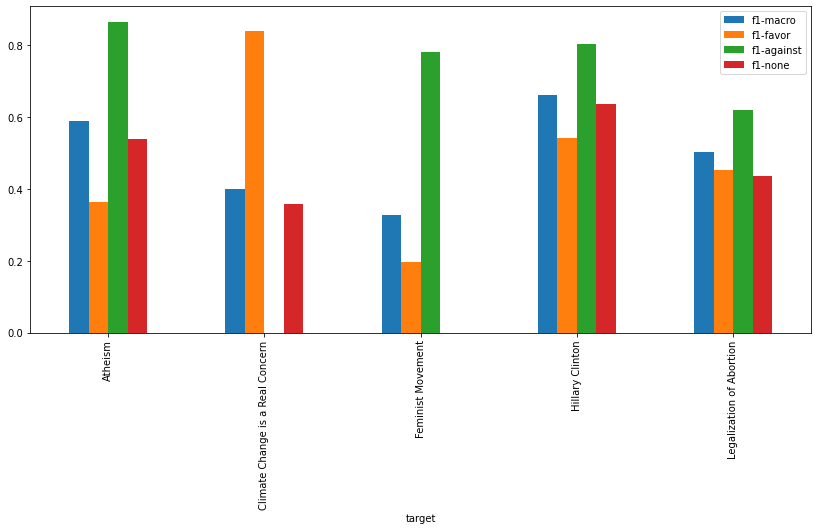

In [25]:
pd_results.plot.bar(x='target', y=["f1-macro", "f1-favor", "f1-against", "f1-none"], figsize=(14,6))